In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from math import *
import matplotlib.patches as patches
from importlib import reload


import cooler
#%matplotlib inline
%matplotlib widget


from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


import cv2


import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import brbq
reload(brbq)

<module 'brbq' from '/Users/mryodo/Documents/tads.mg/release/brbq.py'>

In [30]:
brbq.BarbekuFinderWhole(loopfile='0.2000.cool',
                        layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx',
                        left=15173,
                        right=16974,
                        chrom=6,
                        resultname='tmp')
filtered=brbq.BarbekuFiltrationFromFound(loopfile='0.2000.cool',
                        layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx',
                        left=15173,
                        right=16974,
                        chrom=6,
                        foundname='brbq-tmp.chr6')
cross=brbq.crossFinder(loopfile='0.2000.cool',
                        layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx',
                        left=15173,
                        right=16974,
                        chrom=6)
chk=brbq.BarbekuMarkup(loopfile='0.2000.cool',
                        layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx',
                        left=15173,
                        right=16974,
                        chrom=6,
                        cross=cross,
                        filtered=filtered)
fdrs=brbq.BarbekuFDR(filtered=filtered)

brbq.BarbekuDfParser(filtered=filtered,
                    chk=chk,
                    fdrs=fdrs,
                    file='tmp',
                    isLayout=True)
brbq.BarbekuJucierParser(chrom=6,
                        filtered=filtered,
                        file='tmp',
                        res=2000)

        NOT FOUND:    24.0 14.0
        NOT FOUND:    72.0 65.0
        NOT FOUND:    155.0 148.0
        NOT FOUND:    162.0 155.0
        NOT FOUND:    215.0 209.0
        NOT FOUND:    221.0 215.0
        NOT FOUND:    245.0 239.0
        NOT FOUND:    287.0 282.0
        NOT FOUND:    330.0 322.0
        NOT FOUND:    351.0 346.0
        NOT FOUND:    357.0 351.0
        NOT FOUND:    362.0 357.0
        NOT FOUND:    473.0 467.0
        NOT FOUND:    660.0 648.0
        NOT FOUND:    1088.0 1083.0
        NOT FOUND:    1333.0 1327.0
        NOT FOUND:    1614.0 1610.0
17 / 93 / 179
Sensitivity:  0.8172043010752688
FDR:  0.5754189944134078


FigureCanvasNbAgg()

/Users/mryodo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mryodo/Documents/tads.mg/release/brbq.py:383: RuntimeWarning: divide by zero encountered in double_scalars
  fdr_diag=[1-np.sum(pdf_fitted[abs(tmpx-i)<=0.5])*(tmpx[1]-tmpx[0])/h[0][i] for i in range(30)]


In [12]:
def fileParser(
    loopfile, 
    layoutfile, 
    lborder, 
    rborder,
    chrom):

    c = cooler.Cooler(loopfile)
    
    known=pd.read_excel(layoutfile)
    known_chr1=known[known['Chr']==chrom]
    
    known_chr1_seg=known_chr1[known_chr1['Genomic bin, Left base']>=0]
    known_chr1_seg=known_chr1_seg[known_chr1_seg['Genomic bin, Left base']<=rborder-lborder]
    known_chr1_seg=known_chr1_seg[known_chr1_seg['Genomic bin, Right base']>=0]
    known_chr1_seg=known_chr1_seg[known_chr1_seg['Genomic bin, Right base']<=rborder-lborder]
    
    #known_chr1_seg['Genomic bin, Right base']=known_chr1_seg['Genomic bin, Right base']-lborder
    #known_chr1_seg['Genomic bin, Left base']=known_chr1_seg['Genomic bin, Left base']-lborder
    
    image=c.matrix(balance=True, sparse=False)[lborder:rborder, lborder:rborder]
    
    return image, known_chr1_seg

# TODO: optional layout, default borders

In [25]:
loopfile='0.2000.cool'
layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx'

left=15173
right=16974
chrom=6
image, known_chr1_seg=fileParser(loopfile, layoutfile, left, right, chrom=chrom)

found=np.loadtxt('brbq2-0.1_4_15.chr6', delimiter=',')

In [26]:
known_chr1_seg

Chr   ID  Genomic bin, Left base  Genomic bin, Right base  Size (Kb)  \
148  6.0  149                     6.0                     15.0         20   
149  6.0  150                    15.0                     25.0         22   
150  6.0  151                    25.0                     35.0         22   
151  6.0  152                    35.0                     46.0         24   
152  6.0  153                    46.0                     51.0         12   
153  6.0  154                    52.0                     60.0         18   
154  6.0  155                    66.0                     73.0         16   
155  6.0  156                    73.0                     79.0         14   
156  6.0  157                    85.0                     96.0         24   
157  6.0  158                    97.0                    106.0         20   
158  6.0  159                   108.0                    124.0         34   
159  6.0  160                   128.0                    137.0         20   
160  6.0  161                   139.0                    149.0         22   
161  6.0  162                   149.0                    156.0         16   
162  6.0  163                   156.0                    163.0         16   
163  6.0  164                   163.0                    172.0         20   
164  6.0  165                   203.0                    210.0         16   
165  6.0  166                   210.0                    216.0         14   
166  6.0  167                   216.0                    222.0         14   
167  6.0  168                   223.0                    233.0         22   
168  6.0  169                   240.0                    246.0         14   
169  6.0  170                   246.0                    255.0         20   
170  6.0  171                   255.0                    262.0         16   
171  6.0  172                   262.0                    271.0         20   
172  6.0  173                   277.0                    282.0         12   
173  6.0  174                   283.0                    288.0         12   
174  6.0  175                   313.0                    322.0         20   
175  6.0  176                   323.0                    331.0         18   
176  6.0  177                   347.0                    352.0         12   
177  6.0  178                   352.0                    358.0         14   
..   ...  ...                     ...                      ...        ...   
211  6.0  212                   965.0                    974.0         20   
212  6.0  213                  1075.0                   1083.0         18   
213  6.0  214                  1084.0                   1089.0         12   
214  6.0  215                  1089.0                   1101.0         26   
215  6.0  216                  1112.0                   1119.0         16   
216  6.0  217                  1120.0                   1130.0         22   
217  6.0  218                  1135.0                   1144.0         20   
218  6.0  219                  1157.0                   1167.0         22   
219  6.0  220                  1173.0                   1185.0         26   
220  6.0  221                  1190.0                   1199.0         20   
221  6.0  222                  1208.0                   1225.0         36   
222  6.0  223                  1226.0                   1239.0         28   
223  6.0  224                  1245.0                   1253.0         18   
224  6.0  225                  1274.0                   1291.0         36   
225  6.0  226                  1301.0                   1312.0         24   
226  6.0  227                  1328.0                   1334.0         14   
227  6.0  228                  1335.0                   1345.0         22   
228  6.0  229                  1350.0                   1358.0         18   
229  6.0  230                  1504.0                   1514.0         22   
230  6.0  231                  1514.0                   1523.0         20   
2

In [14]:
fl=np.ones(found.shape[0])
sum=0
for i in range(found.shape[0]):
    if fl[i]==0:
        continue
    intersect=[]
    intersect.append(i)
    for j in range(i+1, found.shape[0], 1):
        for tmp in intersect: 
            if brbq.IntersectTough(found[tmp, 0], found[tmp, 1], found[tmp, 2], found[j, 0], found[j, 1], found[j, 2]) and (fl[j]==1):
                intersect.append(j)
                break
    sum+=len(intersect)-1
    print(sum, end=' ')
    if len(intersect)==1:
        continue
    maxes=[]
    for tmp in intersect:
        maxes.append(found[tmp, 6])
    max_pos=np.argmax(np.array(maxes))
    for j in range(len(intersect)):
        if j!=max_pos:
            fl[intersect[j]]=0
            
print(np.sum(fl))

3 3 19 40 41 41 41 41 41 41 42 42 42 43 43 44 44 44 63 63 83 83 83 83 104 104 104 123 125 125 126 126 126 126 126 126 133 133 133 154 171 171 171 190 191 191 192 192 192 193 193 209 219 220 220 220 221 222 222 222 222 243 260 260 260 260 260 261 261 261 261 282 284 284 293 297 297 320 321 321 332 338 355 355 378 401 406 407 407 408 408 408 408 424 444 444 444 444 445 445 447 448 448 464 484 503 522 522 523 523 523 524 542 542 542 542 543 543 543 543 561 561 561 562 562 562 581 581 581 603 603 634 634 634 634 651 673 691 691 691 691 728 728 729 729 729 732 732 732 735 735 736 736 753 753 753 756 756 756 757 759 759 759 759 759 760 760 783 784 784 785 785 805 841 841 849 849 849 850 850 850 850 853 853 853 853 854 854 856 856 857 857 858 858 858 869 878 878 878 901 901 901 913 913 914 914 914 914 914 914 914 916 916 917 918 918 918 941 941 958 959 959 959 960 960 960 979 998 998 998 998 999 999 1000 1000 1000 1000 1001 1001 1020 1043 1063 1069 1069 1070 1070 1070 1070 1070 1071 1071 1071

In [15]:
filtered=found[fl.astype(bool),:]

st=0
for i in range(known_chr1_seg.shape[0]):
    knr=known_chr1_seg['Genomic bin, Right base'].values
    knl=known_chr1_seg['Genomic bin, Left base'].values
    if brbq.IsDetected(knr[i]-1, knl[i]-1, filtered):
        continue
    else:
        st+=1
        #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
        #r1=l1+30
        print('        NOT FOUND:   ', knr[i]-1, knl[i]-1)
        #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)

print(st, '/', known_chr1_seg.shape[0], '/', filtered.shape[0])
print('Sensitivity: ', 1-st/known_chr1_seg.shape[0])
print('FDR: ', (filtered.shape[0]+st-known_chr1_seg.shape[0])/filtered.shape[0])

        NOT FOUND:    24.0 14.0
        NOT FOUND:    72.0 65.0
        NOT FOUND:    155.0 148.0
        NOT FOUND:    162.0 155.0
        NOT FOUND:    215.0 209.0
        NOT FOUND:    221.0 215.0
        NOT FOUND:    245.0 239.0
        NOT FOUND:    287.0 282.0
        NOT FOUND:    330.0 322.0
        NOT FOUND:    351.0 346.0
        NOT FOUND:    357.0 351.0
        NOT FOUND:    362.0 357.0
        NOT FOUND:    473.0 467.0
        NOT FOUND:    660.0 648.0
        NOT FOUND:    1088.0 1083.0
        NOT FOUND:    1333.0 1327.0
        NOT FOUND:    1614.0 1610.0
17 / 93 / 179
Sensitivity:  0.8172043010752688
FDR:  0.5754189944134078


In [16]:
chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    knr=known_chr1_seg['Genomic bin, Right base'].values
    knl=known_chr1_seg['Genomic bin, Left base'].values
    xtest=knr[i]-1
    ytest=knl[i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
unmapped=filtered[chk==-1, :]
mapped=filtered[chk!=-1,:]

#left=0
#right=2461
image, known_chr1_seg=fileParser(loopfile, layoutfile, left, right, chrom=chrom)

cross=[]
for i in range(image.shape[0]-2):
    if (image[i, i+2]==0):
        cross.append(i)

plt.figure(figsize=(16,3.5))

#plt.plot(cross, [1]*len(cross), 'bo')
for i in range(len(cross)):
    plt.axvspan(cross[i]-10, cross[i]+10, alpha=0.1, color='red')
plt.plot(unmapped[:, 0], [1]*unmapped.shape[0], 'b^', label='Newly found')
plt.plot(mapped[:, 0], [1.02]*mapped.shape[0], 'gv', label='Matched with manual layout')
plt.plot(known_chr1_seg['Genomic bin, Right base']-1, [1.01]*known_chr1_seg.shape[0], 'k*', label='Manual layout')
plt.ylim((0.98, 1.055))
plt.yticks([],[])
plt.legend()
#plt.show()

FigureCanvasNbAgg()

In [269]:
ran=15 #uncertinty range


chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    knr=known_chr1_seg['Genomic bin, Right base'].values
    knl=known_chr1_seg['Genomic bin, Left base'].values
    xtest=knr[i]-1
    ytest=knl[i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
unmapped=filtered[chk==-1, :]
mapped=filtered[chk!=-1,:]

for i in range(filtered.shape[0]):
    if chk[i]==-1:
        for j in range(len(cross)):
            if abs(filtered[i, 0]-cross[j])<=ran:
                chk[i]=-2
                
filtered_crossed=filtered[chk!=-2, :]

st=0
for i in range(known_chr1_seg.shape[0]):
    knr=known_chr1_seg['Genomic bin, Right base'].values
    knl=known_chr1_seg['Genomic bin, Left base'].values
    if brbq.IsDetected(knr[i]-1, knl[i]-1, filtered_crossed):
        continue
    else:
        st+=1
        #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
        #r1=l1+30
        print('        NOT FOUND:   ', knr[i]-1, knl[i]-1)
        #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)

print(st, '/', known_chr1_seg.shape[0], '/', filtered_crossed.shape[0])
print('Sensitivity: ', 1-st/known_chr1_seg.shape[0])
print('FDR: ', (filtered_crossed.shape[0]+st-known_chr1_seg.shape[0])/filtered_crossed.shape[0])

        NOT FOUND:    24.0 14.0
        NOT FOUND:    72.0 65.0
        NOT FOUND:    155.0 148.0
        NOT FOUND:    162.0 155.0
        NOT FOUND:    215.0 209.0
        NOT FOUND:    221.0 215.0
        NOT FOUND:    245.0 239.0
        NOT FOUND:    287.0 282.0
        NOT FOUND:    330.0 322.0
        NOT FOUND:    351.0 346.0
        NOT FOUND:    357.0 351.0
        NOT FOUND:    362.0 357.0
        NOT FOUND:    473.0 467.0
        NOT FOUND:    660.0 648.0
        NOT FOUND:    1088.0 1083.0
        NOT FOUND:    1333.0 1327.0
        NOT FOUND:    1614.0 1610.0
17 / 93 / 100
Sensitivity:  0.8172043010752688
FDR:  0.24


/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


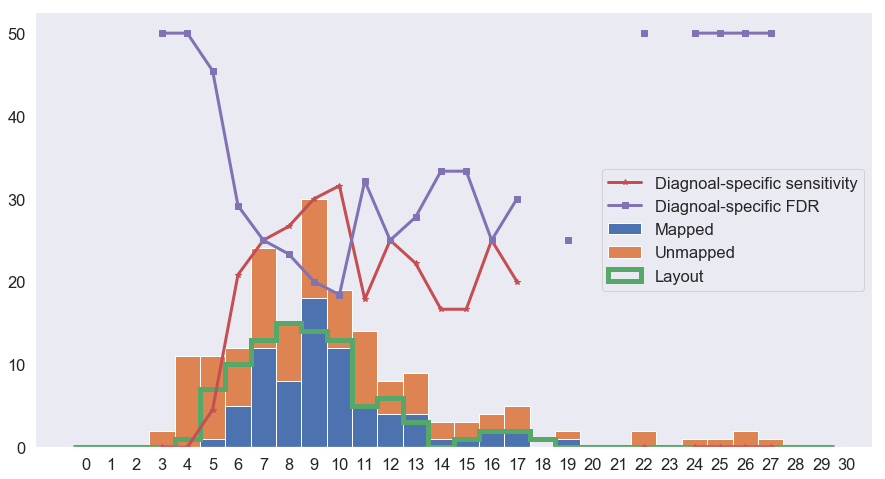

In [270]:
diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,3]-mapped[:,4])
diag_unmapped=np.abs(unmapped[:,3]-unmapped[:,4])

#with sns.color_palette("RdBu", 7):
plt.figure(figsize=(15, 8))
h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout')
plt.xticks(range(31))
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
plt.grid()
plt.legend()

/Users/mryodo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mryodo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


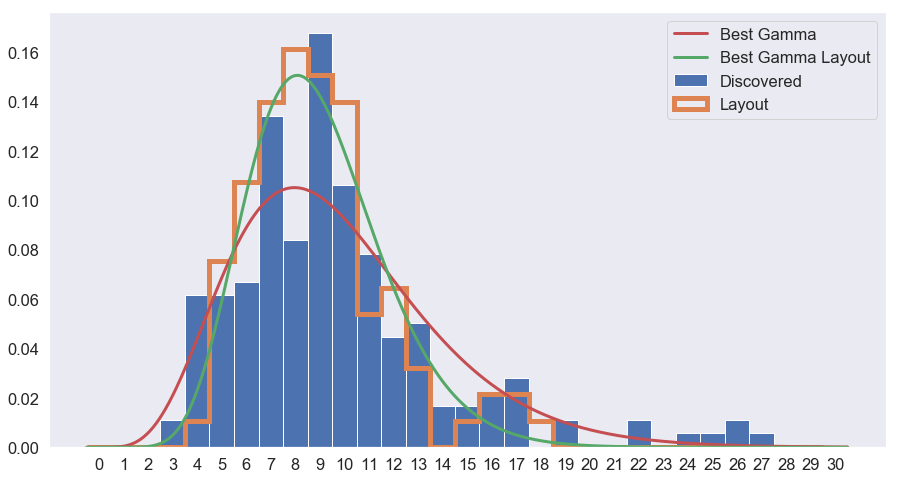

In [271]:
import scipy.stats as stats
gamma = stats.gamma

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,3]-mapped[:,4])
diag_unmapped=np.abs(unmapped[:,3]-unmapped[:,4])
diag_whole=np.concatenate([diag_mapped, diag_unmapped])

param = gamma.fit(diag_whole, floc=0)
tmpx=np.linspace(-0.5, 30.5, 1000)
pdf_fitted = gamma.pdf(tmpx, *param)

gamma2 = stats.gamma

param2 = gamma2.fit(diag_layout, floc=0)
pdf_fitted2 = gamma2.pdf(tmpx, *param2)

plt.figure(figsize=(15, 8))
h=plt.hist(diag_whole, bins=np.arange(31)-0.5, label='Discovered', normed=True)
plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout', normed=True)
plt.plot(tmpx, pdf_fitted, color='r', linewidth=3, label='Best Gamma')
plt.plot(tmpx, pdf_fitted2, color='g', linewidth=3, label='Best Gamma Layout')
plt.xticks(range(31))
plt.grid()
plt.legend()

In [272]:
fdr_diag=[1-np.sum(pdf_fitted[abs(tmpx-i)<=0.5])*(tmpx[1]-tmpx[0])/h[0][i] for i in range(30)]

/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [273]:
fdr_diag

[-inf,
 -inf,
 -inf,
 -0.8776239979286811,
 0.2665815750272267,
 -0.10880717713579102,
 -0.31244546225870473,
 0.2526281002873718,
 -0.2800853209774359,
 0.40082576697671135,
 0.1363168631735422,
 -0.02275799497064379,
 -0.504362914014904,
 -0.11936764987950199,
 -1.5709543609274608,
 -0.9905131006223062,
 -0.13284138245958244,
 0.3063703170173895,
 -inf,
 0.11194430145794099,
 -inf,
 -inf,
 0.6785259582847465,
 -inf,
 0.7053038156215314,
 0.7992299818809062,
 0.9303836307814836,
 0.909900483829045,
 -inf,
 -inf]

In [274]:
chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    knr=known_chr1_seg['Genomic bin, Right base'].values
    knl=known_chr1_seg['Genomic bin, Left base'].values
    xtest=knr[i]-1
    ytest=knl[i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
                
for i in range(filtered.shape[0]):
    if chk[i]==-1:
        for j in range(len(cross)):
            if abs(filtered[i, 0]-cross[j])<=ran:
                chk[i]=-2

In [275]:
fdrs=np.zeros(filtered.shape[0])
for i in range(filtered.shape[0]):
    fdrs[i]=fdr_diag[int(filtered[i, 3]-filtered[i, 4])]

In [276]:
df=pd.DataFrame({
    'x (geom)': filtered[:, 0], 
    'y (geom)': filtered[:, 1], 
    'radius': filtered[:, 2], 
    'x (center)': filtered[:, 3], 
    'y (center)': filtered[:, 4], 
    'thresh (respect)': filtered[:, 5],
    'thresh (absolute)': filtered[:, 6],
    'Mapped': chk>-1,
    #'Mapped': np.nan,
    'cross15': chk==-2,
    'fdr': fdrs
})

In [277]:
df.to_csv('chr6_mapped.brbq')

In [34]:
df.head()

x (geom)  y (geom)    radius  x (center)  y (center)  thresh (respect)  \
0      10.0       2.0  1.052579         9.0         2.0          2.910136   
1      15.0       2.0  1.131371        15.0         2.0          3.465965   
2      52.0      46.0  1.131371        52.0        46.0          1.505555   
3      68.0      57.0  1.131371        68.0        57.0          1.435642   
4      88.0      80.0  1.131371        88.0        80.0          1.672833   

   thresh (absolute)  Mapped  cross15       fdr  
0         102.978039     NaN     True  0.055364  
1          65.687950     NaN     True  0.121443  
2         107.630713     NaN     True -0.227292  
3          85.106757     NaN     True -0.058311  
4         111.041626     NaN     True  0.107550

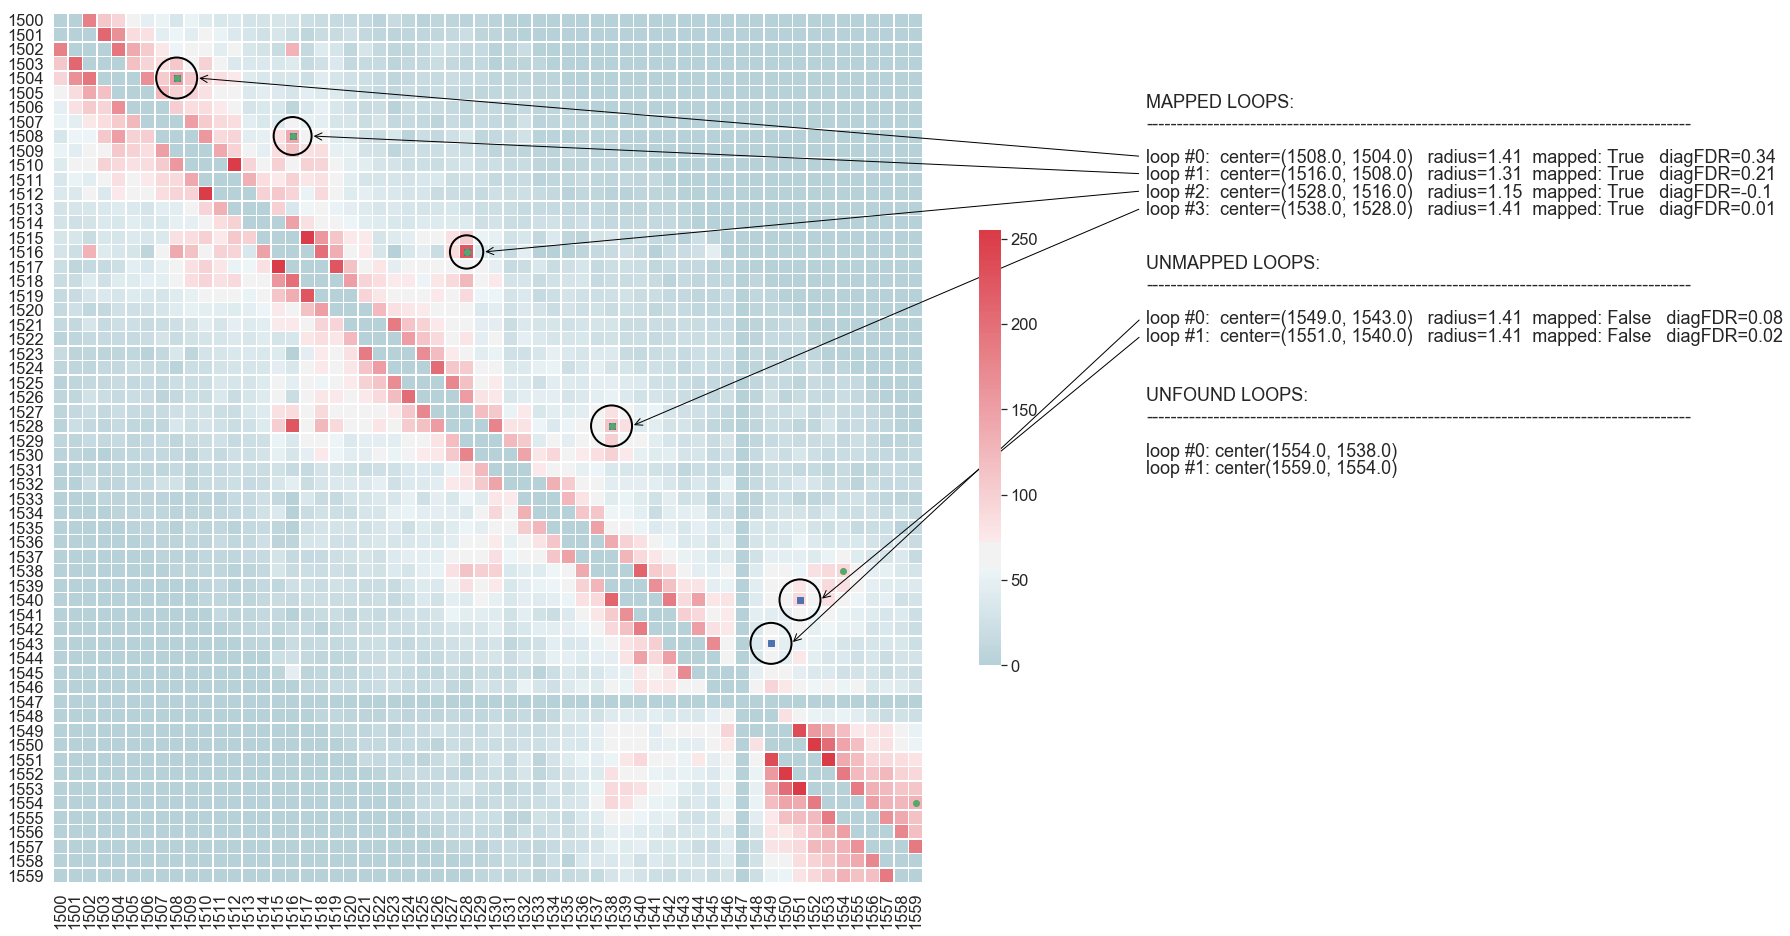

In [19]:
left=1500
right=1560
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

image=image/np.max(image)*255

fig=plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.abs(i-j)>30:
            image[i, j]=0
            
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#mask = np.zeros_like(image, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#mask=np.invert(mask)

with sns.axes_style("white"):
    sns.heatmap(image, cmap=cmap, center=65,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=range(left, right), yticklabels=range(left, right))

filtered_cut=mapped[mapped[:,0]>=left]
filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

plt.figtext(0.9, 0.75+0.03, 'MAPPED LOOPS:\n-----------------------------------------------------------------------------------------')
for step in range(filtered_cut.shape[0]):
    x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
    c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
    ax.plot(x-left+0.5, y-left+0.5, 'ko')
    ax.add_patch(c)
    ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
    plt.figtext(0.9, 0.75-0.015*step, 'loop #'+str(step)+":  center=("+str(xc)+', '+str(yc)+')   radius='
               +str(round(r,2))+'  mapped: True   diagFDR='+str(round(fdr_diag[int(xc-yc)], 2)))
    ax.annotate("", xy=(xc-left+r+0.5, yc-left+0.5), xytext=(75,9.9+1.2*step), arrowprops=dict(arrowstyle="->", color='black'))
    #ax.annotate("WHERE", xy=(10, 10), xytext=(0,0), arrowprops=dict(arrowstyle="->", color='black'))
    #print(xc, yc, thr1, thr2)

step_old=filtered_cut.shape[0]
    
filtered_cut=unmapped[unmapped[:,0]>=left]
filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

plt.figtext(0.9, 0.7-0.015*step_old, 'UNMAPPED LOOPS:\n-----------------------------------------------------------------------------------------')

for step in range(filtered_cut.shape[0]):
    x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
    c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
    ax.plot(x-left+0.5, y-left+0.5, 'ko')
    ax.add_patch(c)
    ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
    plt.figtext(0.9, 0.67-0.015*step-0.015*step_old, 'loop #'+str(step)+":  center=("+str(xc)+', '+str(yc)+')   radius='
               +str(round(r,2))+'  mapped: False   diagFDR='+str(round(fdr_diag[int(xc-yc)], 2)))
    ax.annotate("", xy=(xc-left+r+0.5, yc-left+0.5), xytext=(75,9.9+1.2*step_old+1.2*step+1.2*(0.8/0.15)), arrowprops=dict(arrowstyle="->", color='black'))
    #ax.annotate("WHERE", xy=(10, 10), xytext=(0,0), arrowprops=dict(arrowstyle="->", color='black'))
    #print(xc, yc, thr1, thr2)    
    

plt.plot((known_chr1_seg['Genomic bin, Right base']-left-0.5), (known_chr1_seg['Genomic bin, Left base']-left-0.5), 'go')

plt.figtext(0.9, 0.6-0.015*(step_old+step), 'UNFOUND LOOPS:\n-----------------------------------------------------------------------------------------')

st=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][known_chr1_seg['Genomic bin, Right base'].index[i]]-1, 
                       known_chr1_seg['Genomic bin, Left base'][known_chr1_seg['Genomic bin, Left base'].index[i]]-1, filtered):
        continue
    else:
        plt.figtext(0.9, 0.57-0.015*(step_old+step+st), 'loop #' +str(st)+": center("+
                    str(known_chr1_seg['Genomic bin, Right base'][known_chr1_seg['Genomic bin, Right base'].index[i]]-1)+', '
                    +str(known_chr1_seg['Genomic bin, Left base'][known_chr1_seg['Genomic bin, Left base'].index[i]]-1)+')')
        st+=1



left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)
plt.savefig('test.tiff', bbox_inches='tight')

In [20]:
str(known_chr1_seg['Genomic bin, Right base'][known_chr1_seg['Genomic bin, Right base'].index[i]])

'209.0'

/Users/mryodo/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


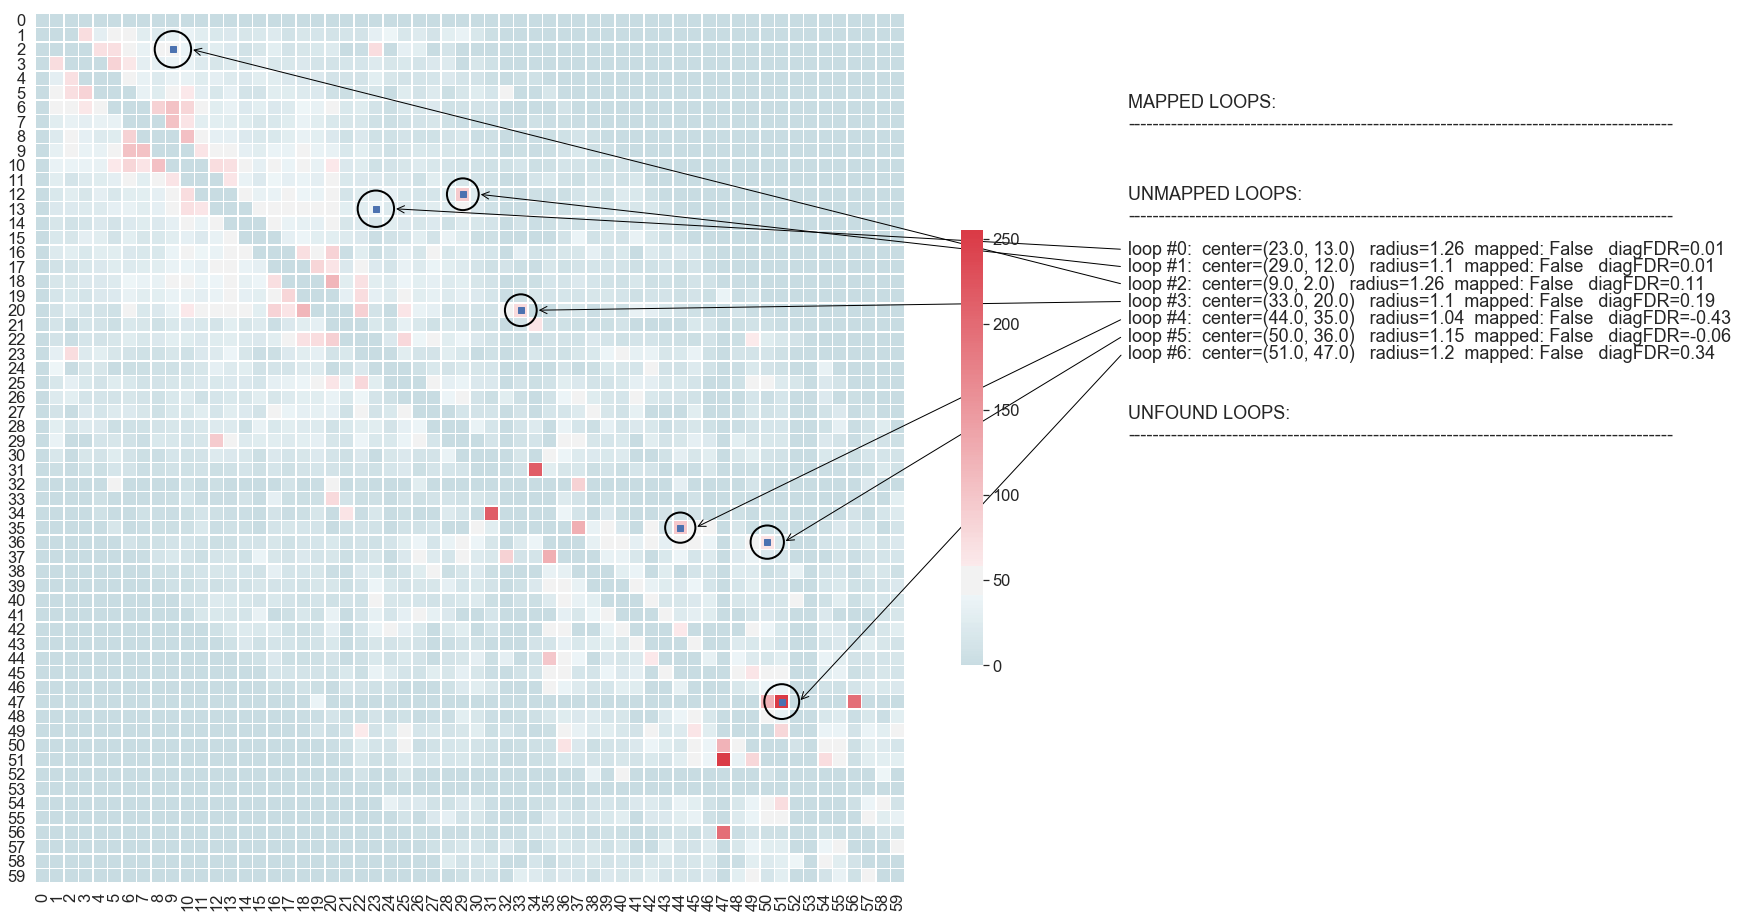

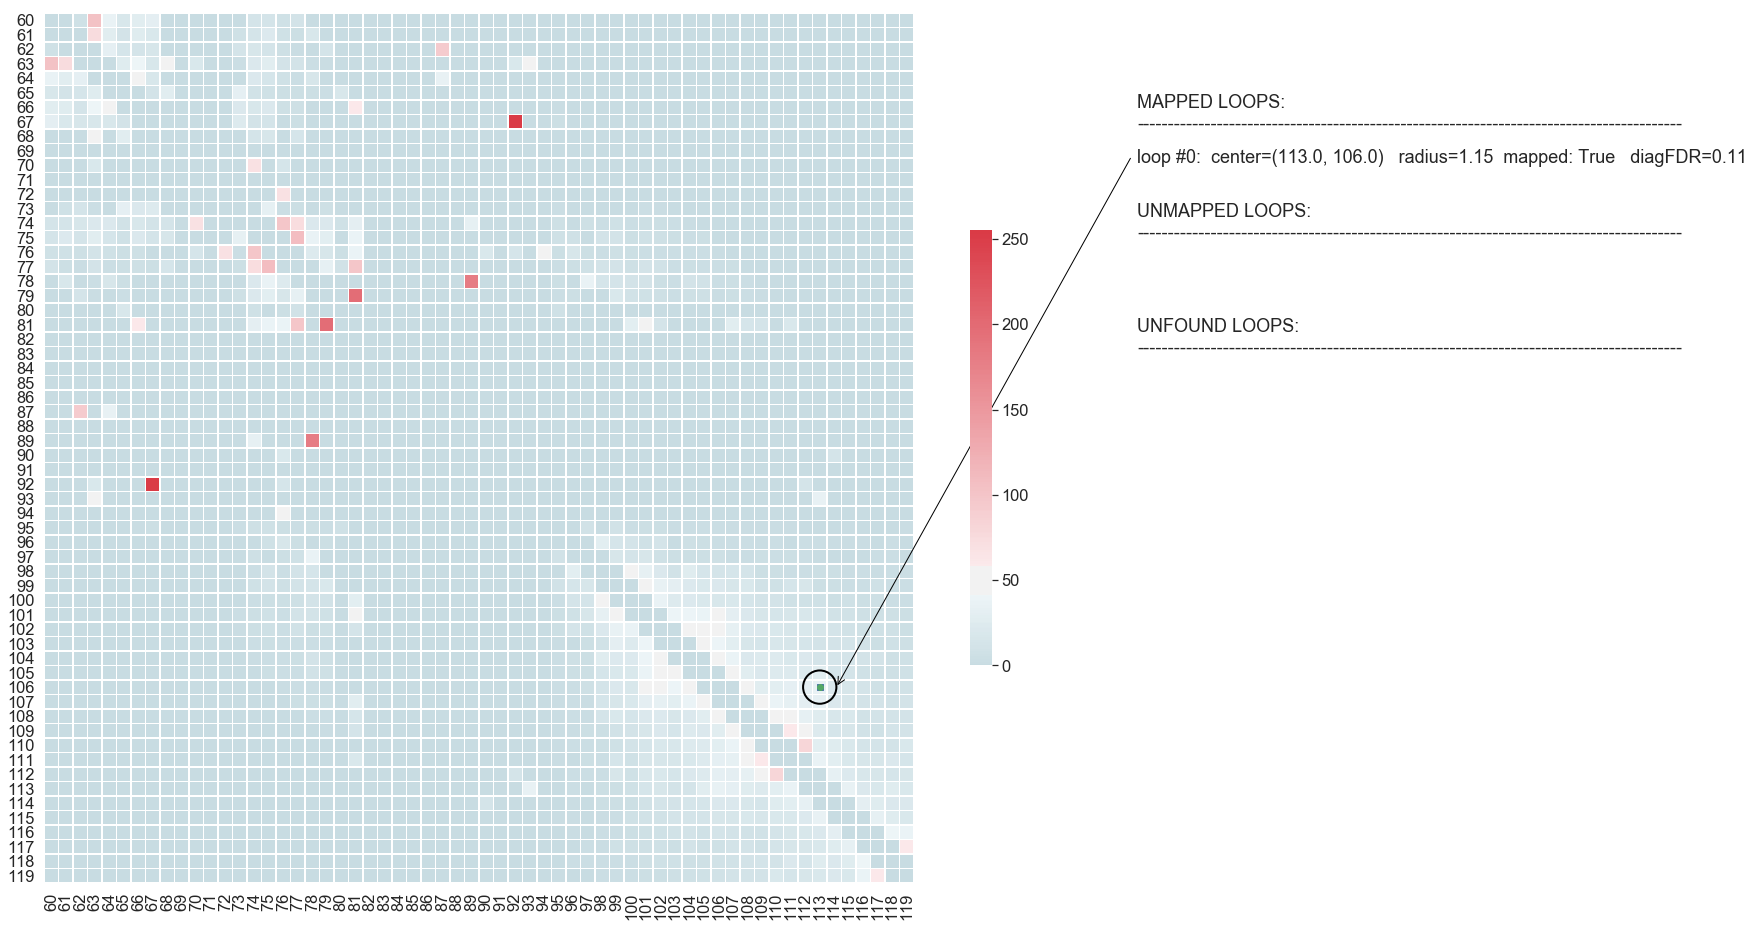

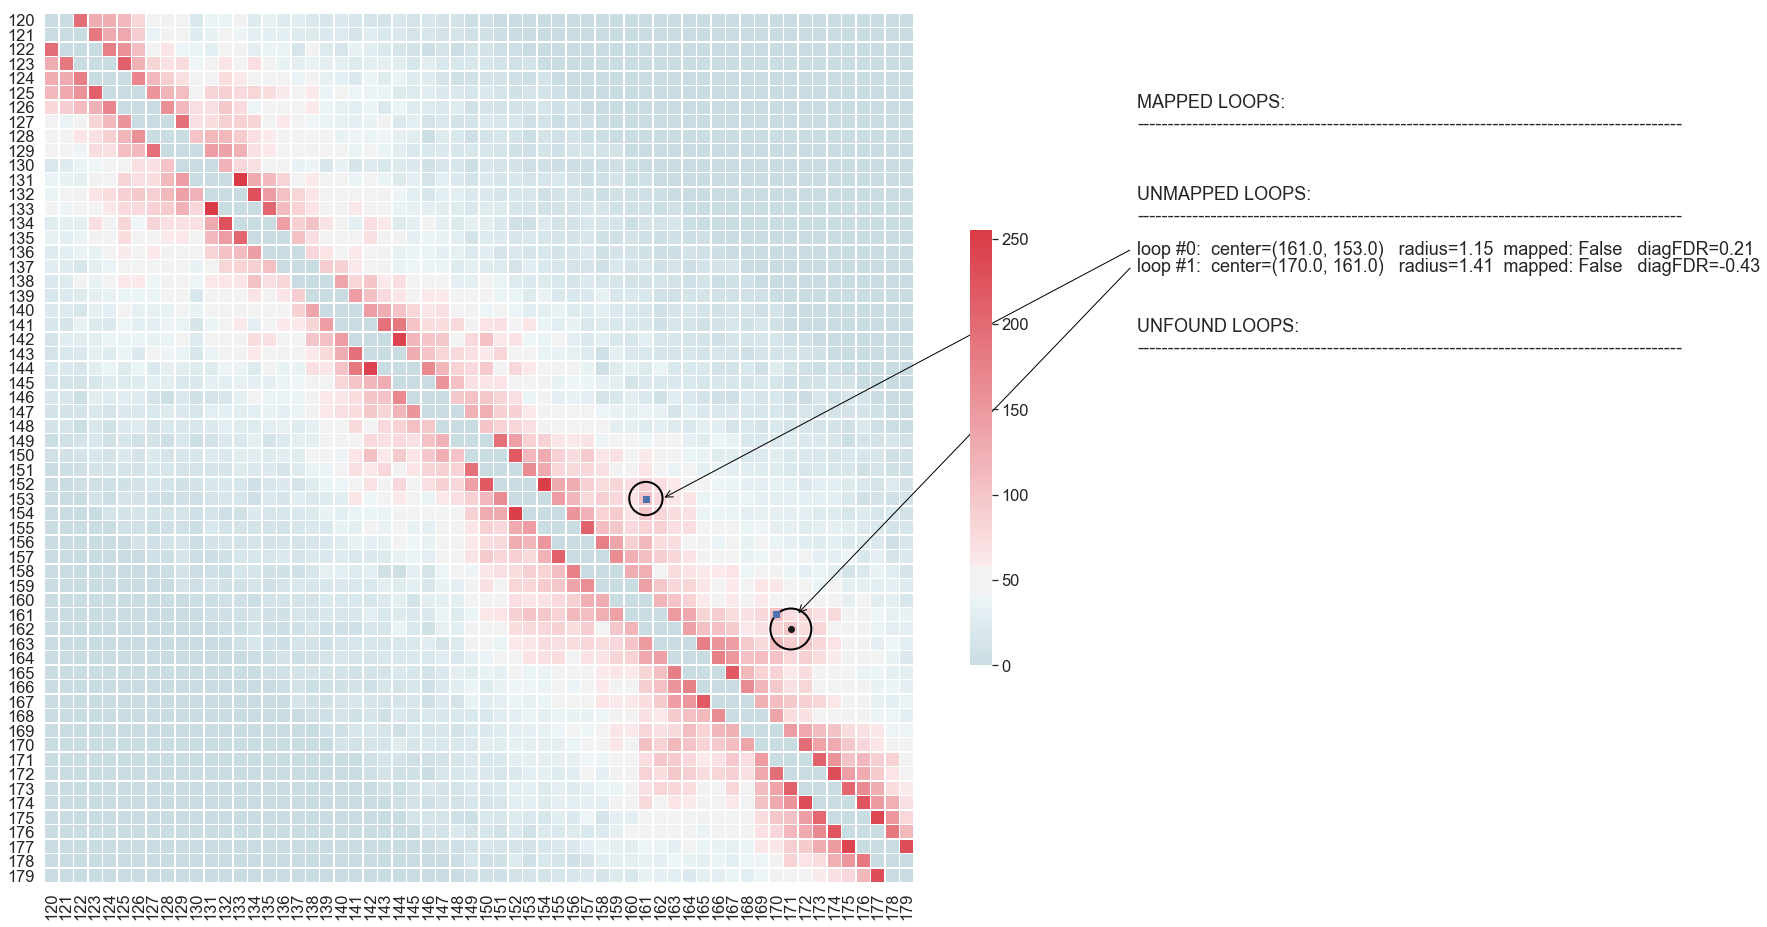

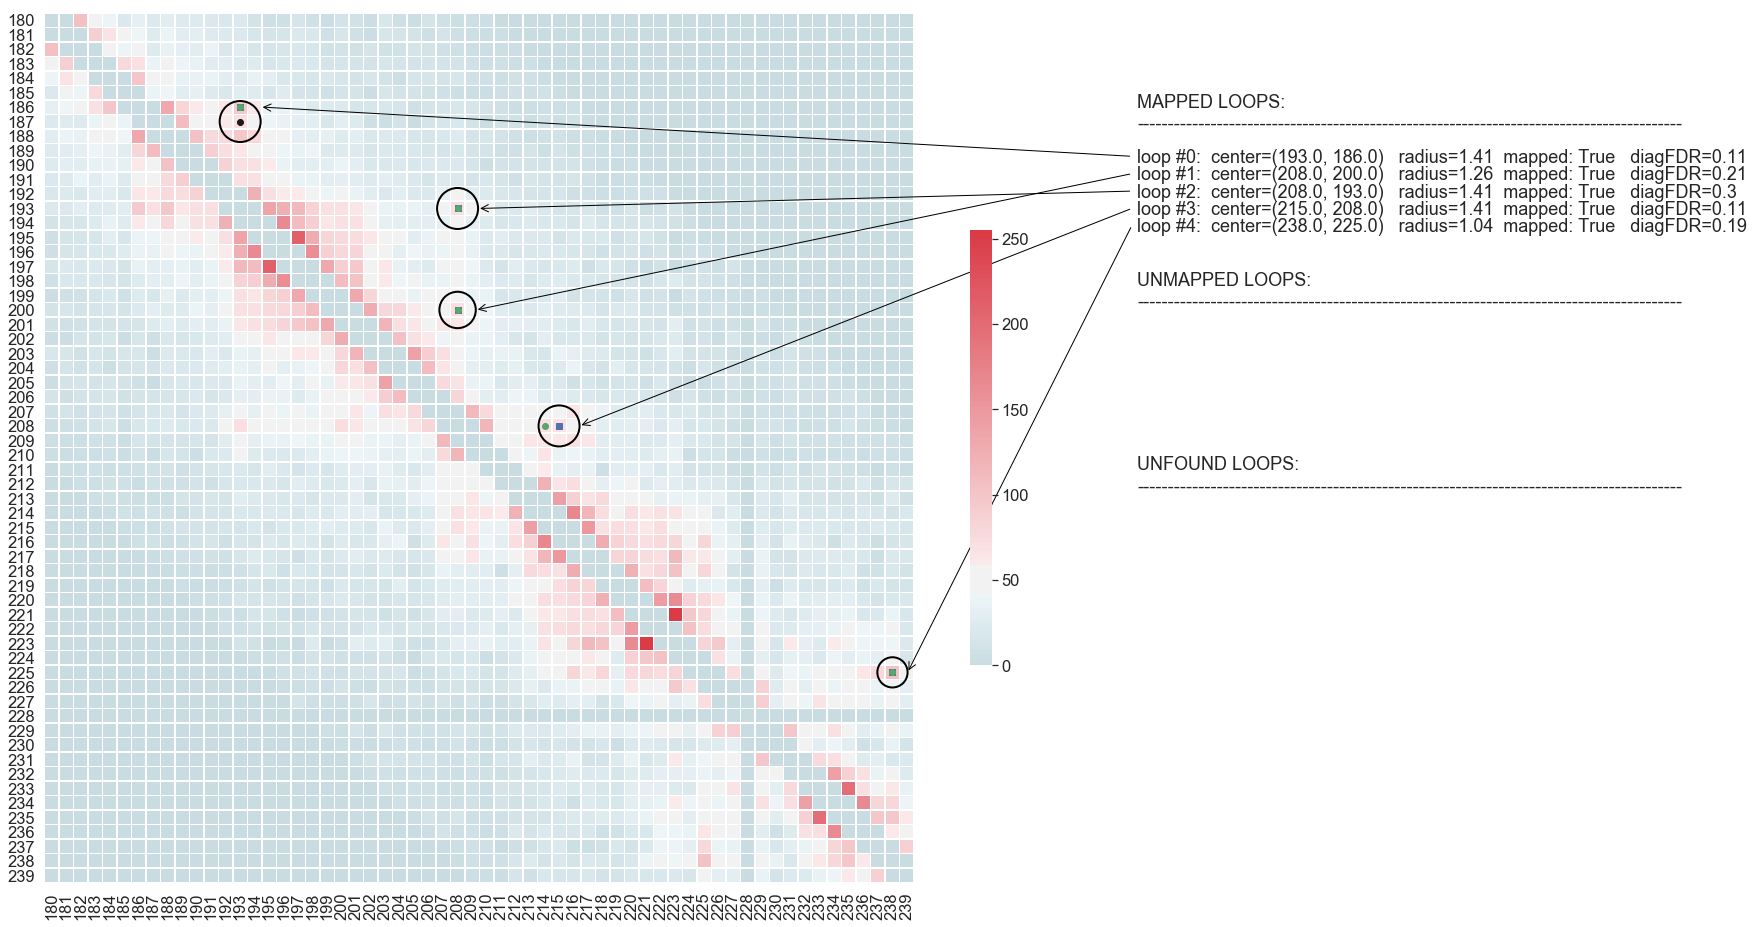

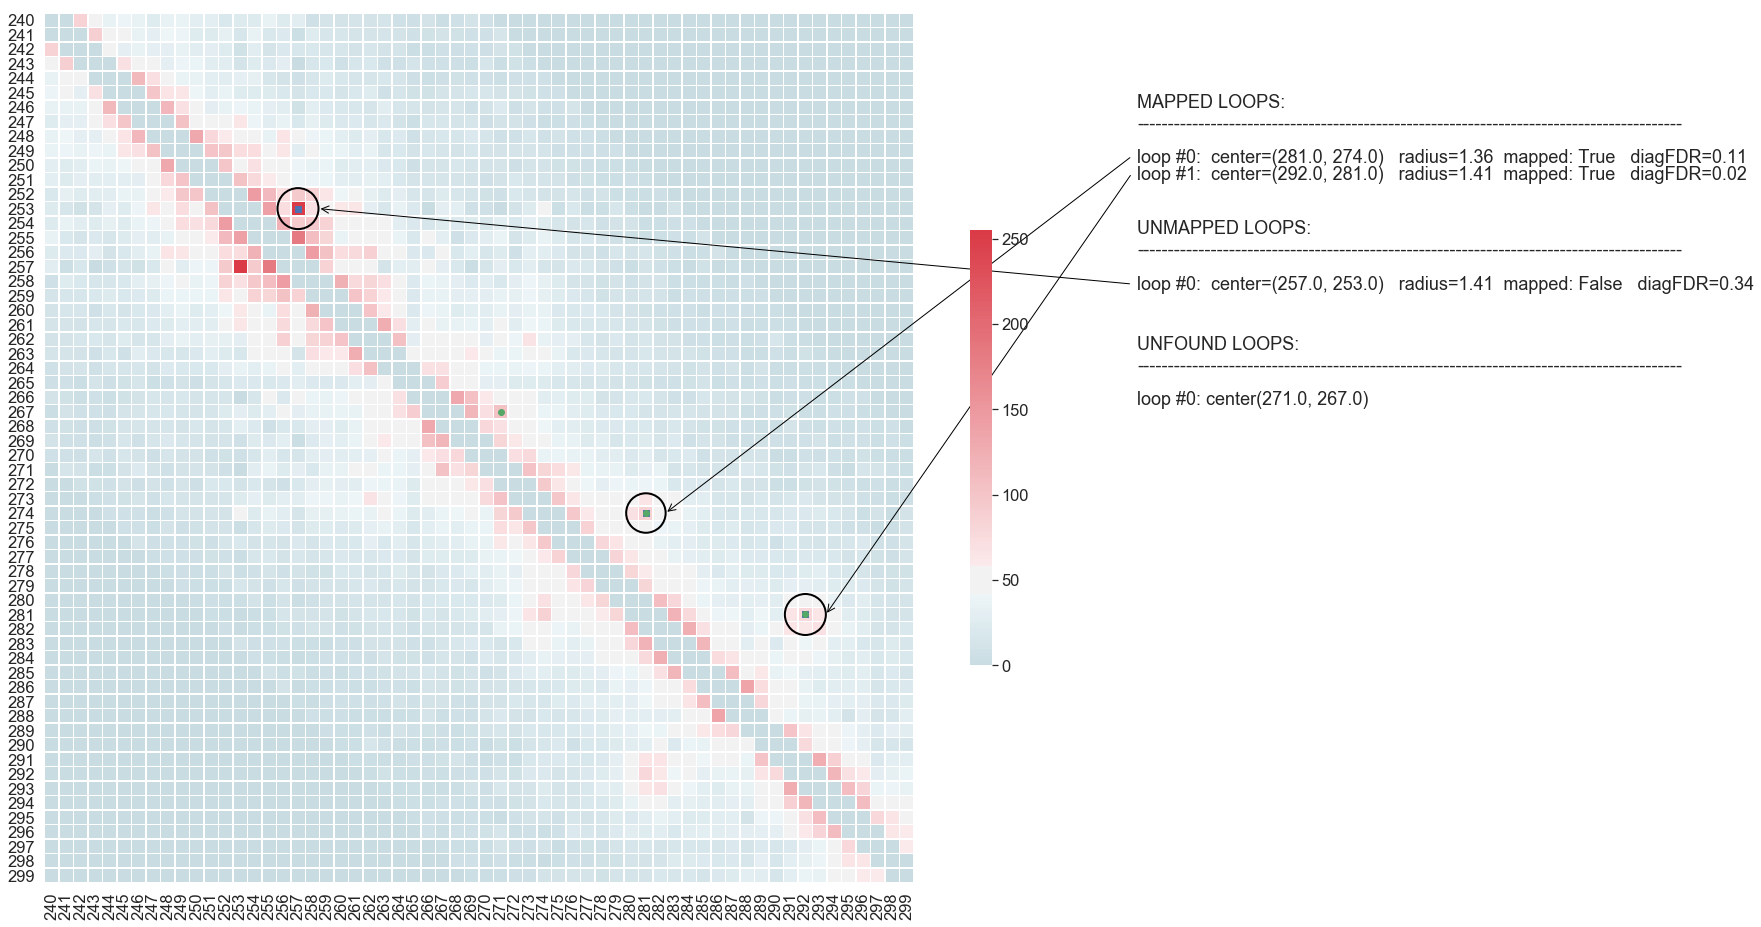

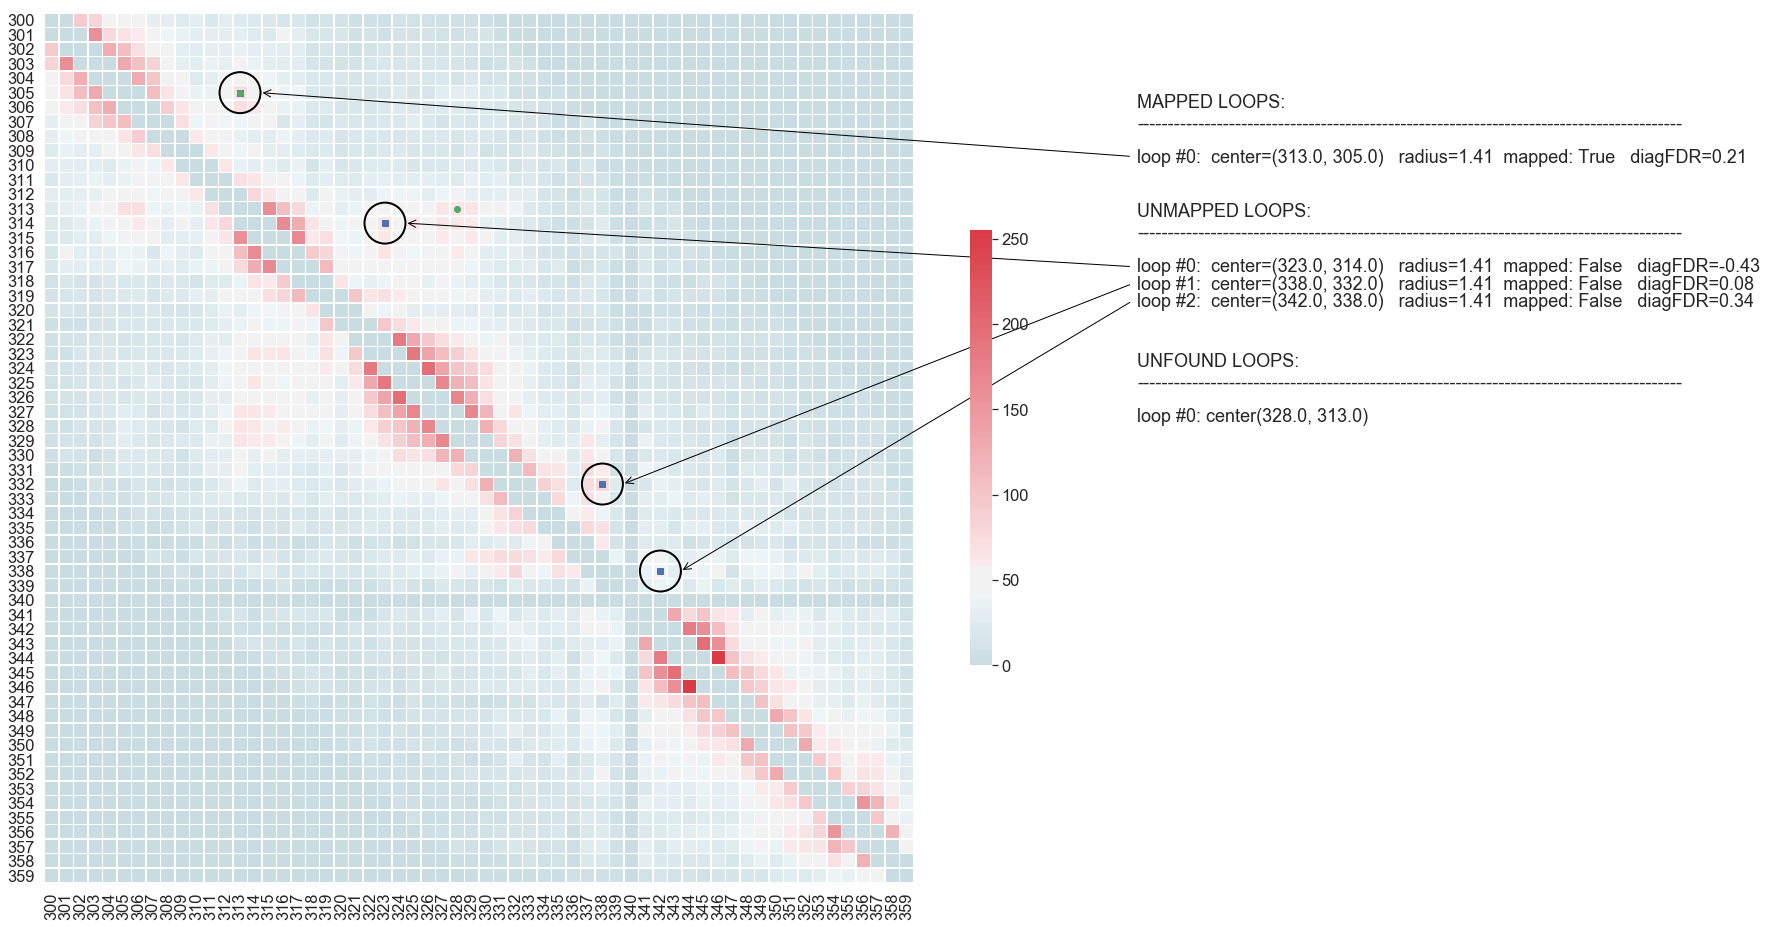

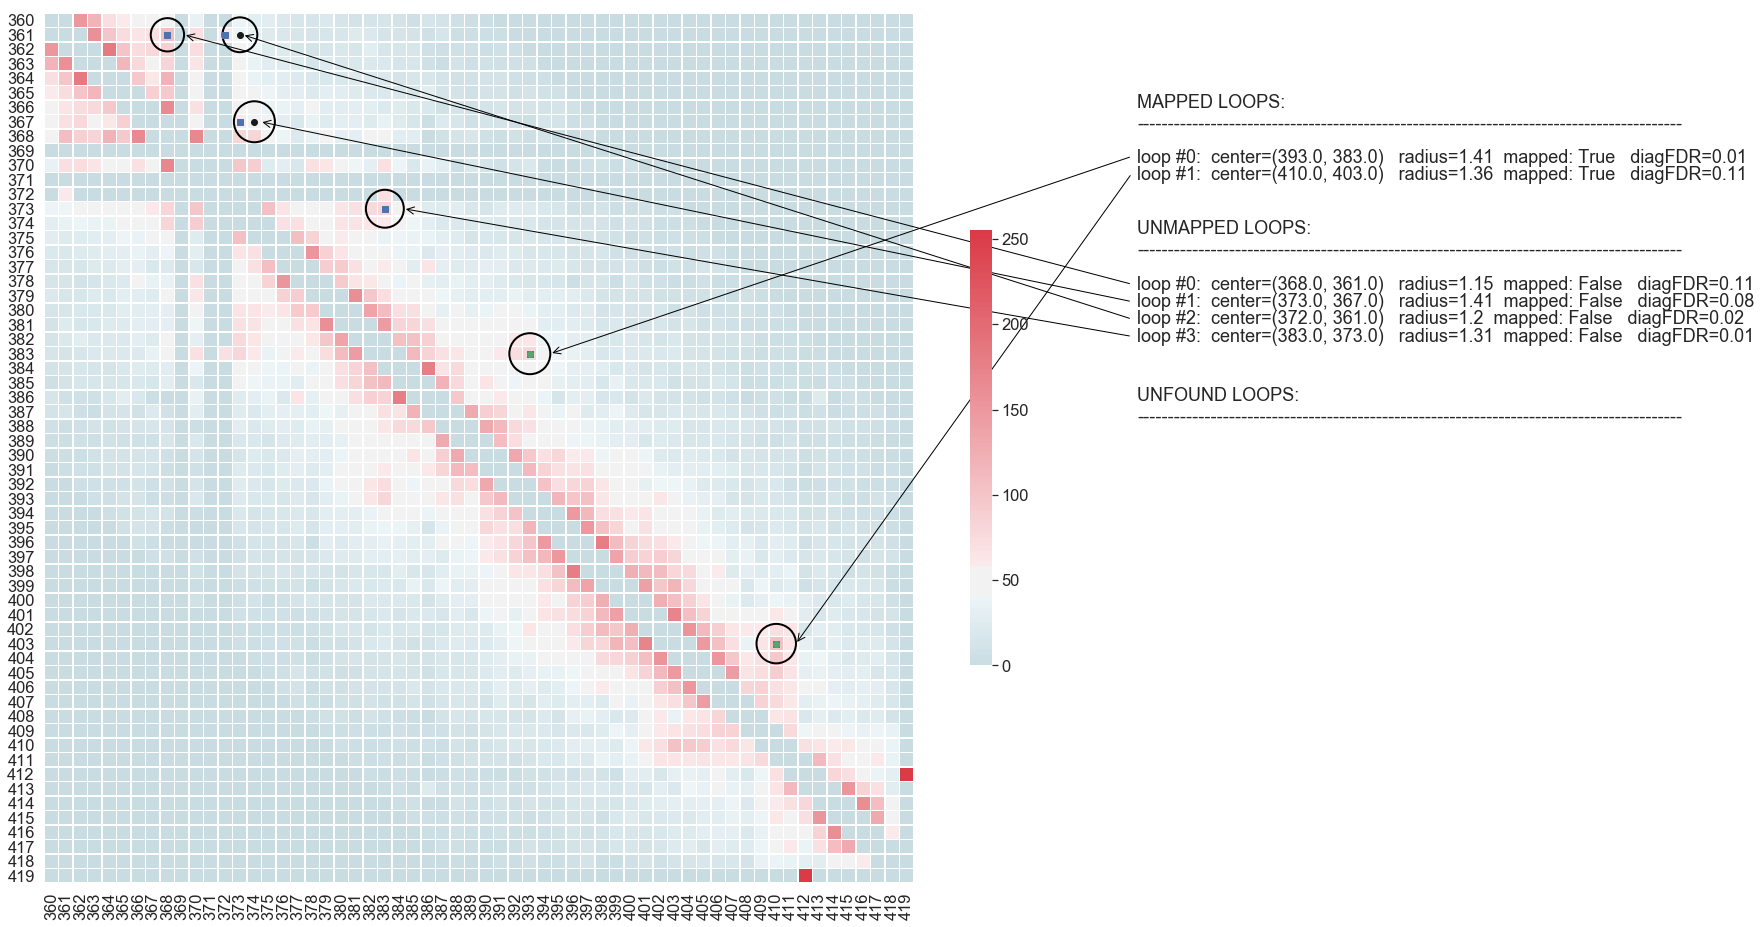

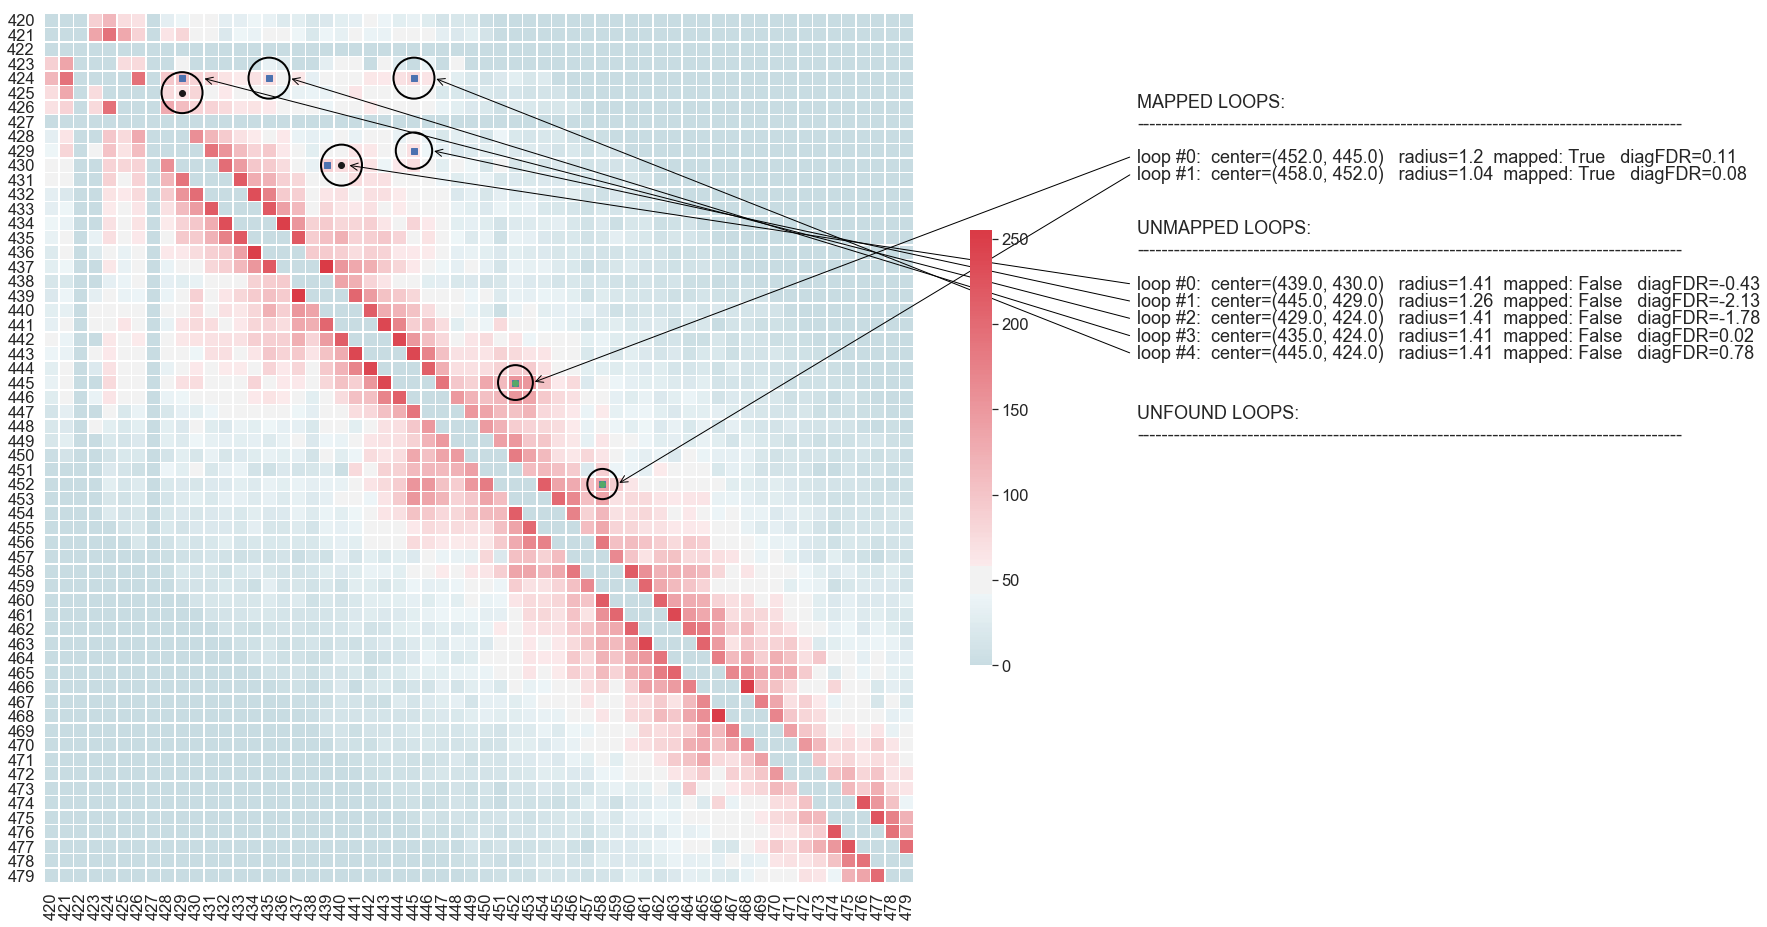

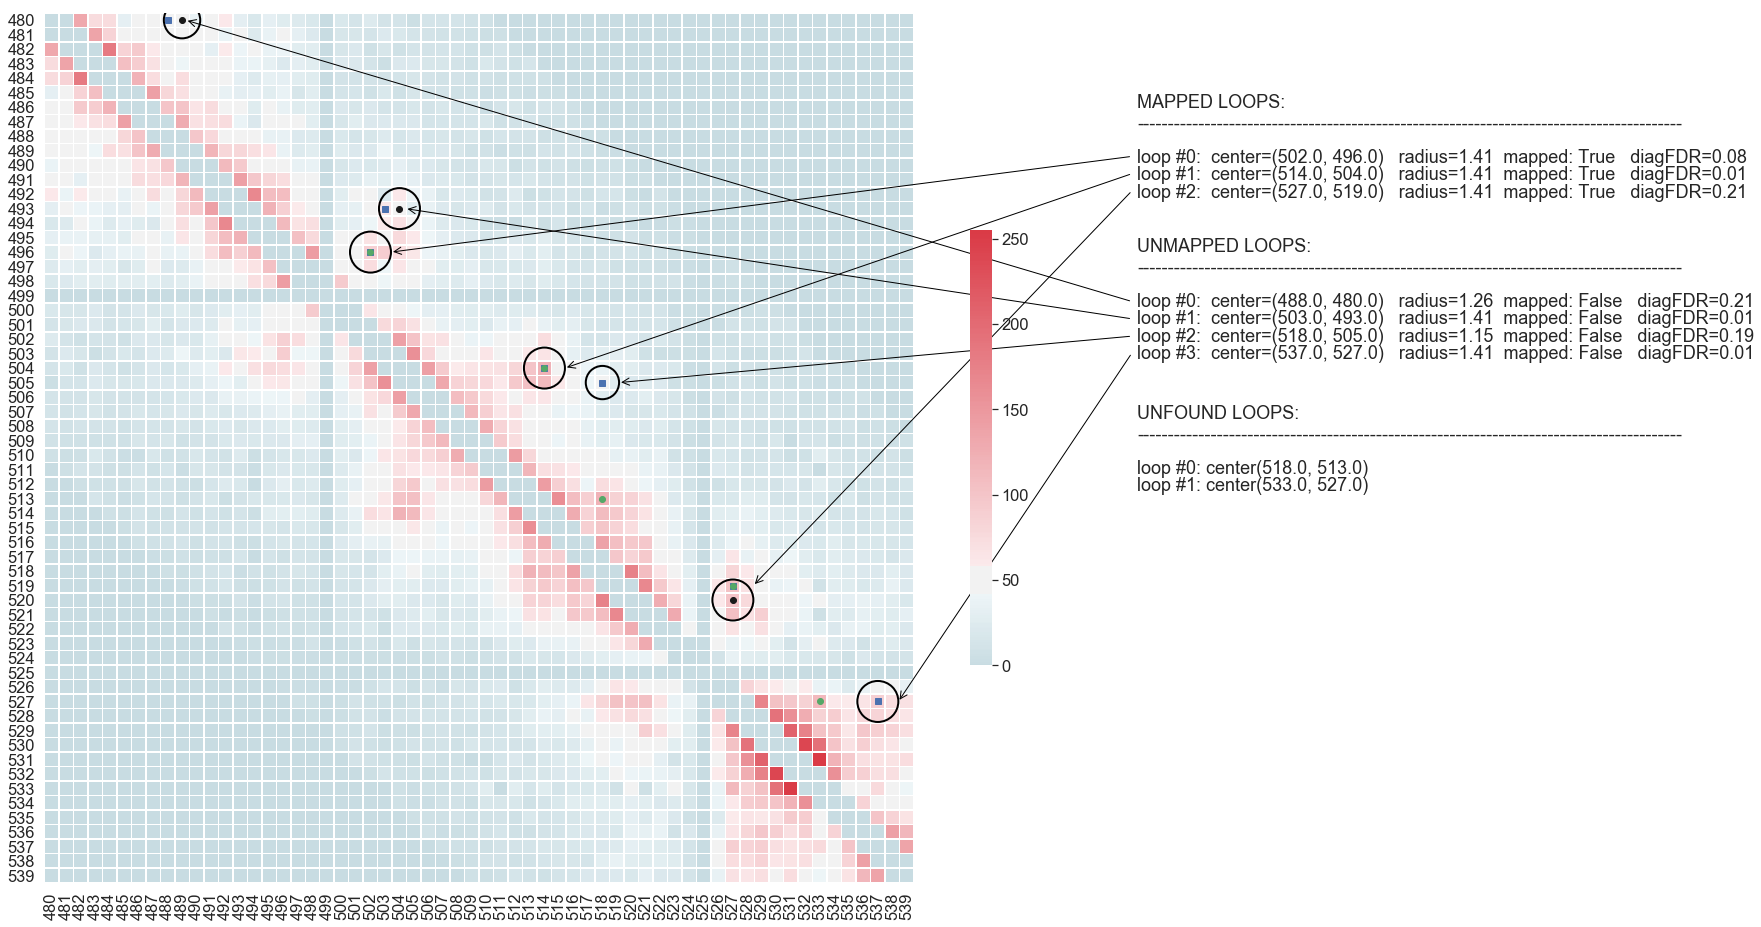

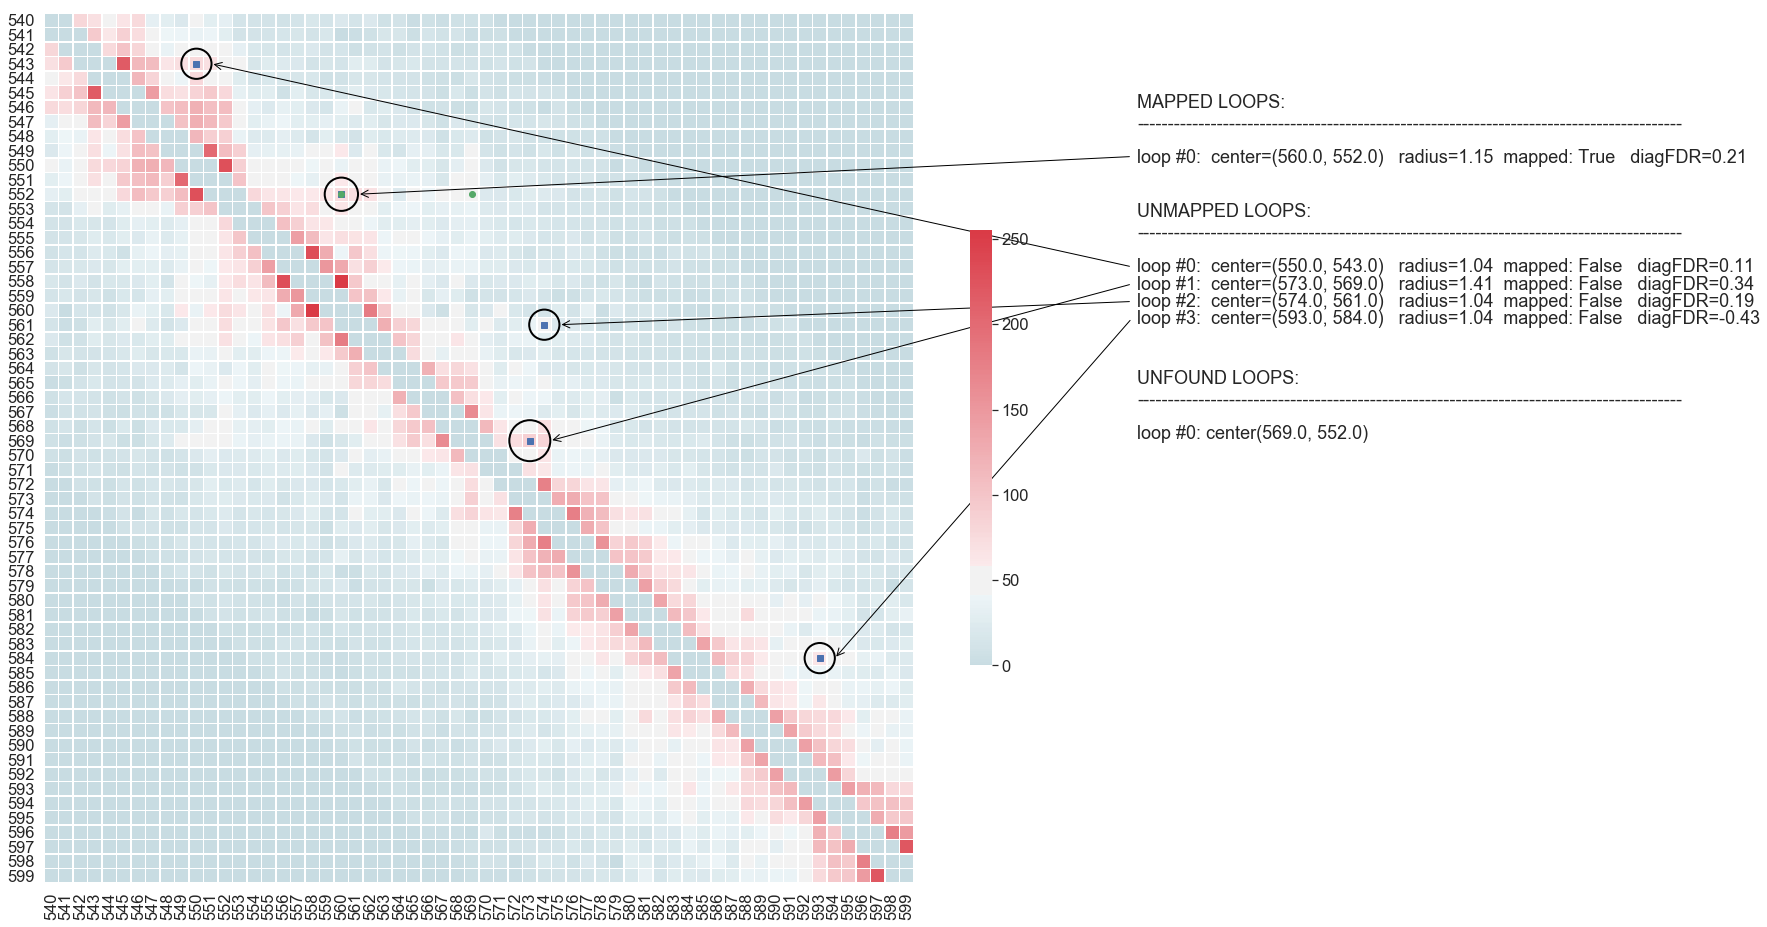

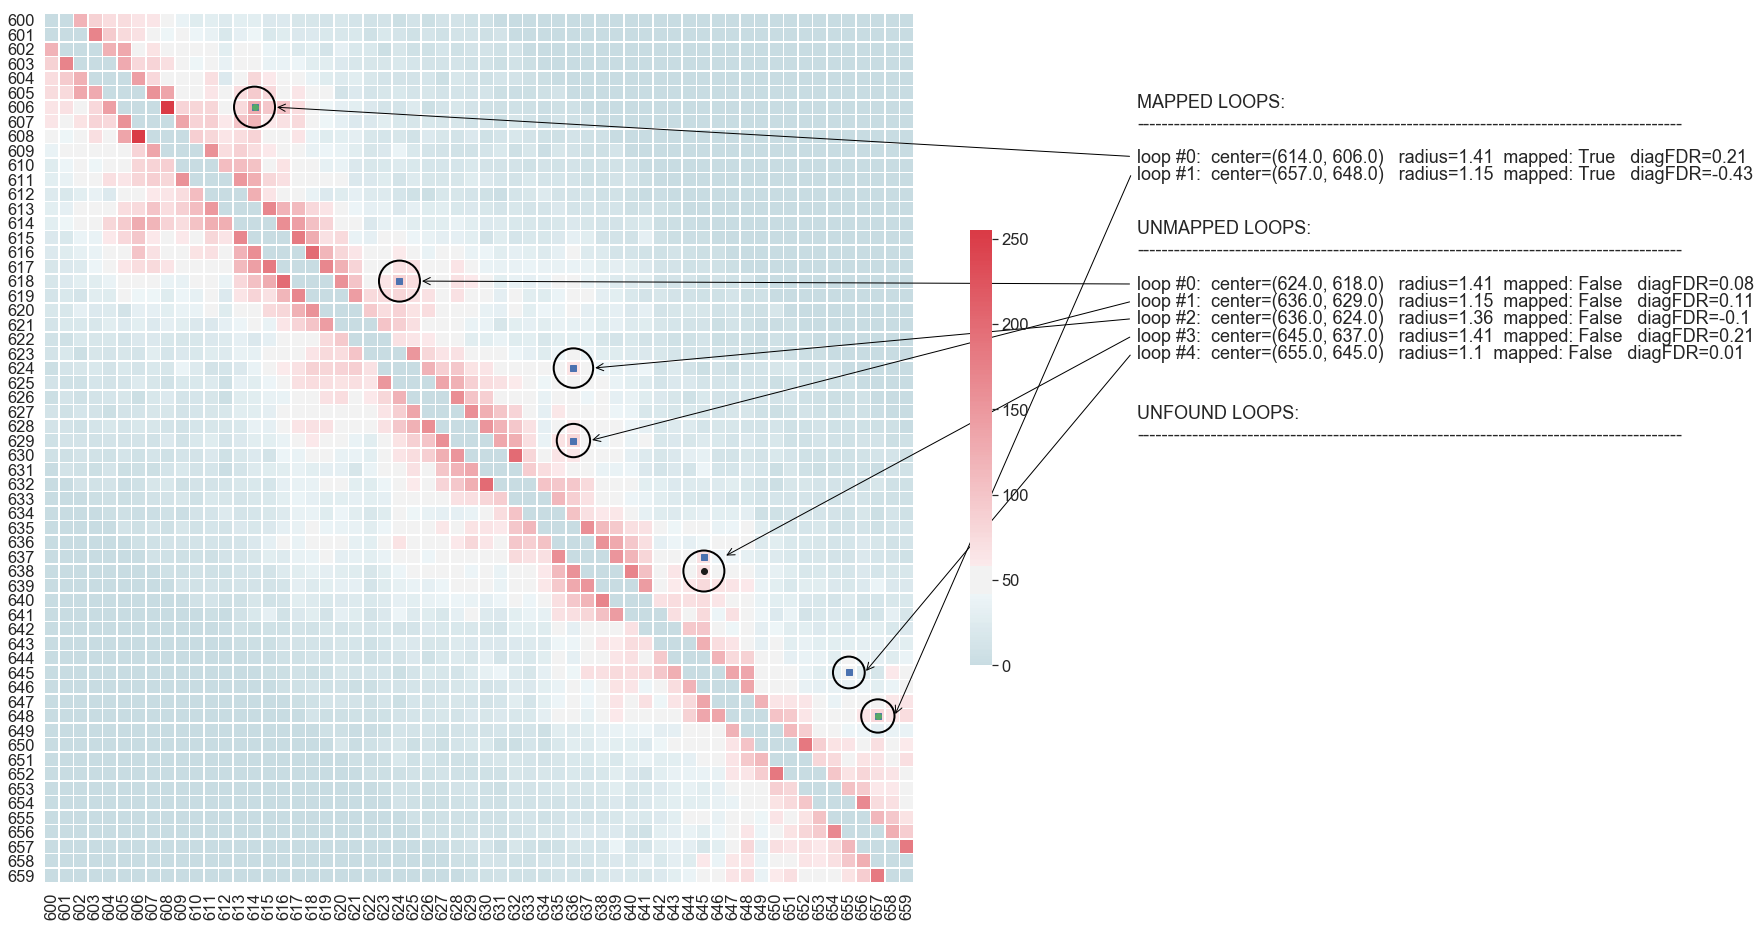

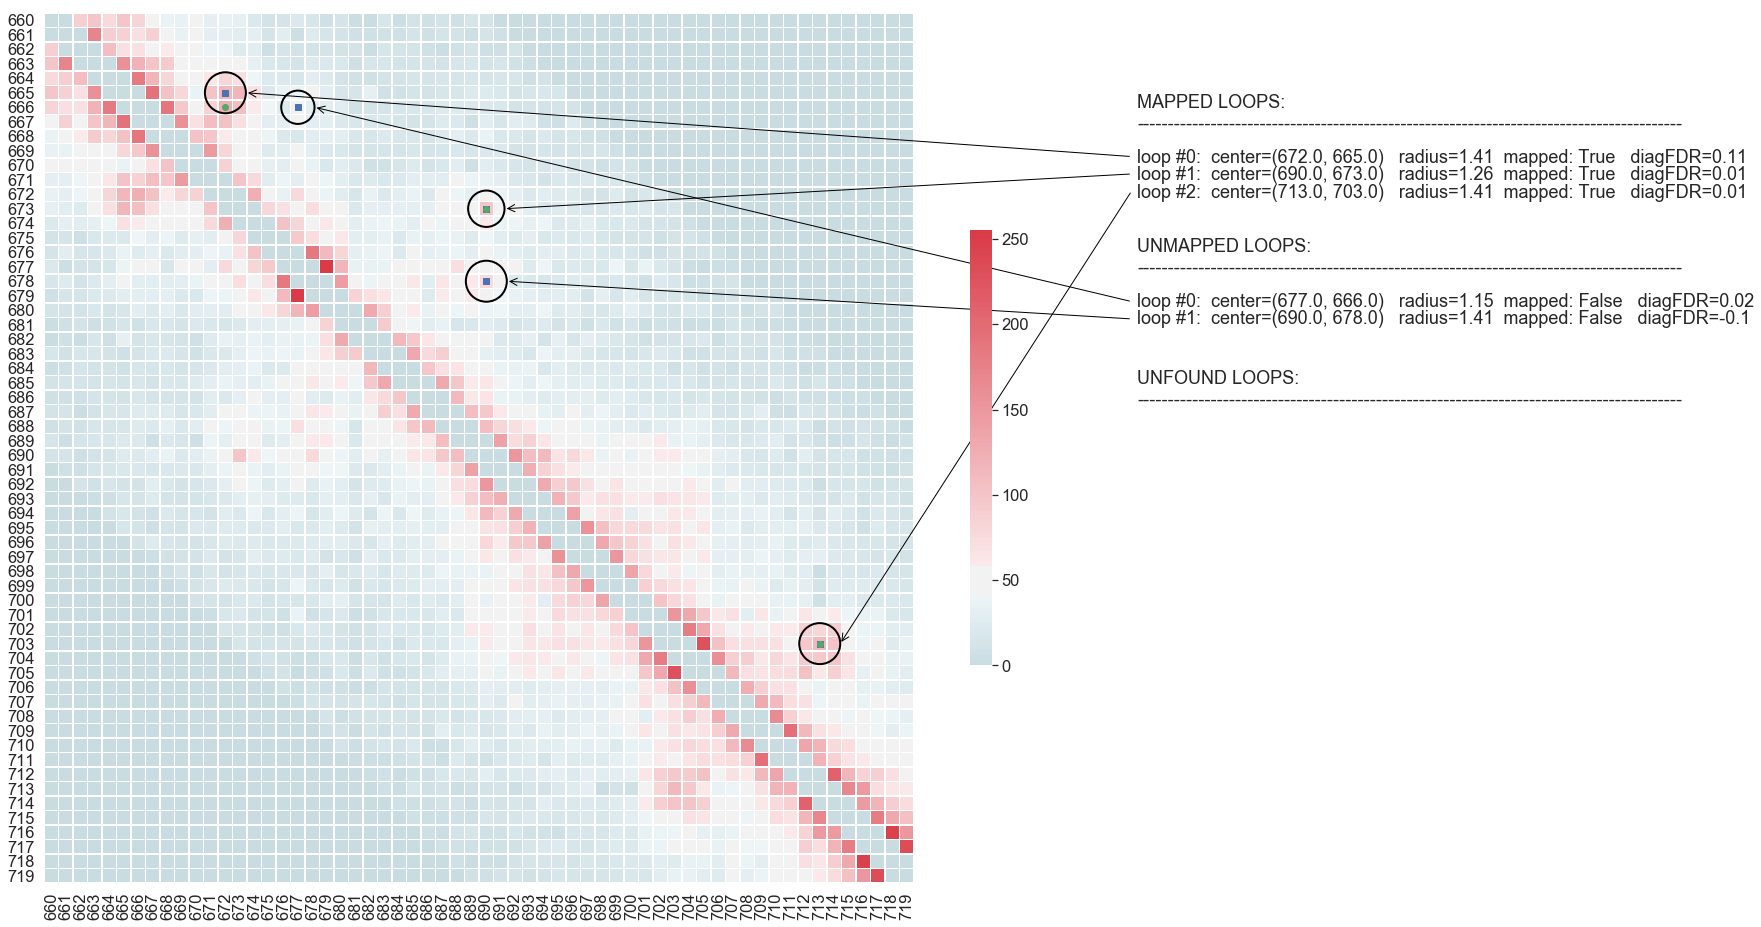

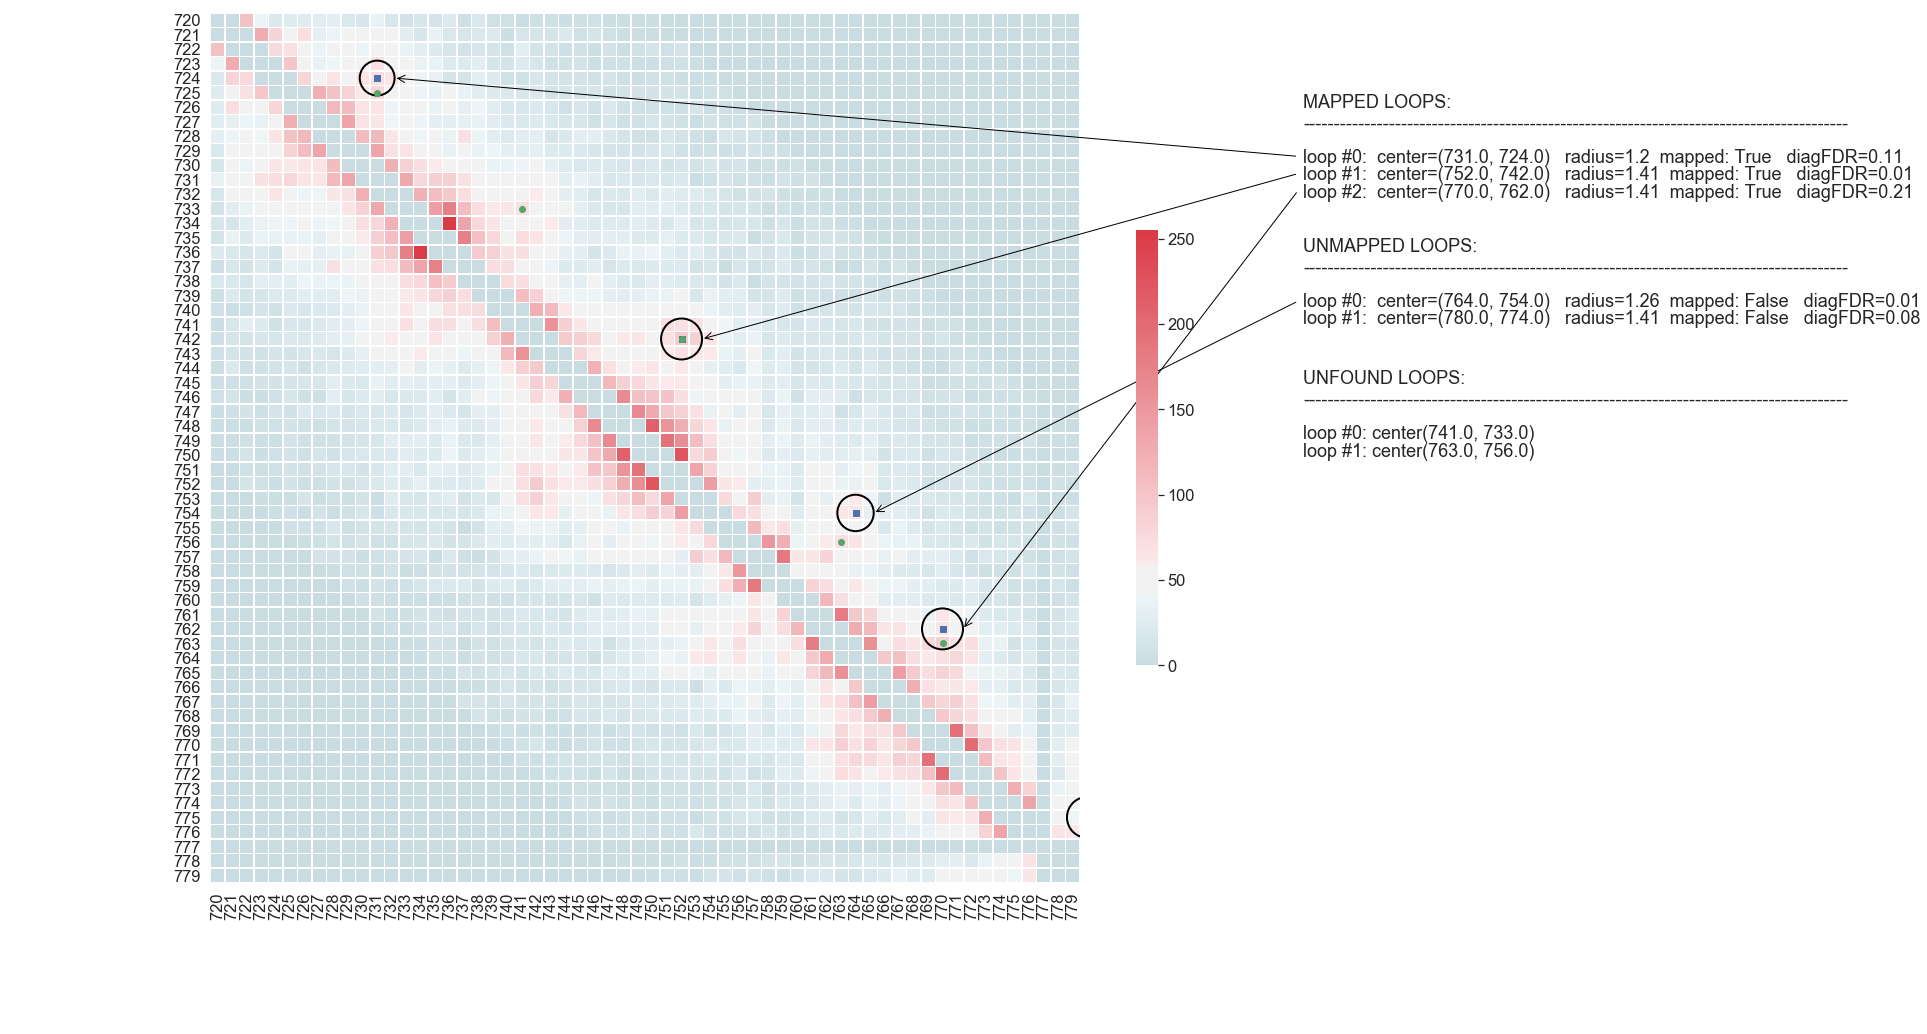

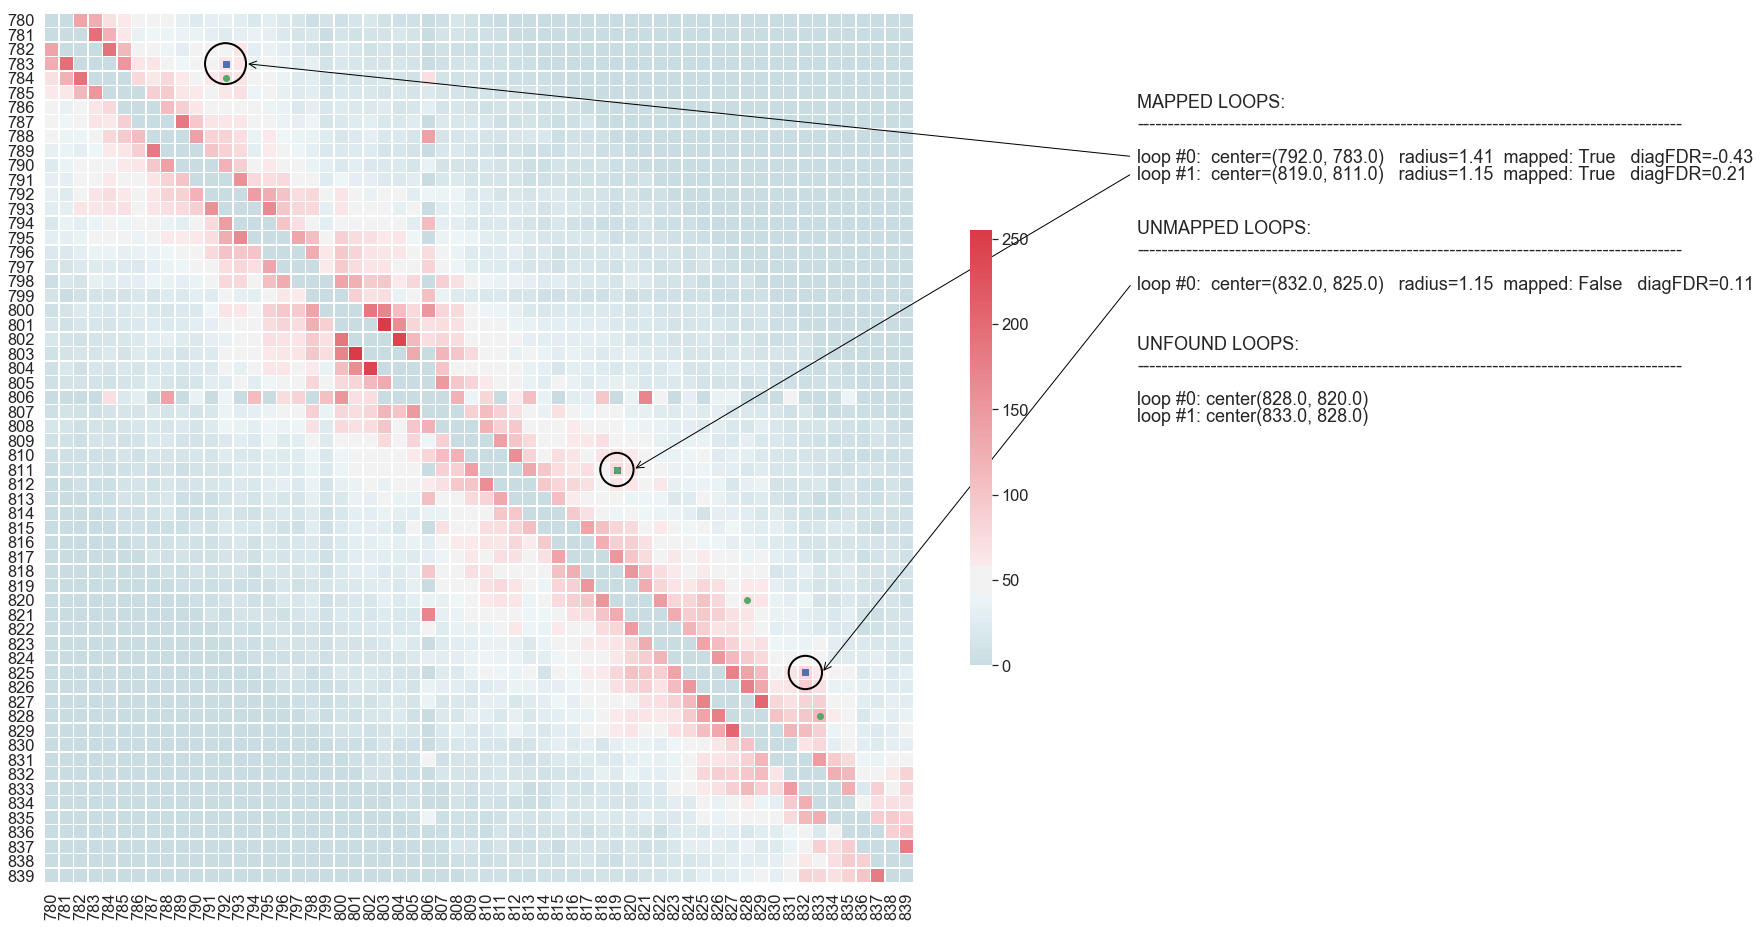

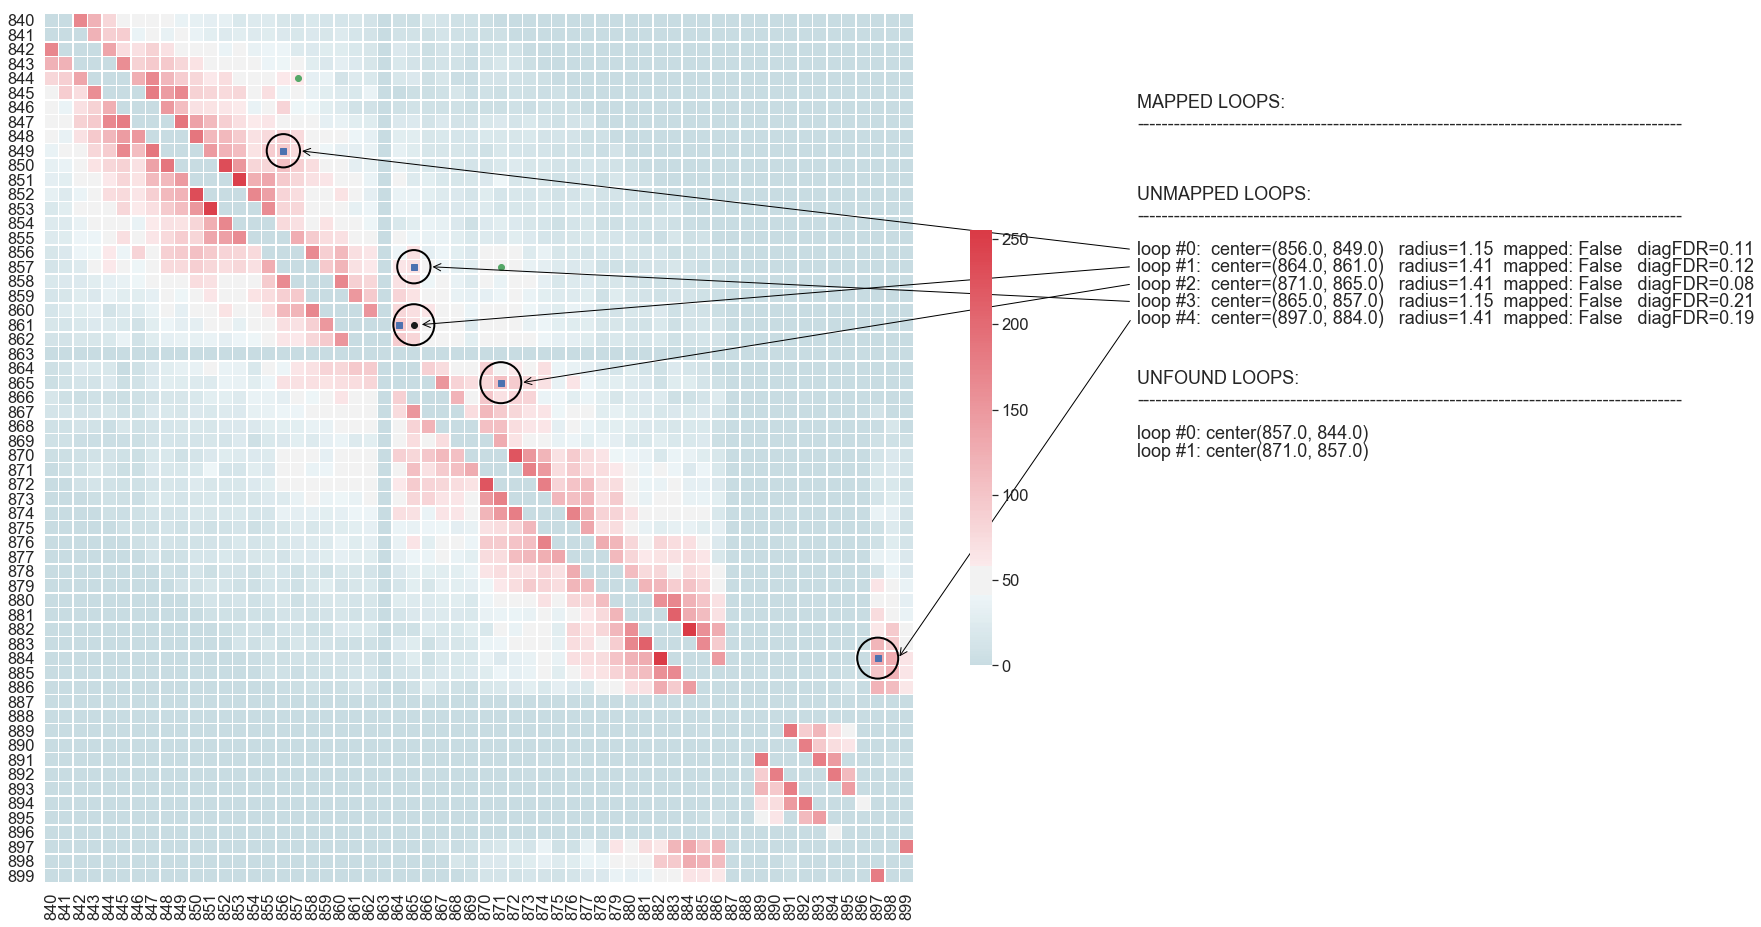

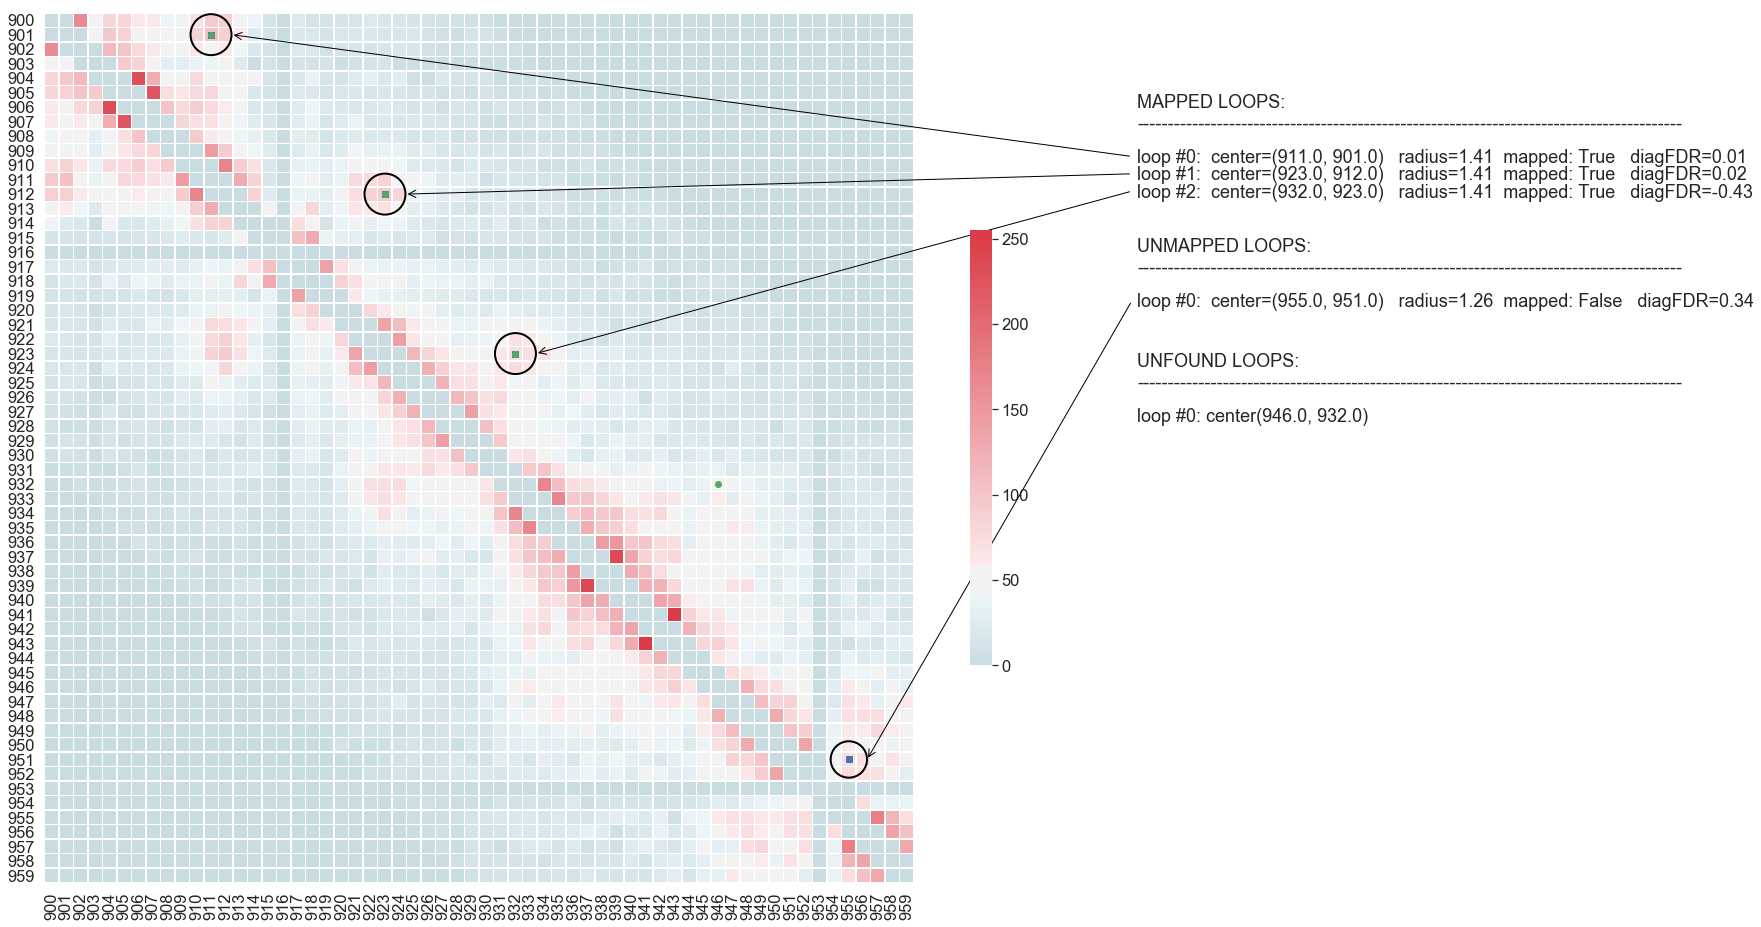

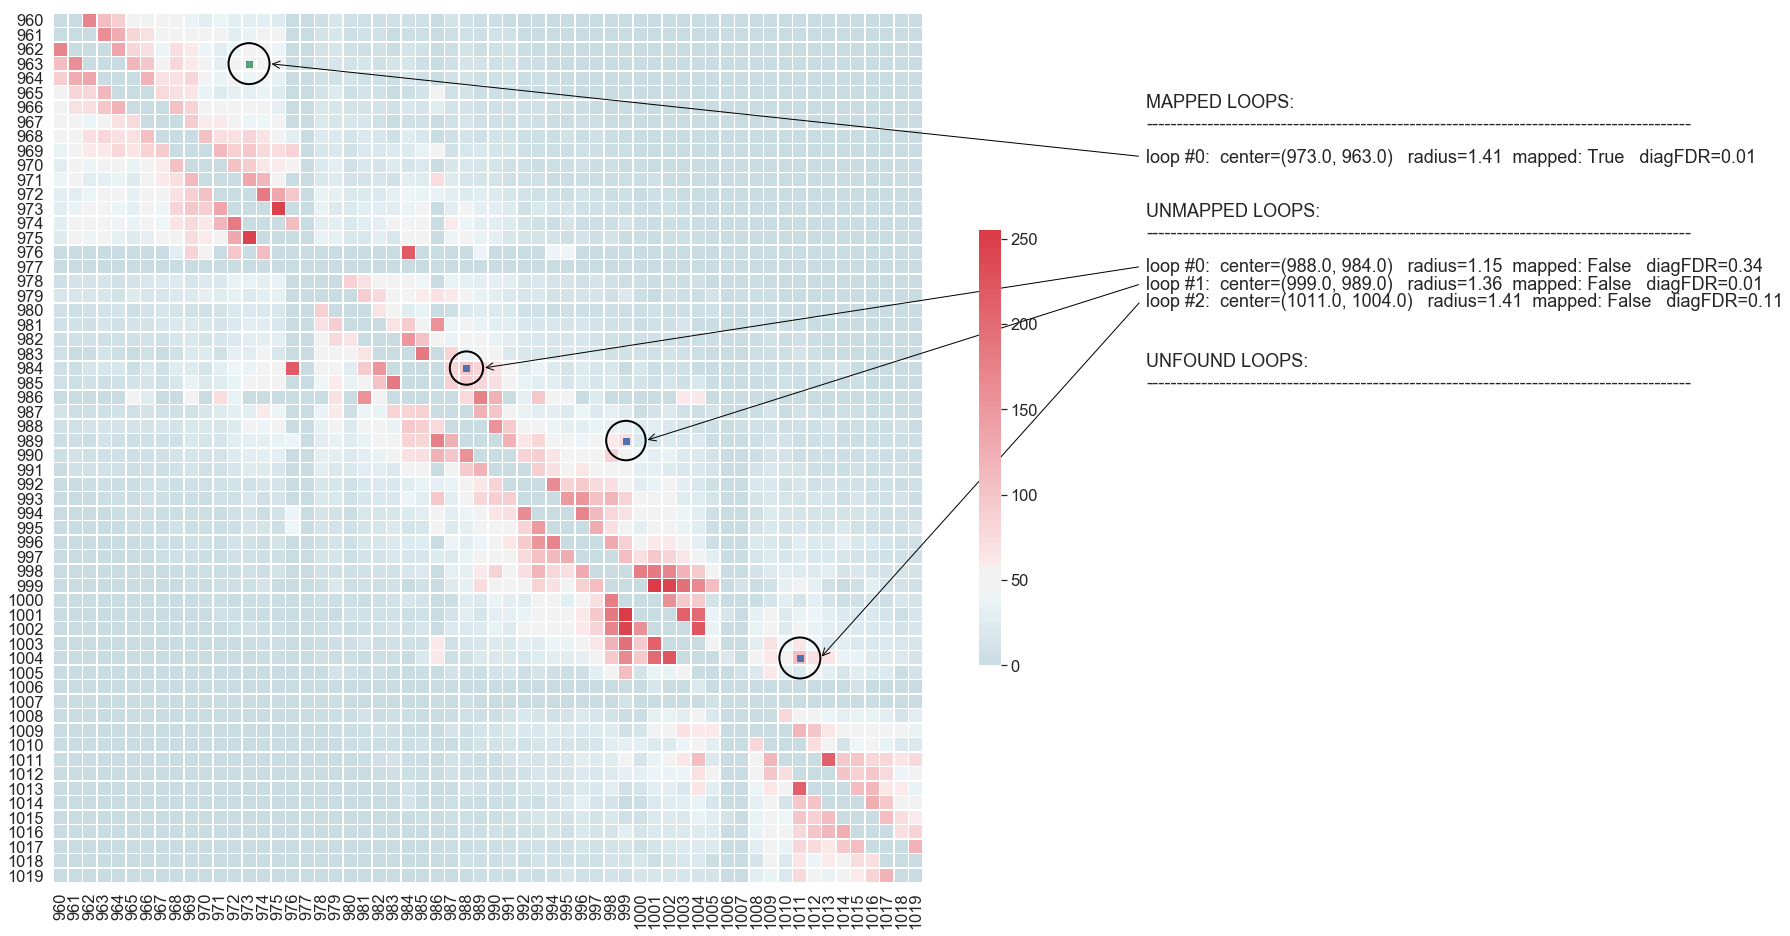

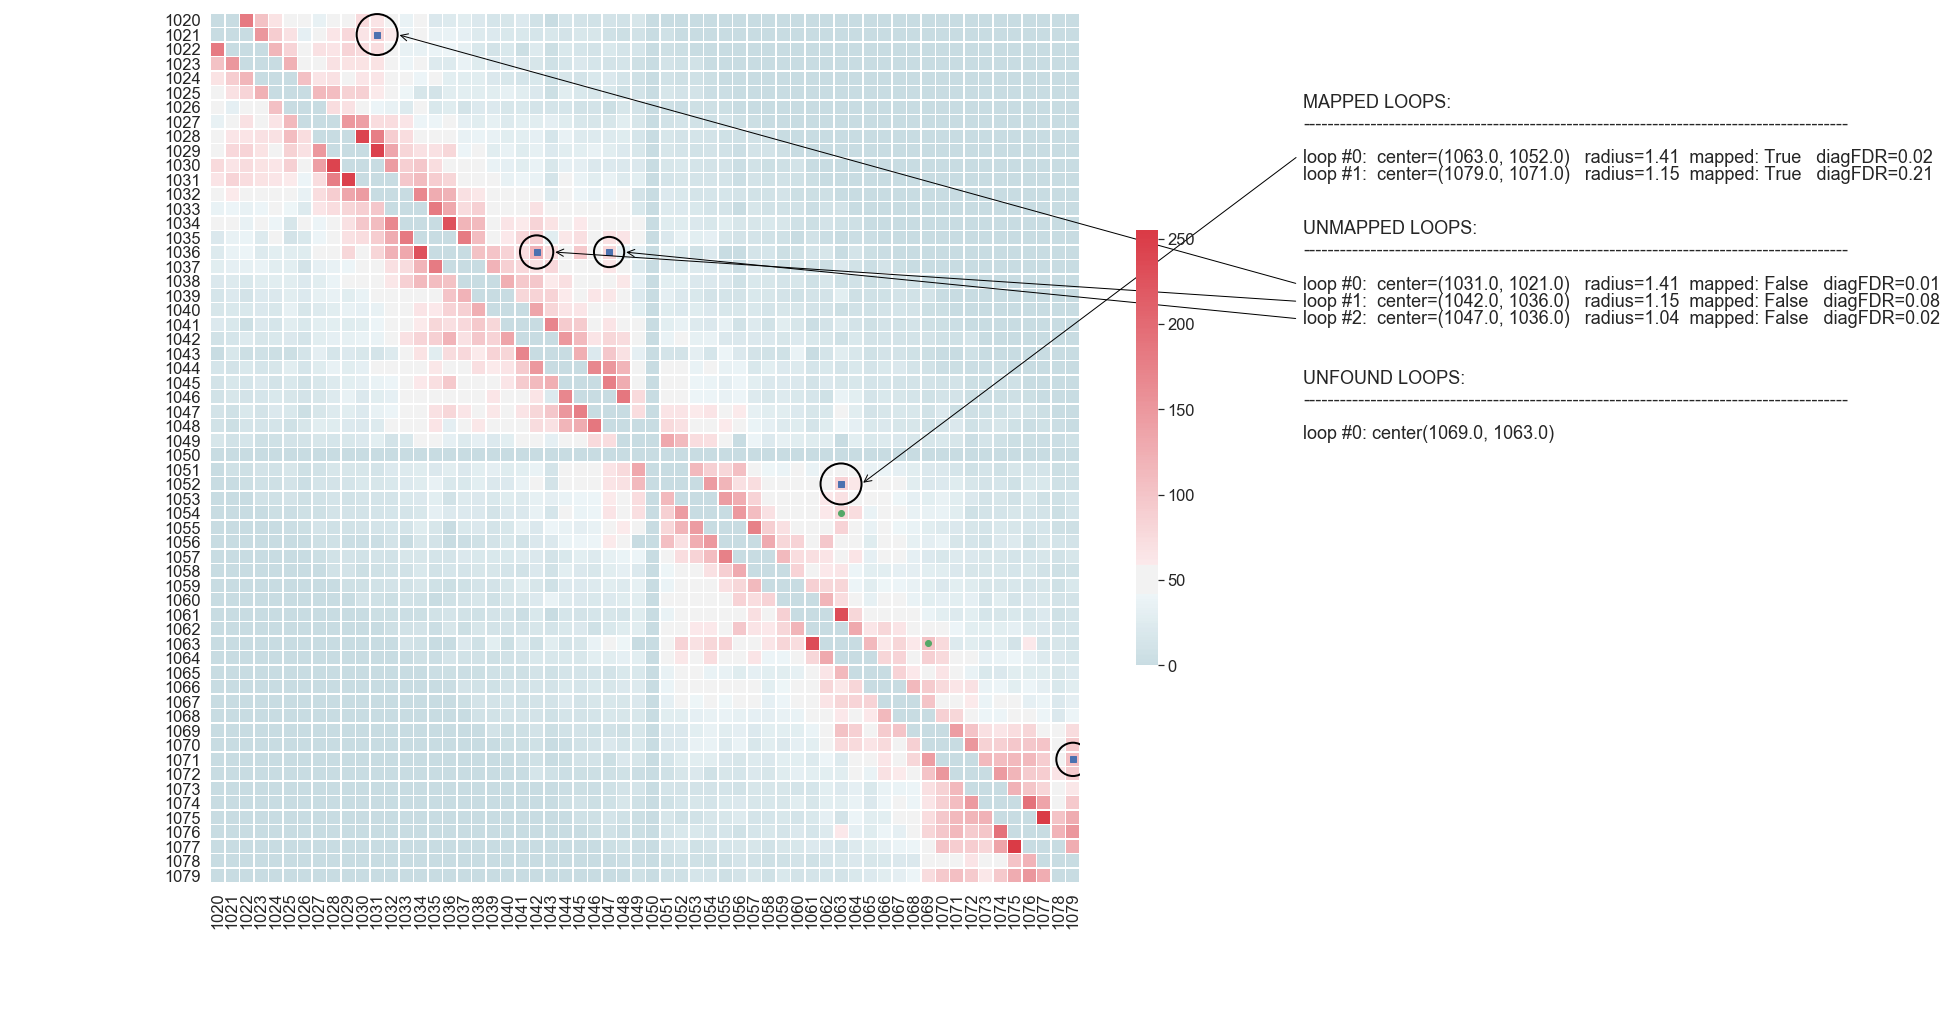

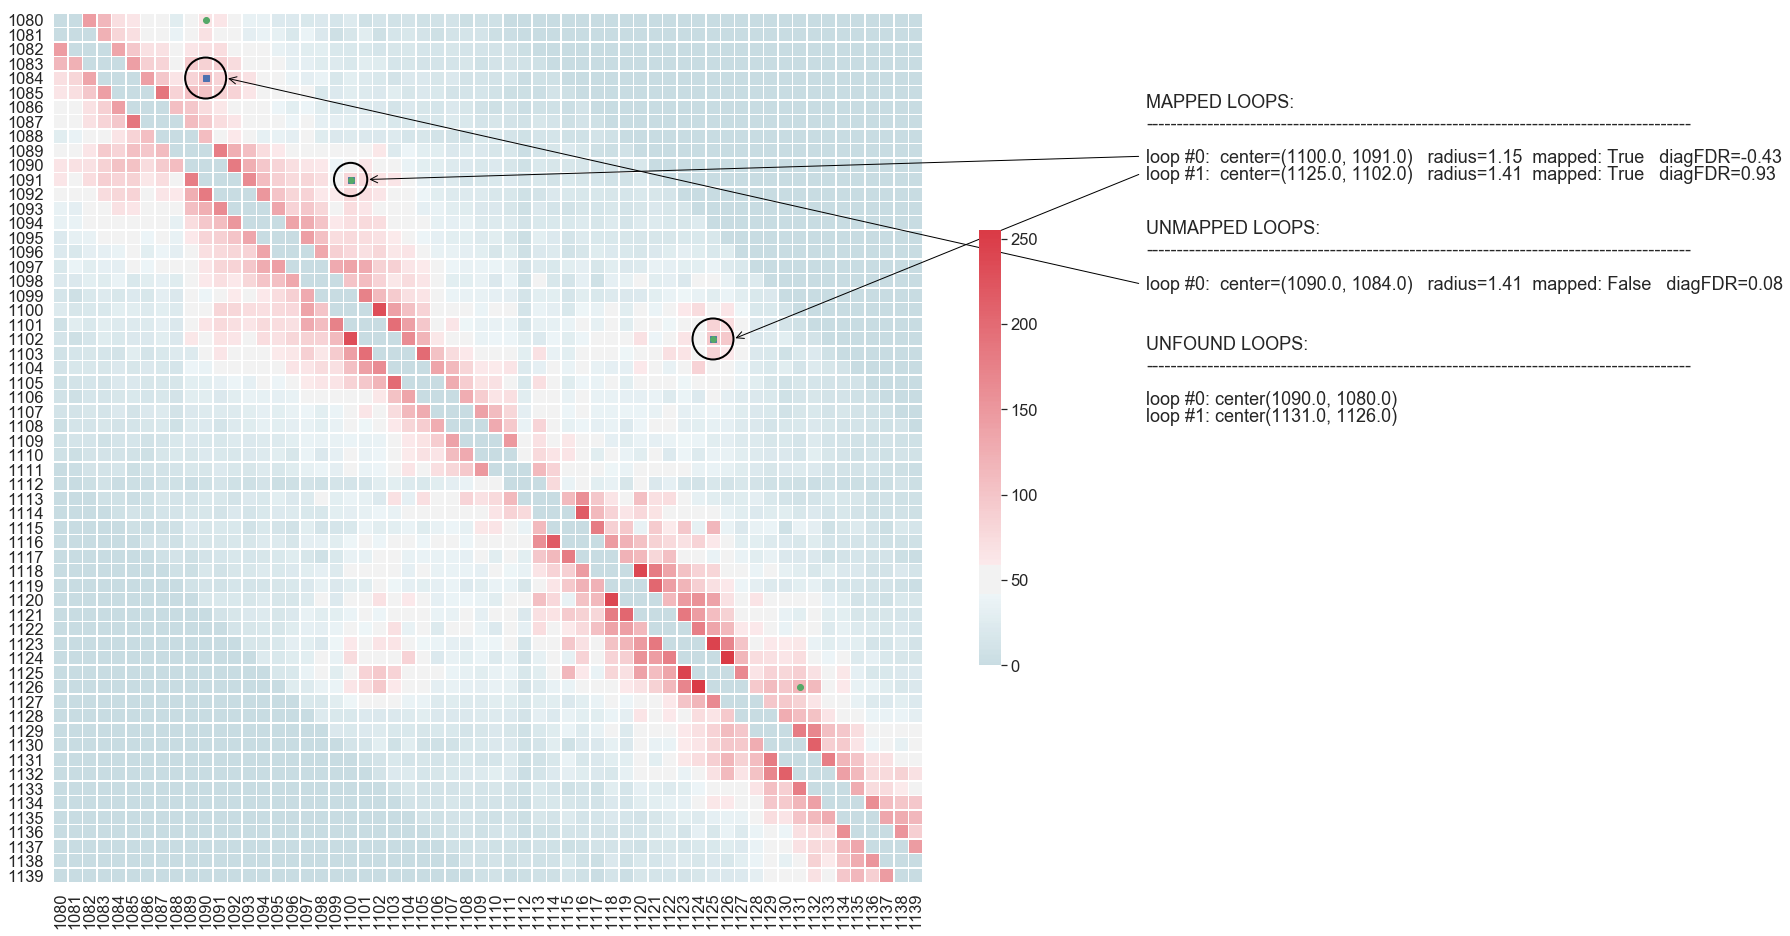

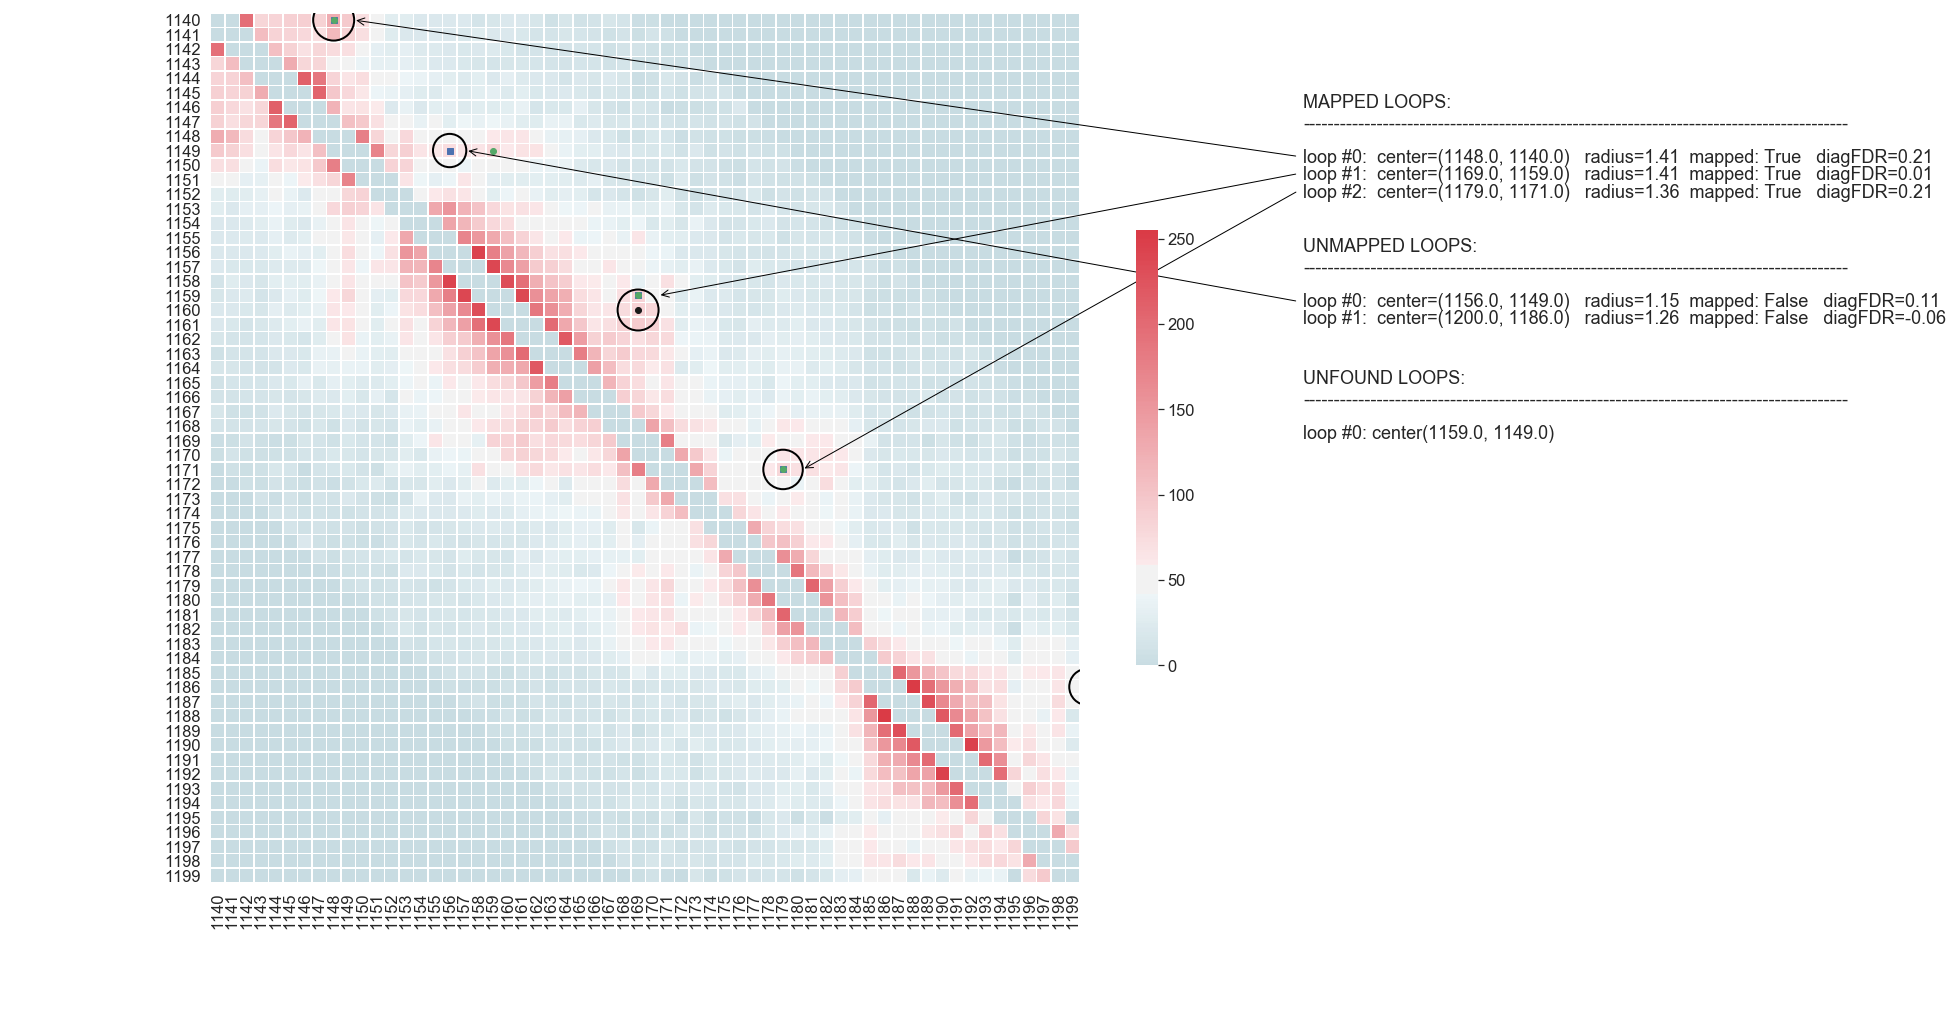

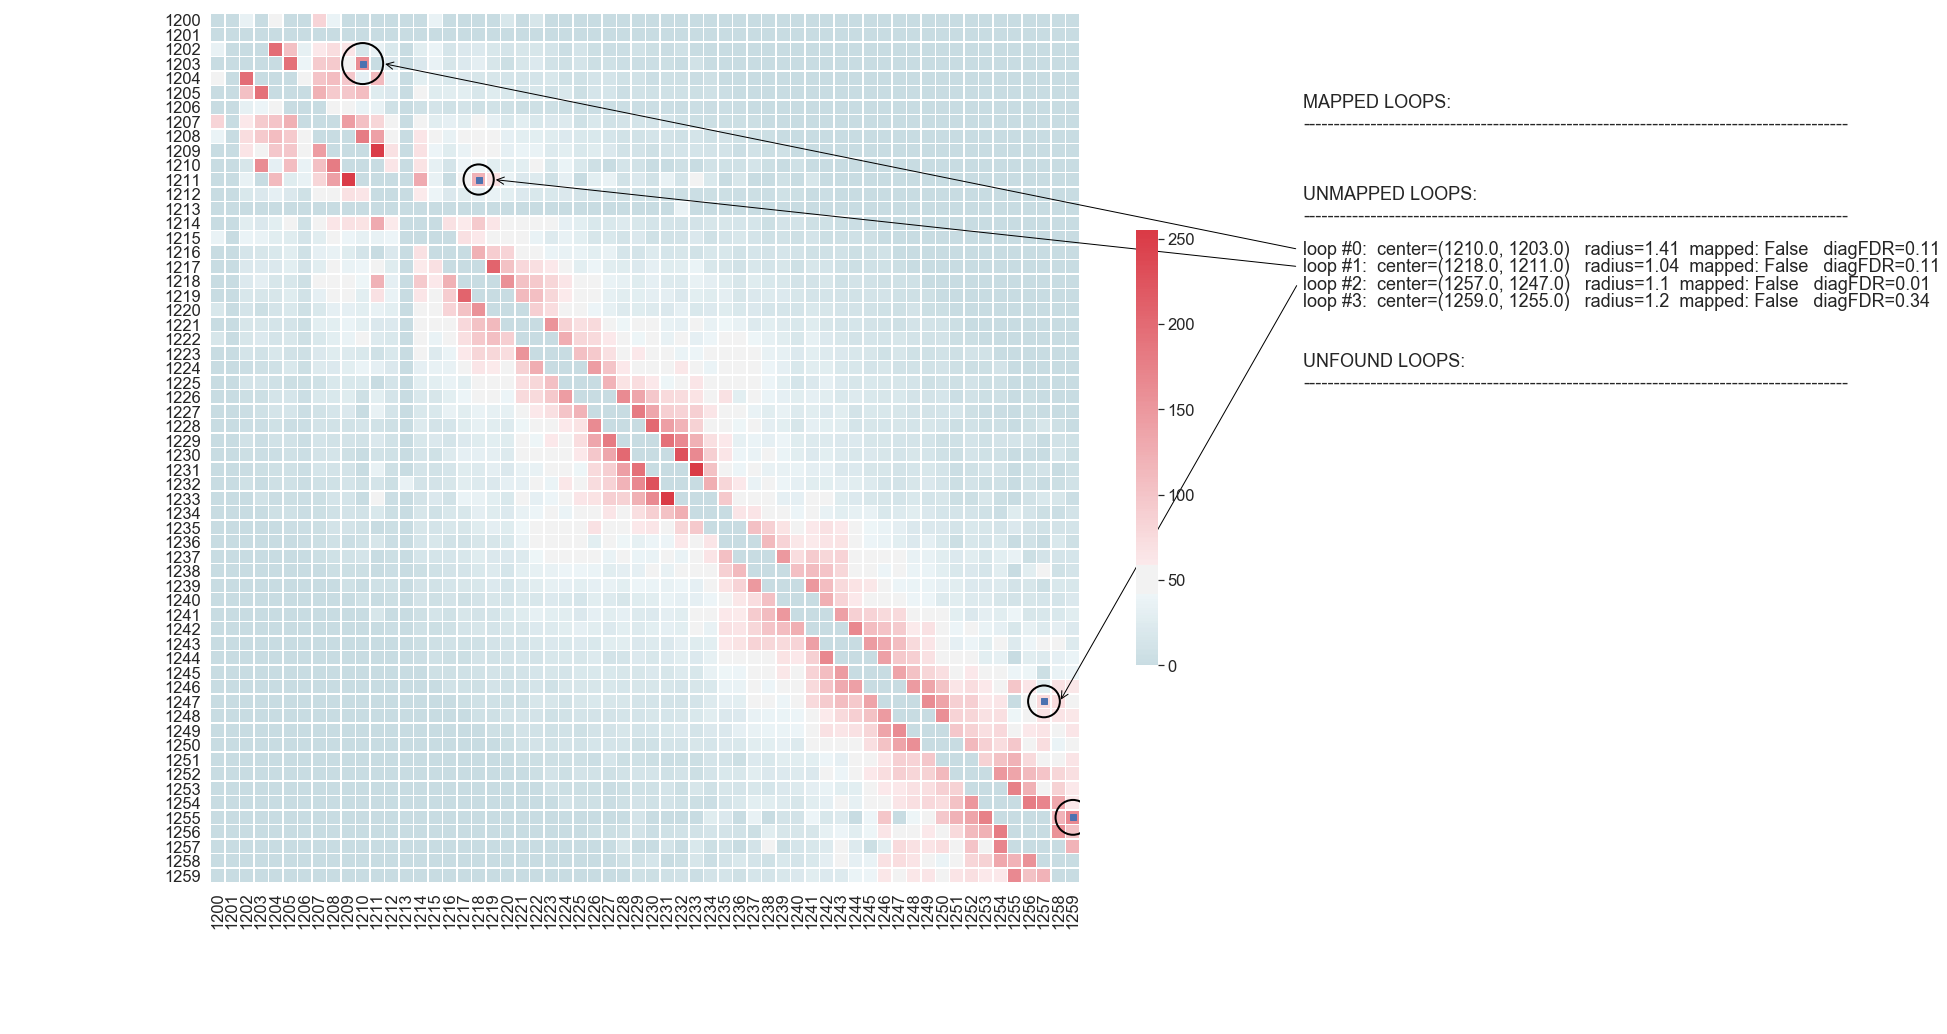

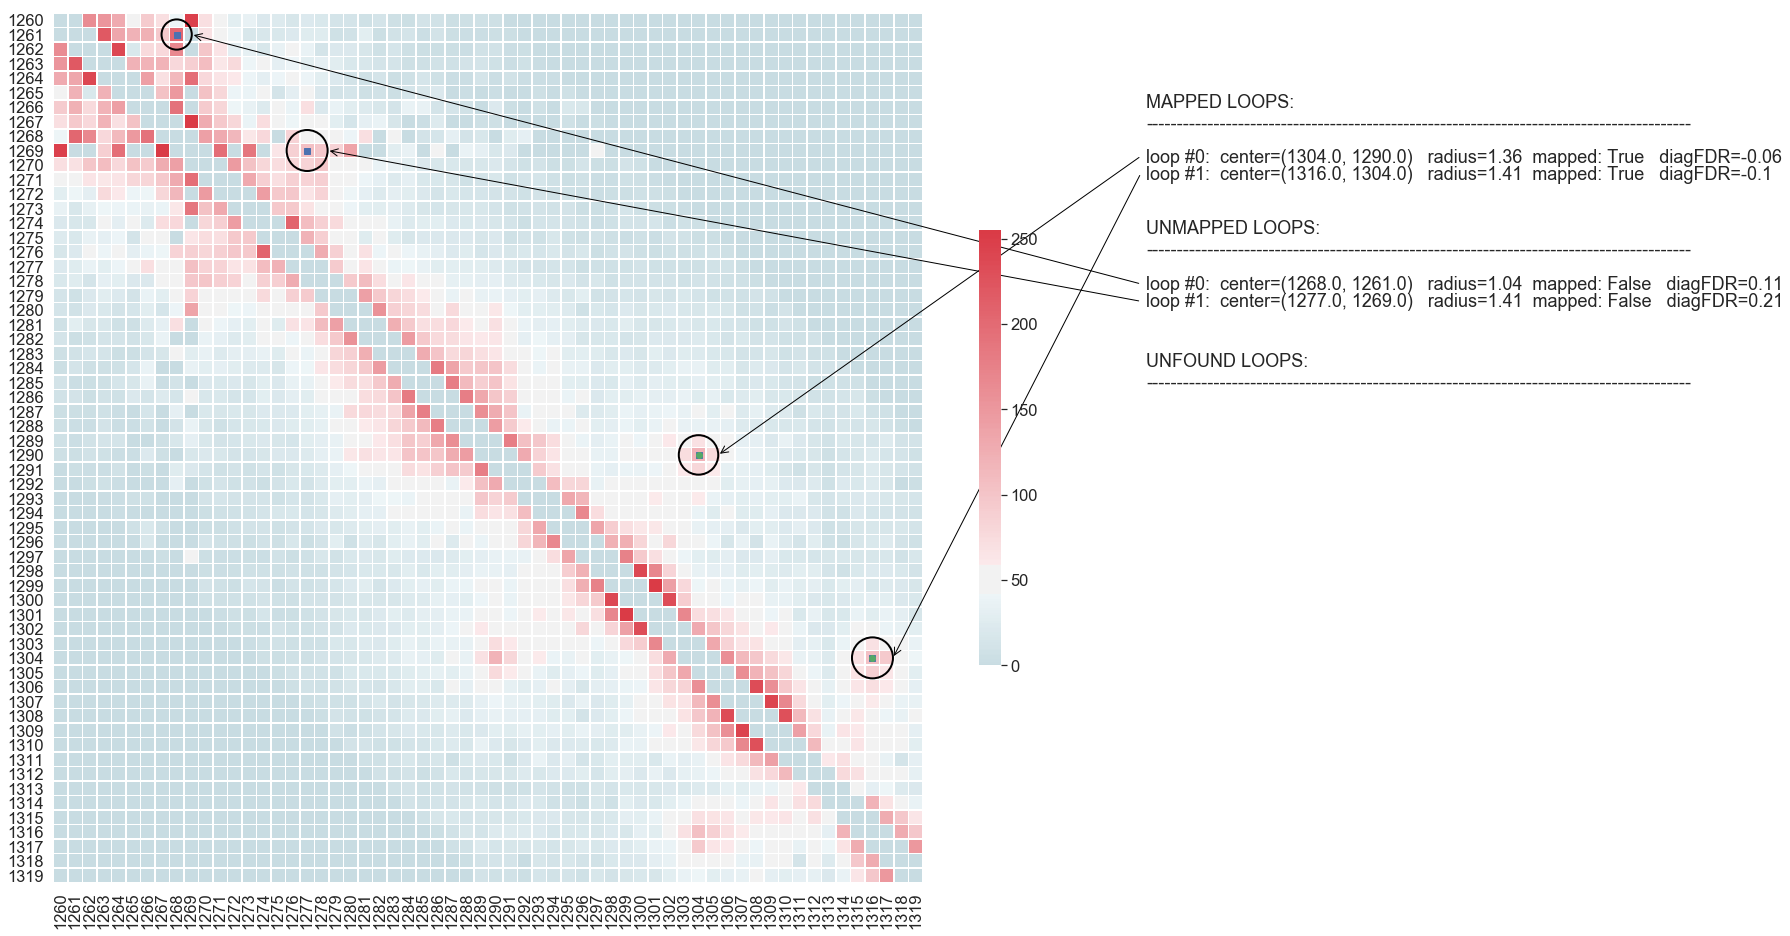

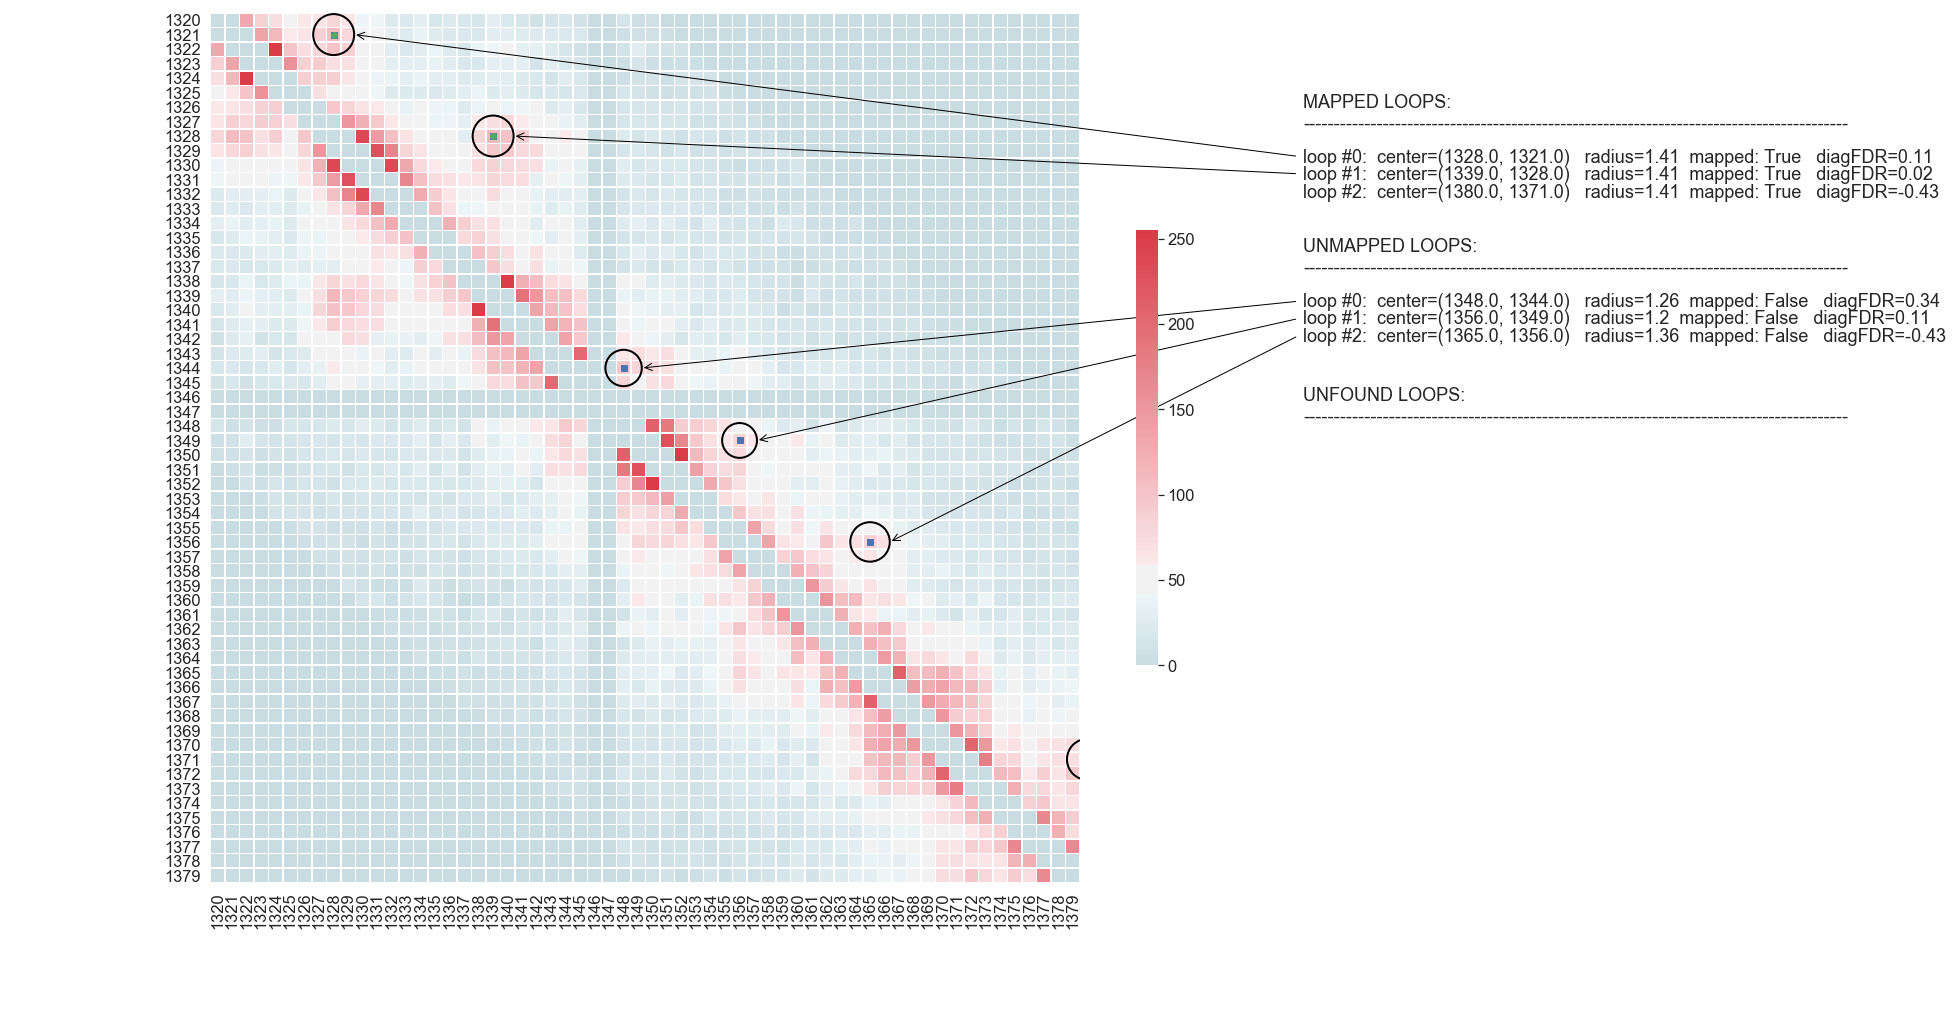

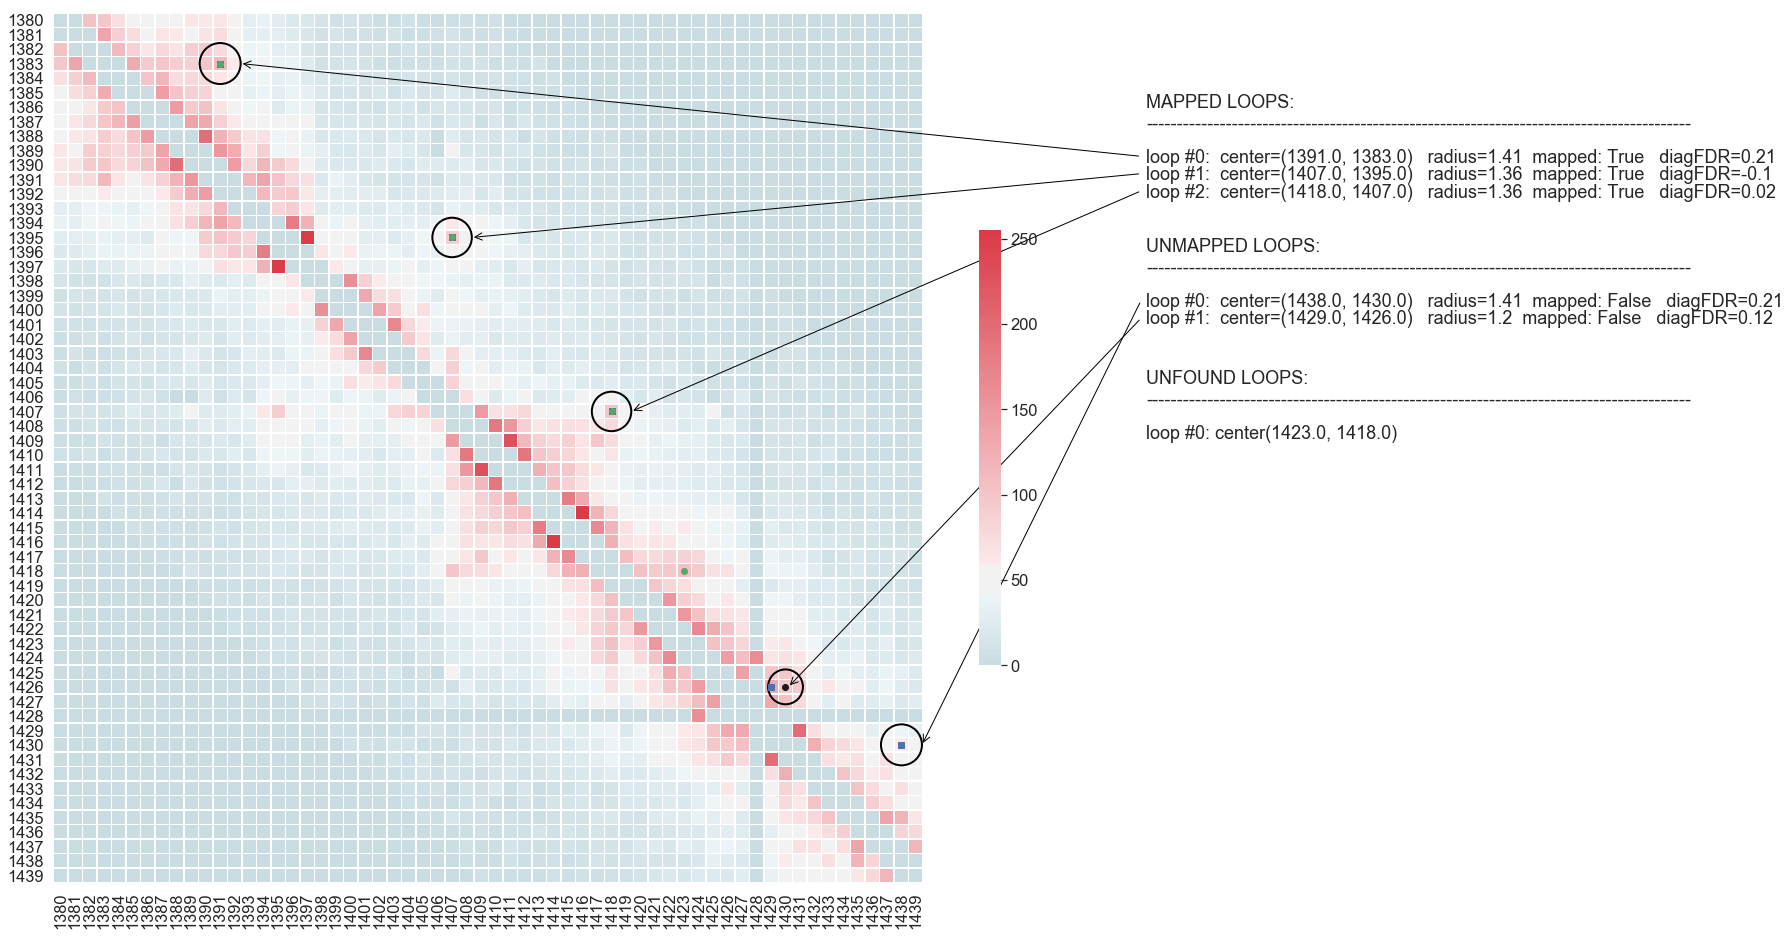

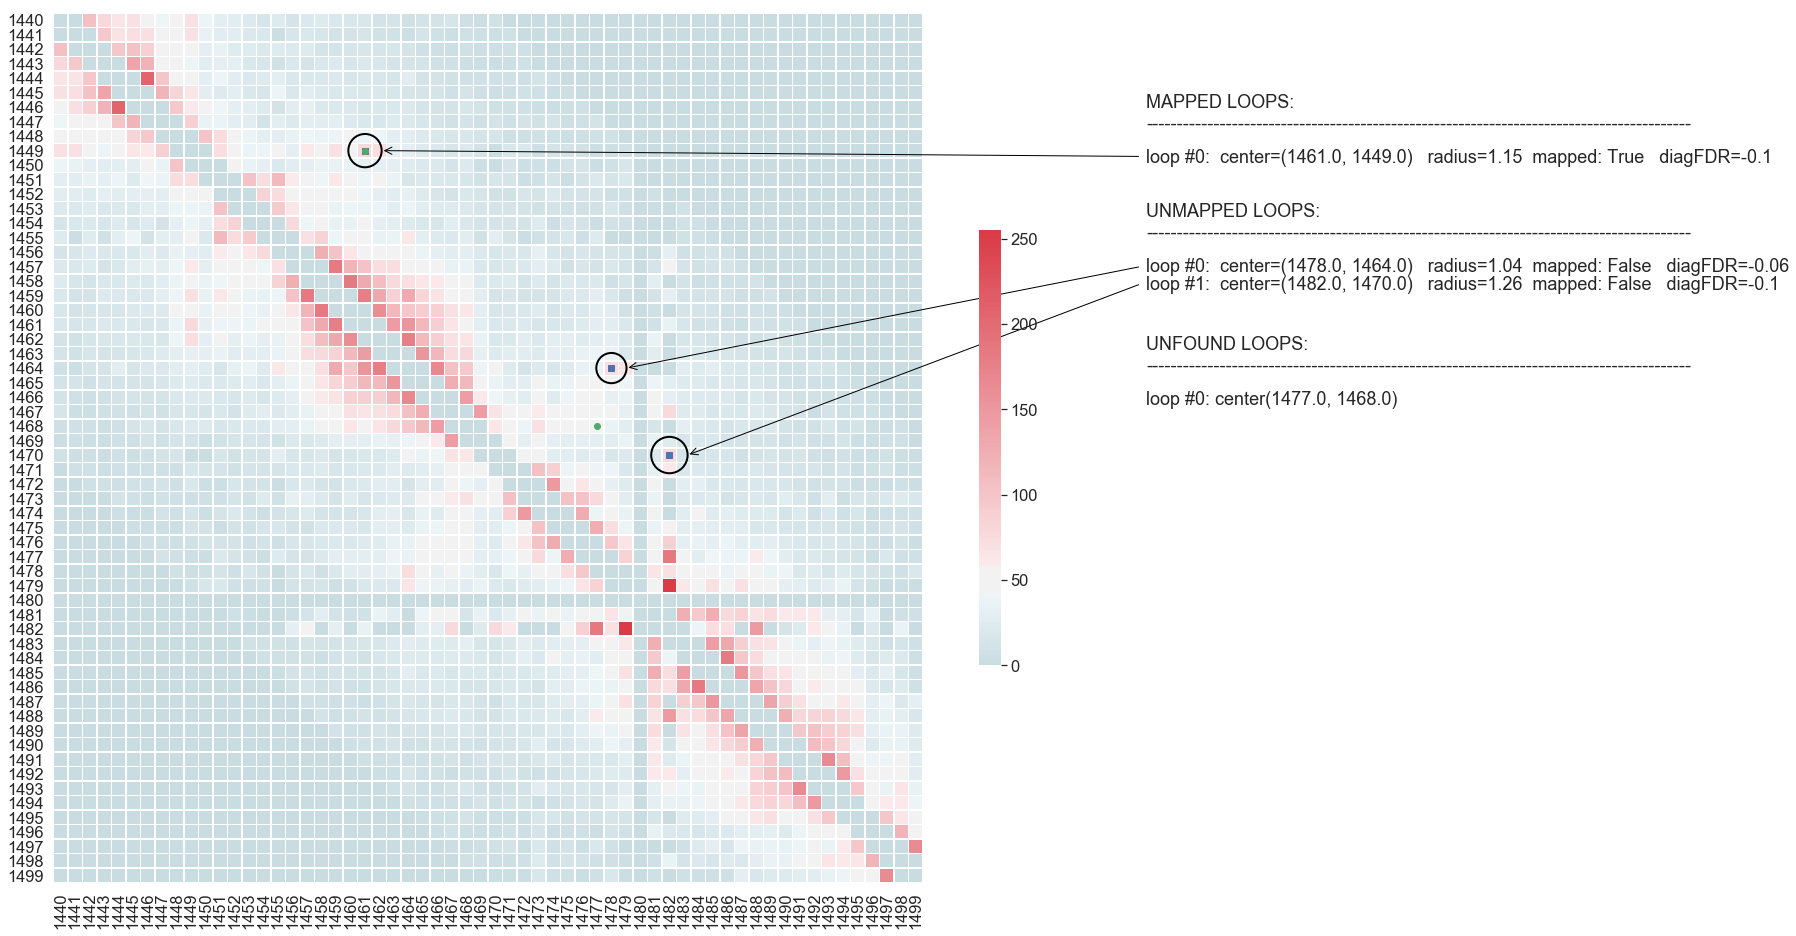

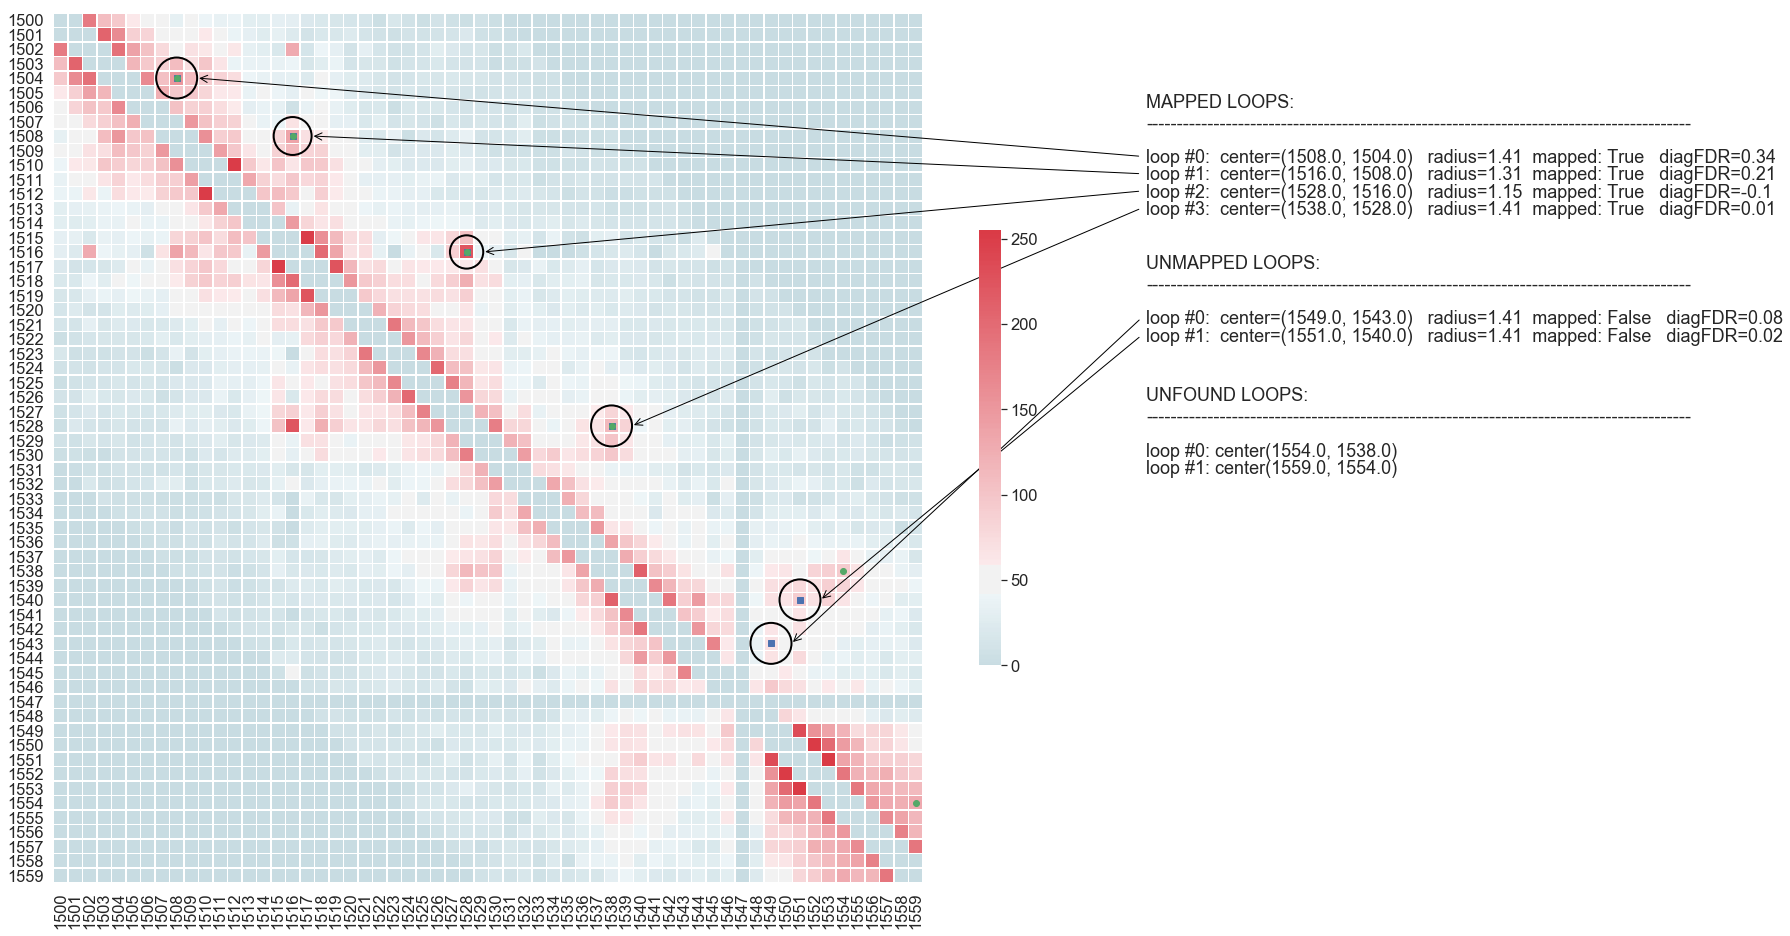

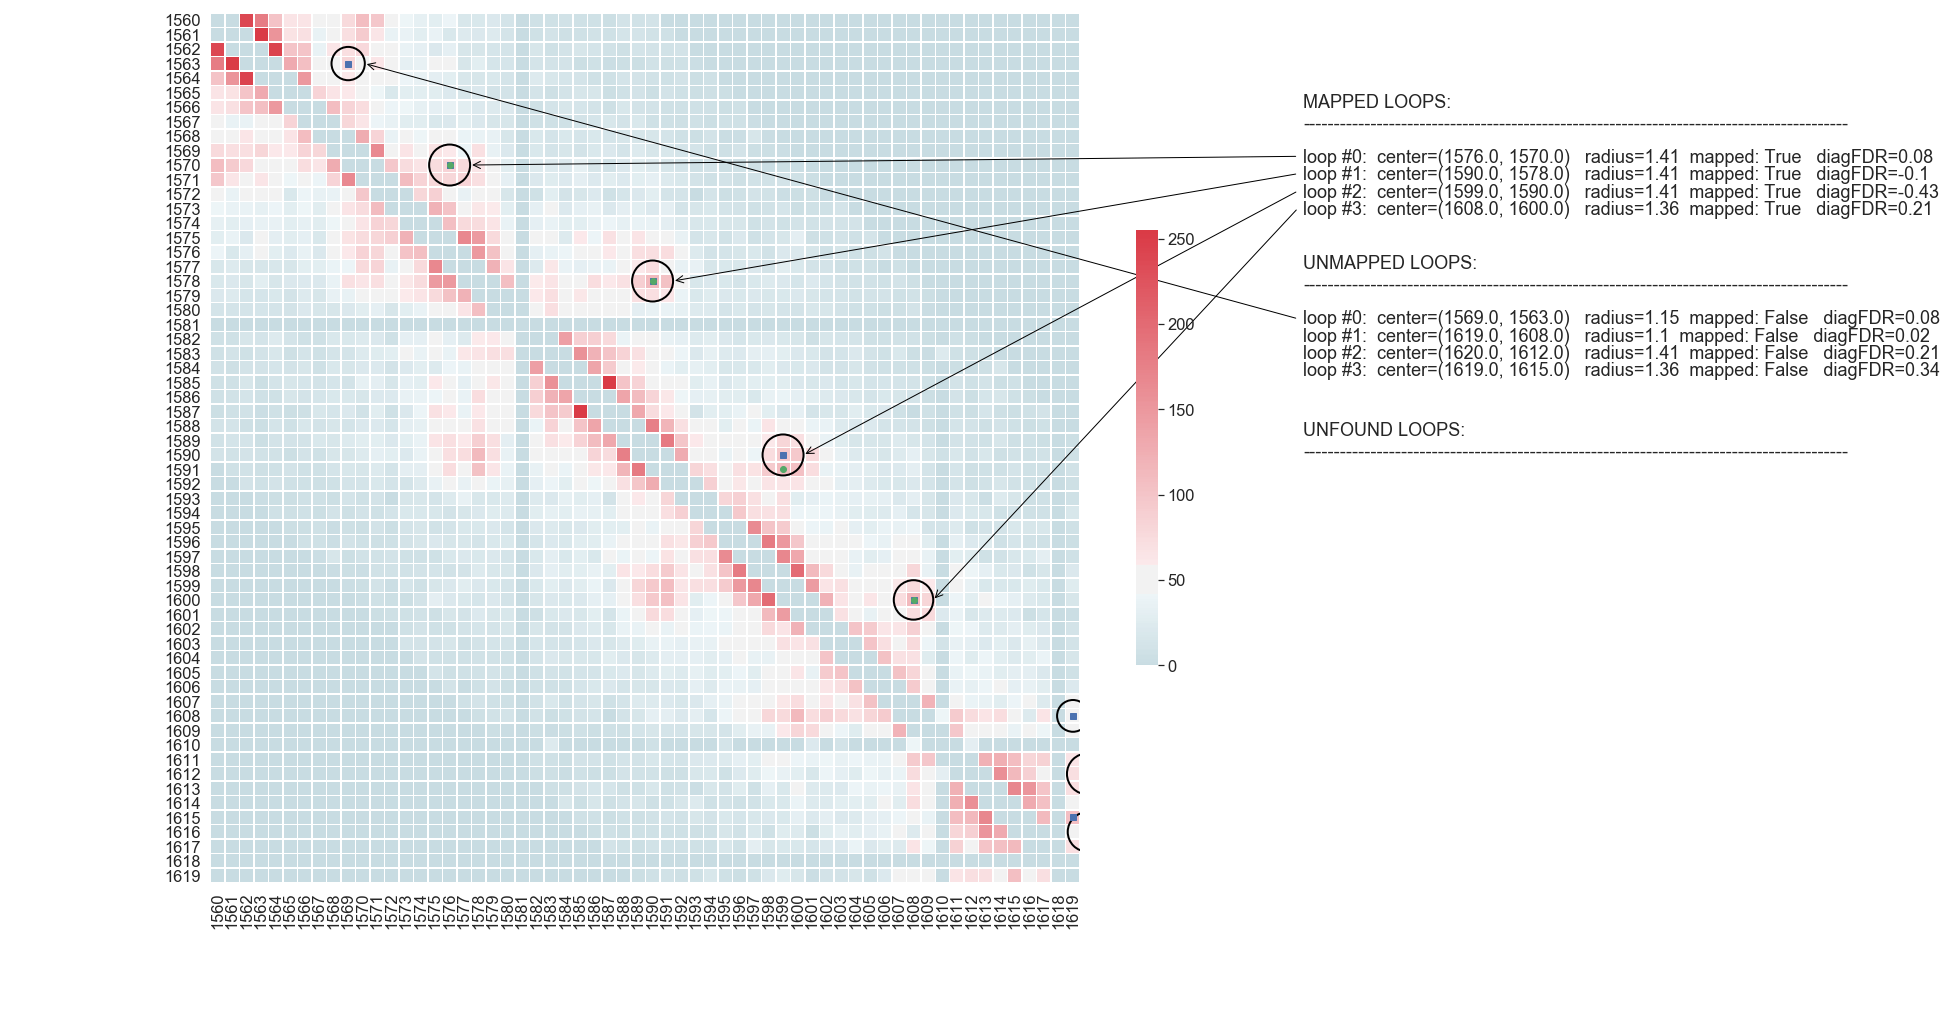

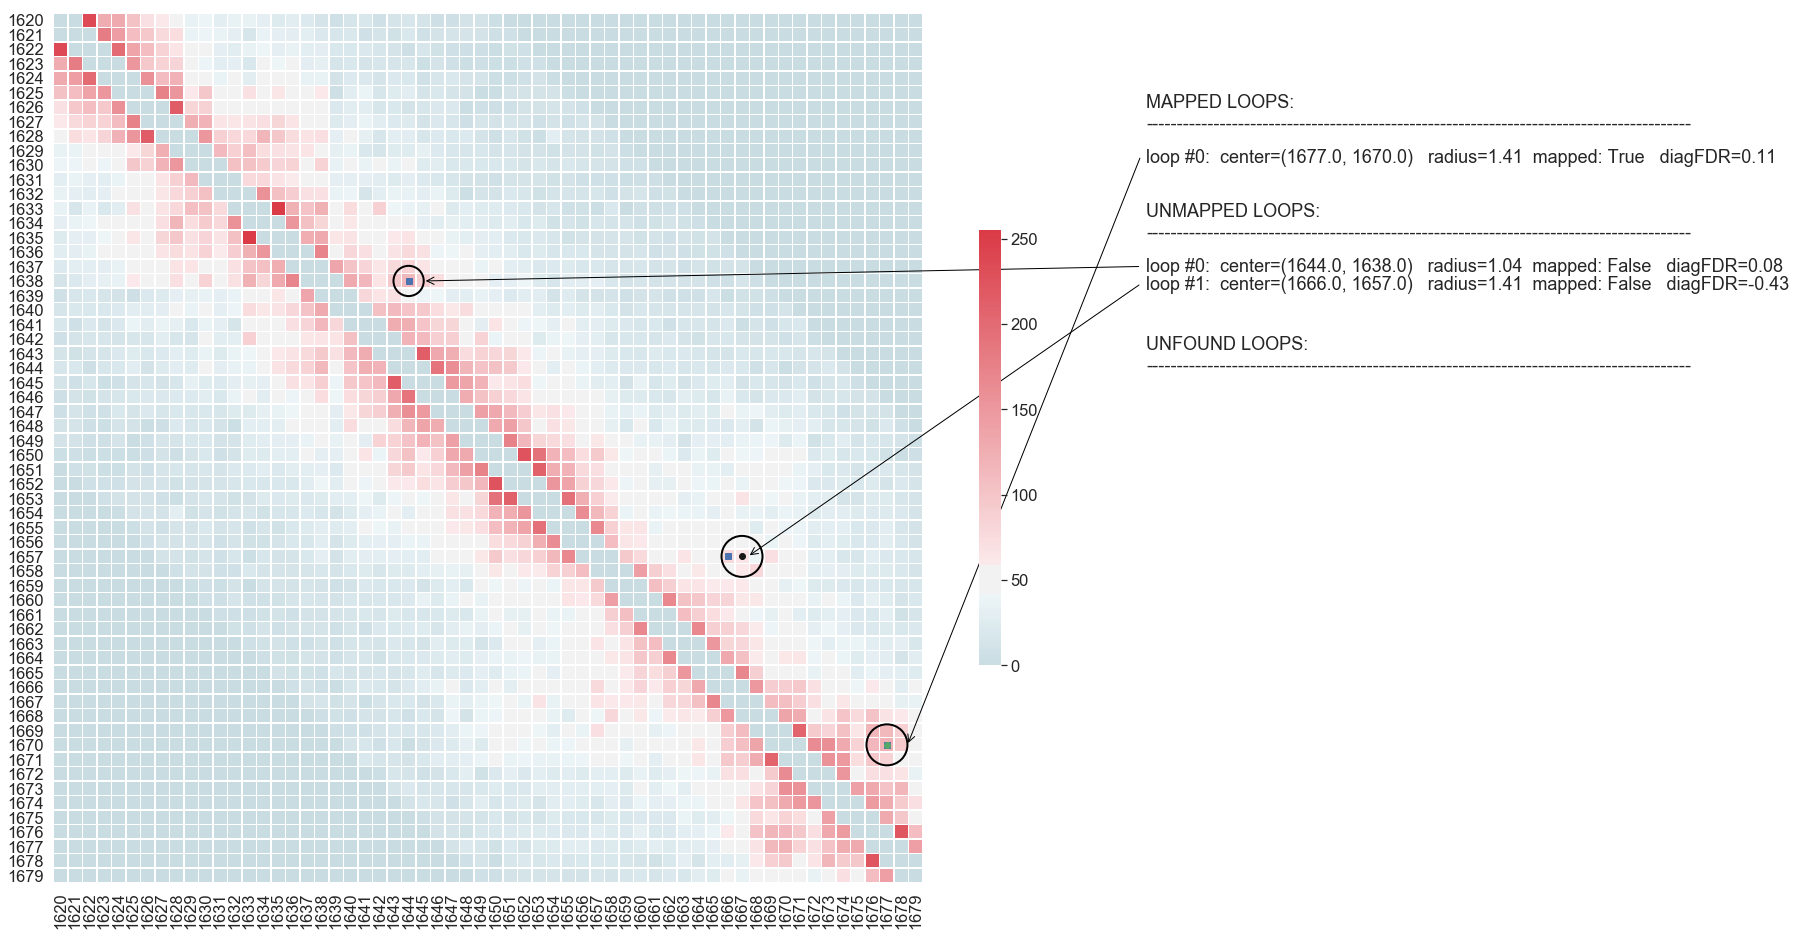

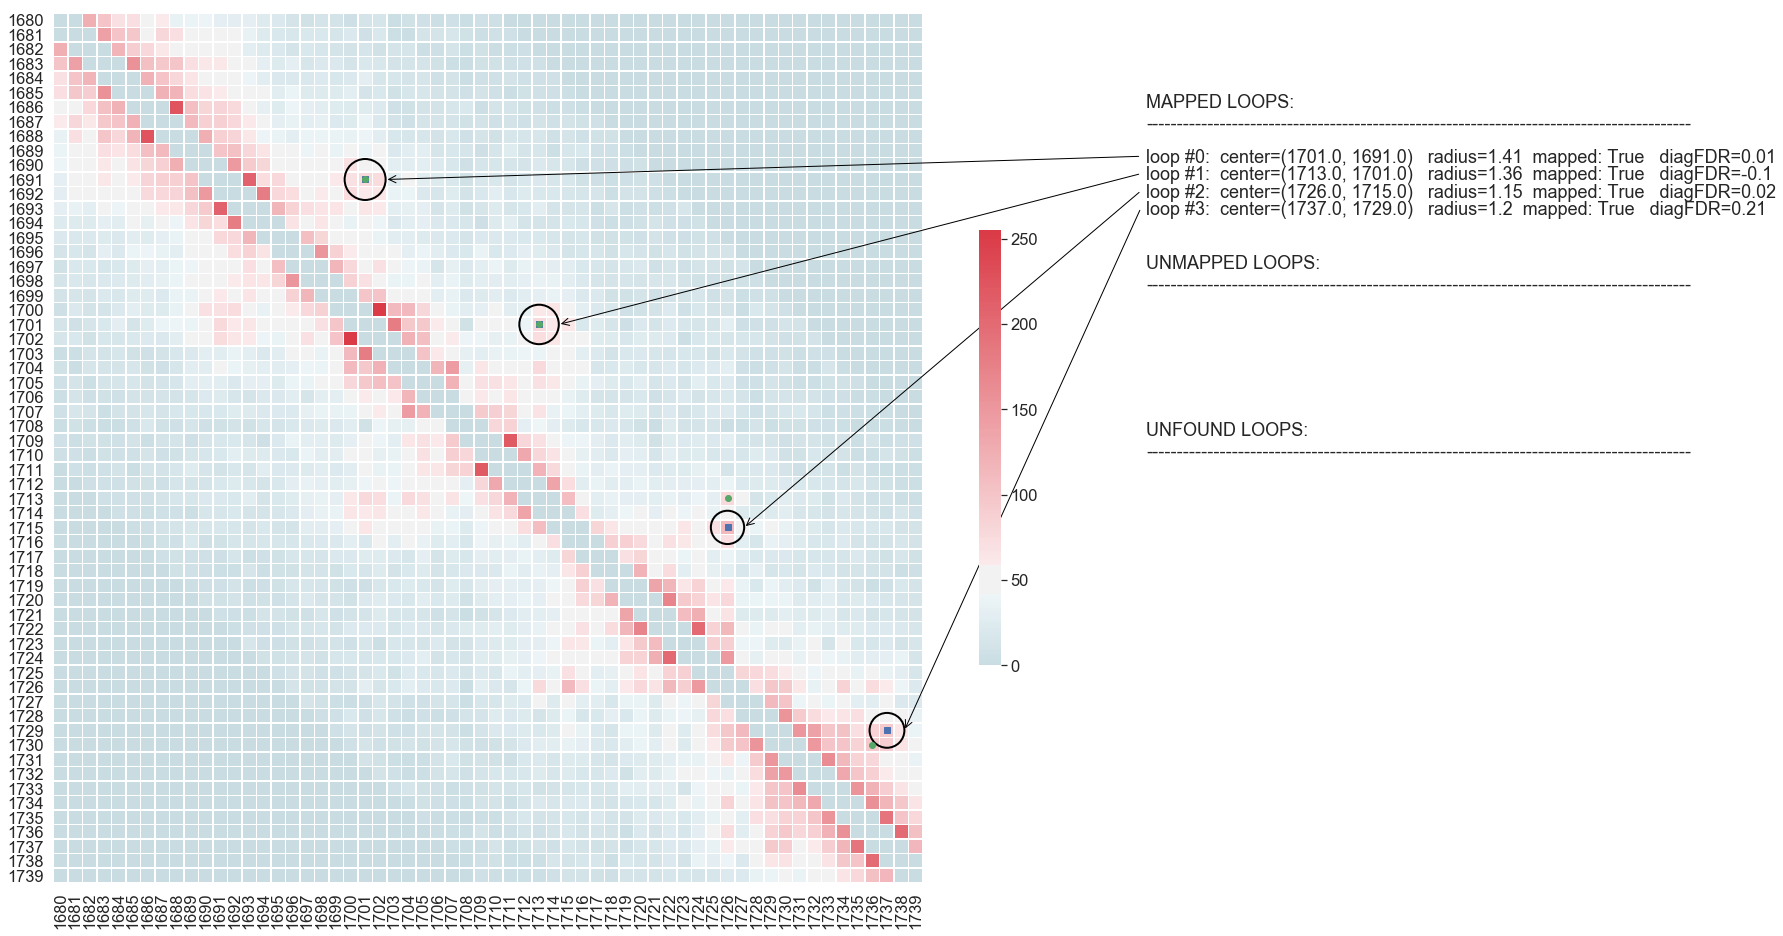

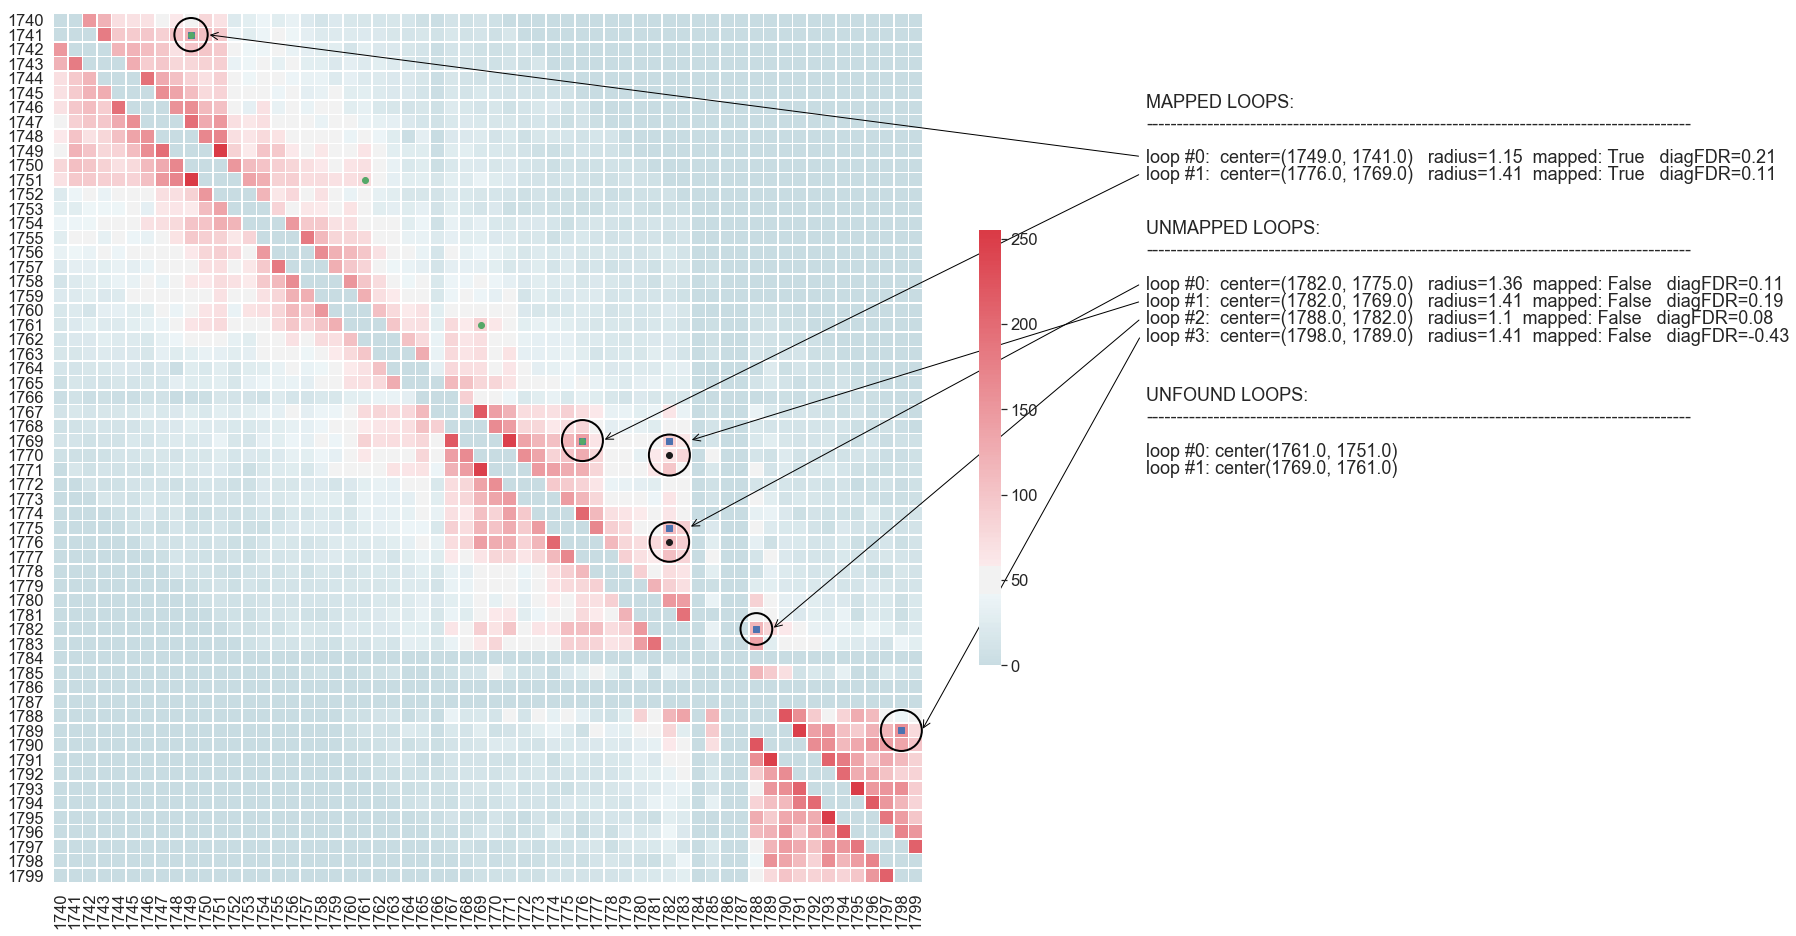

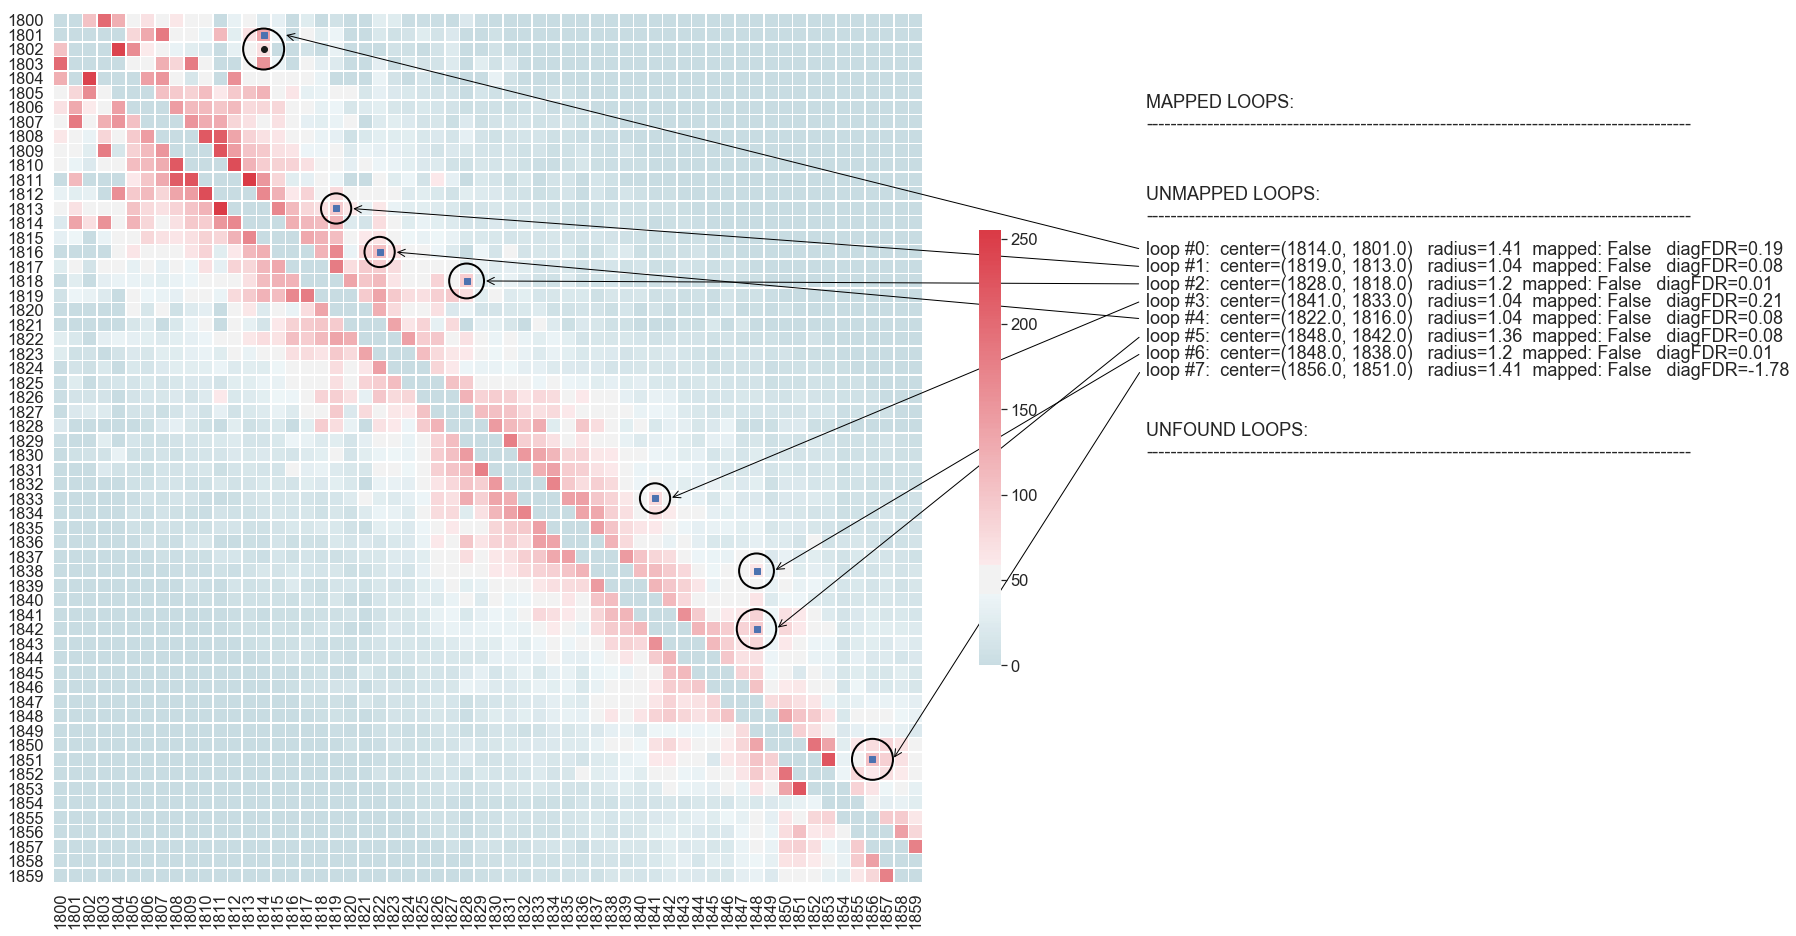

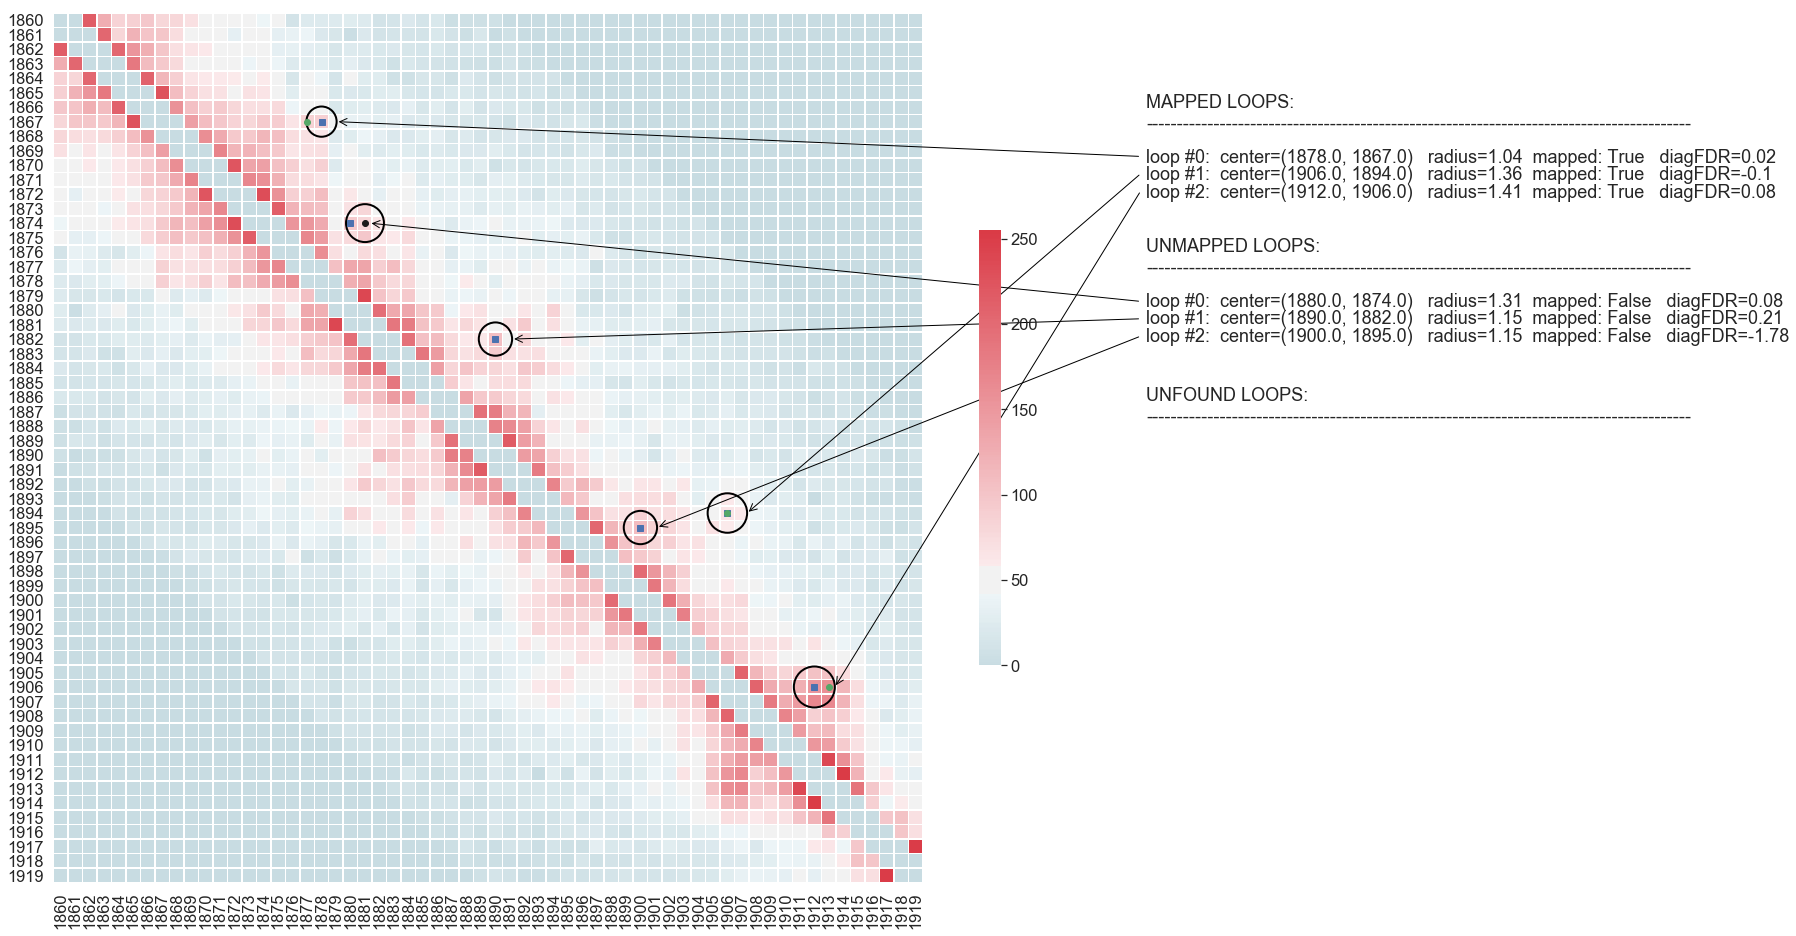

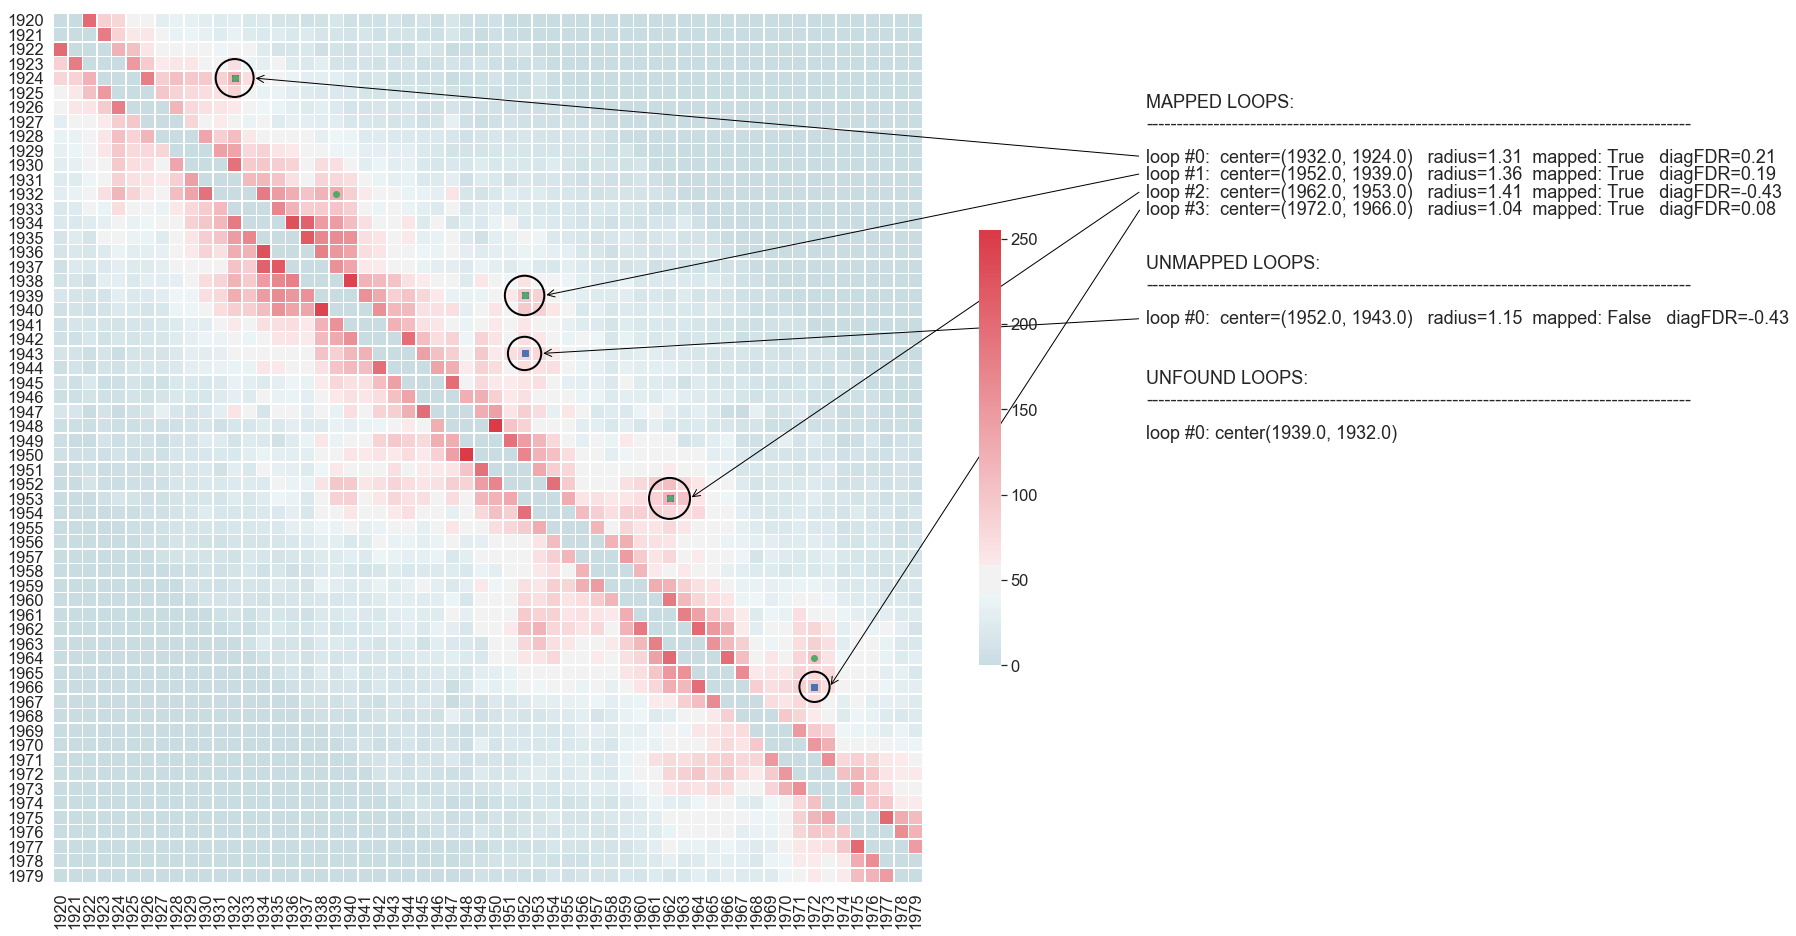

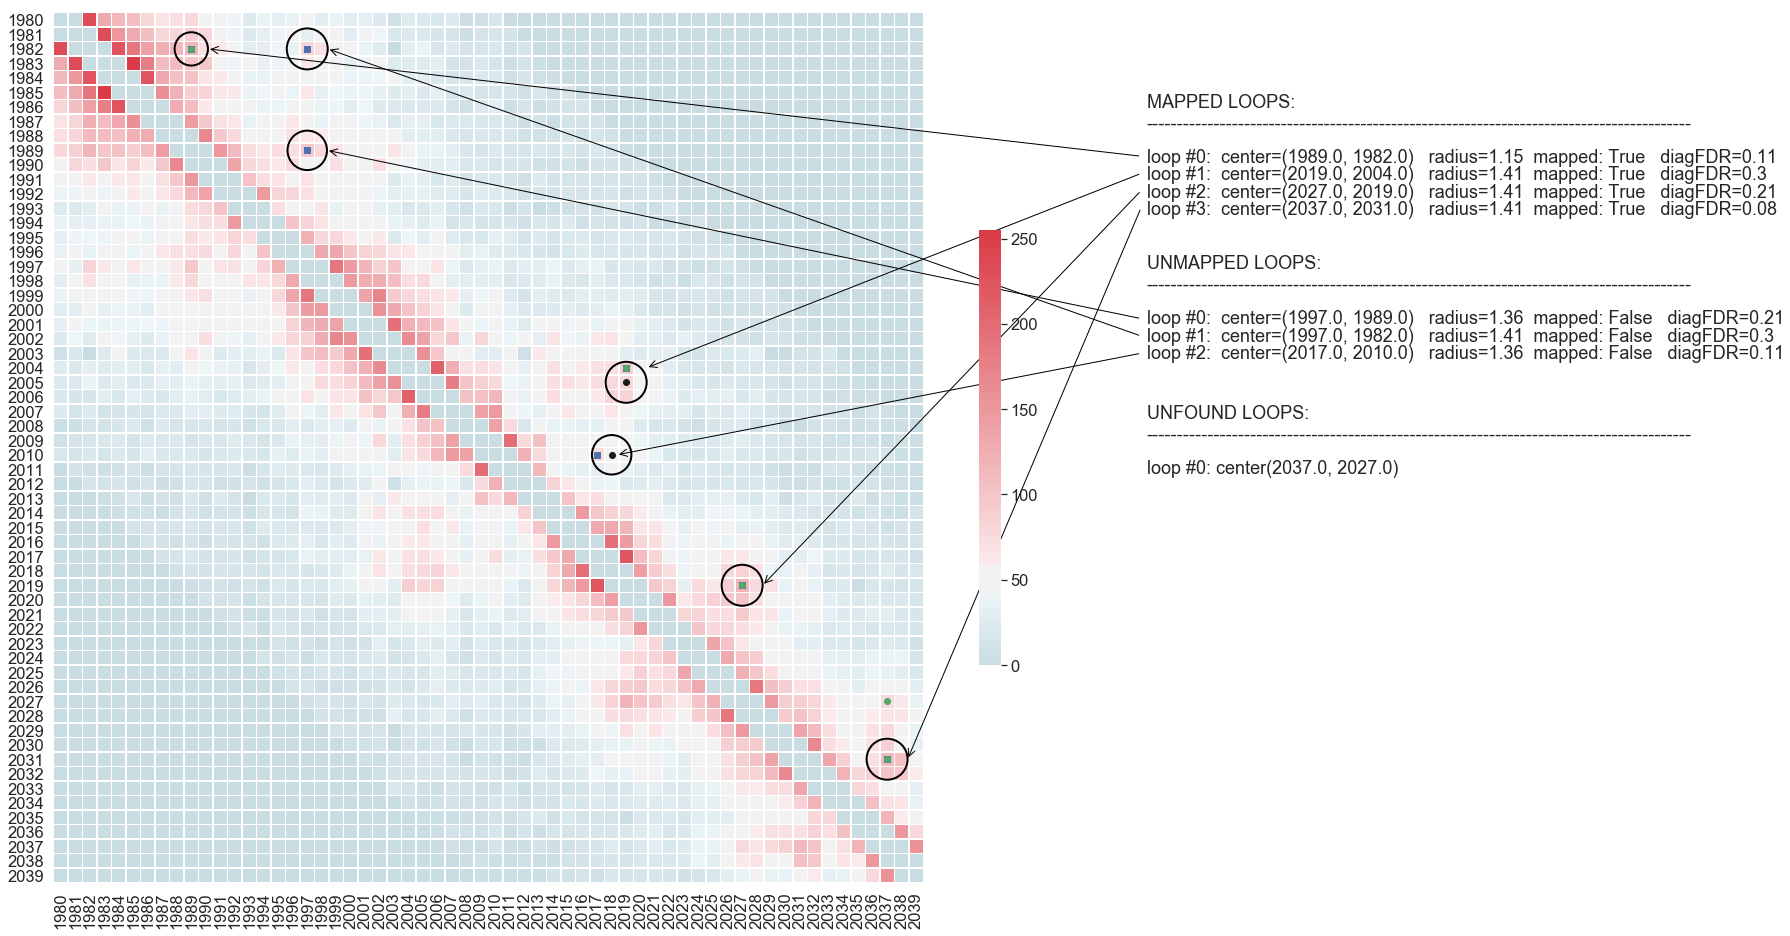

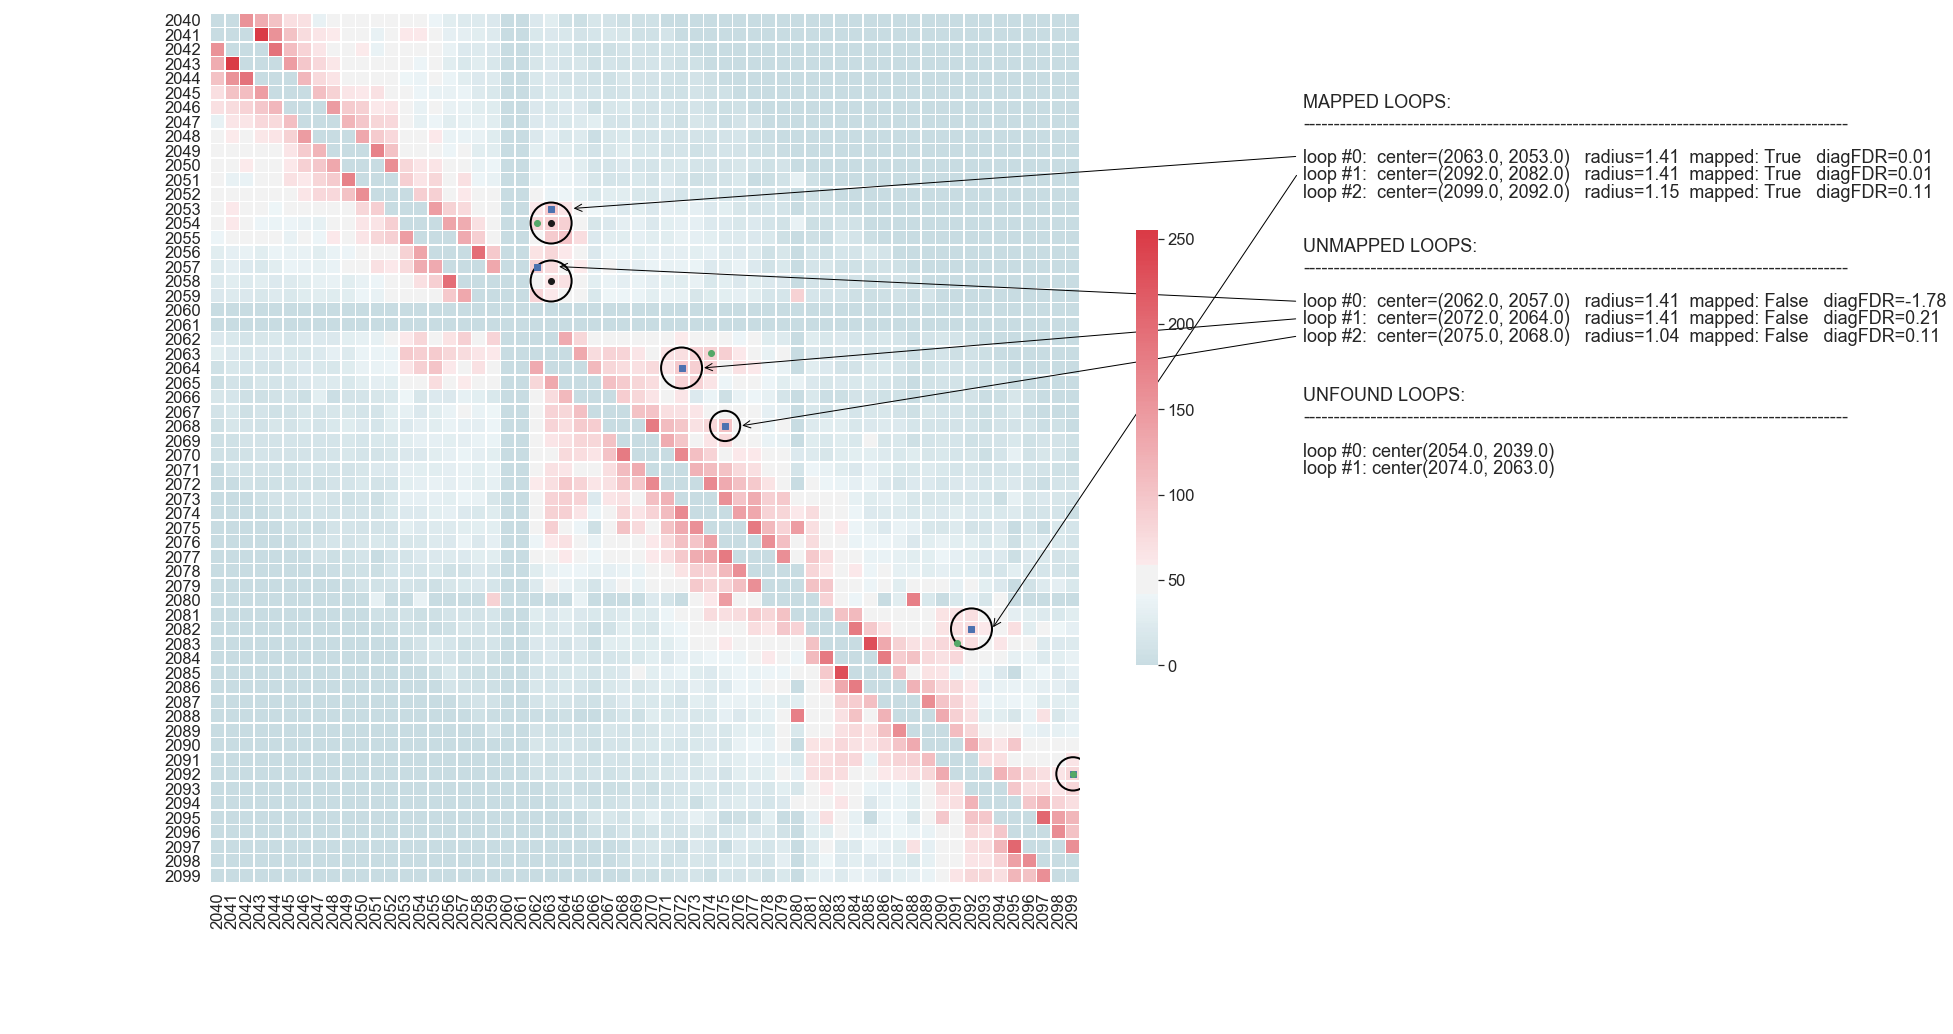

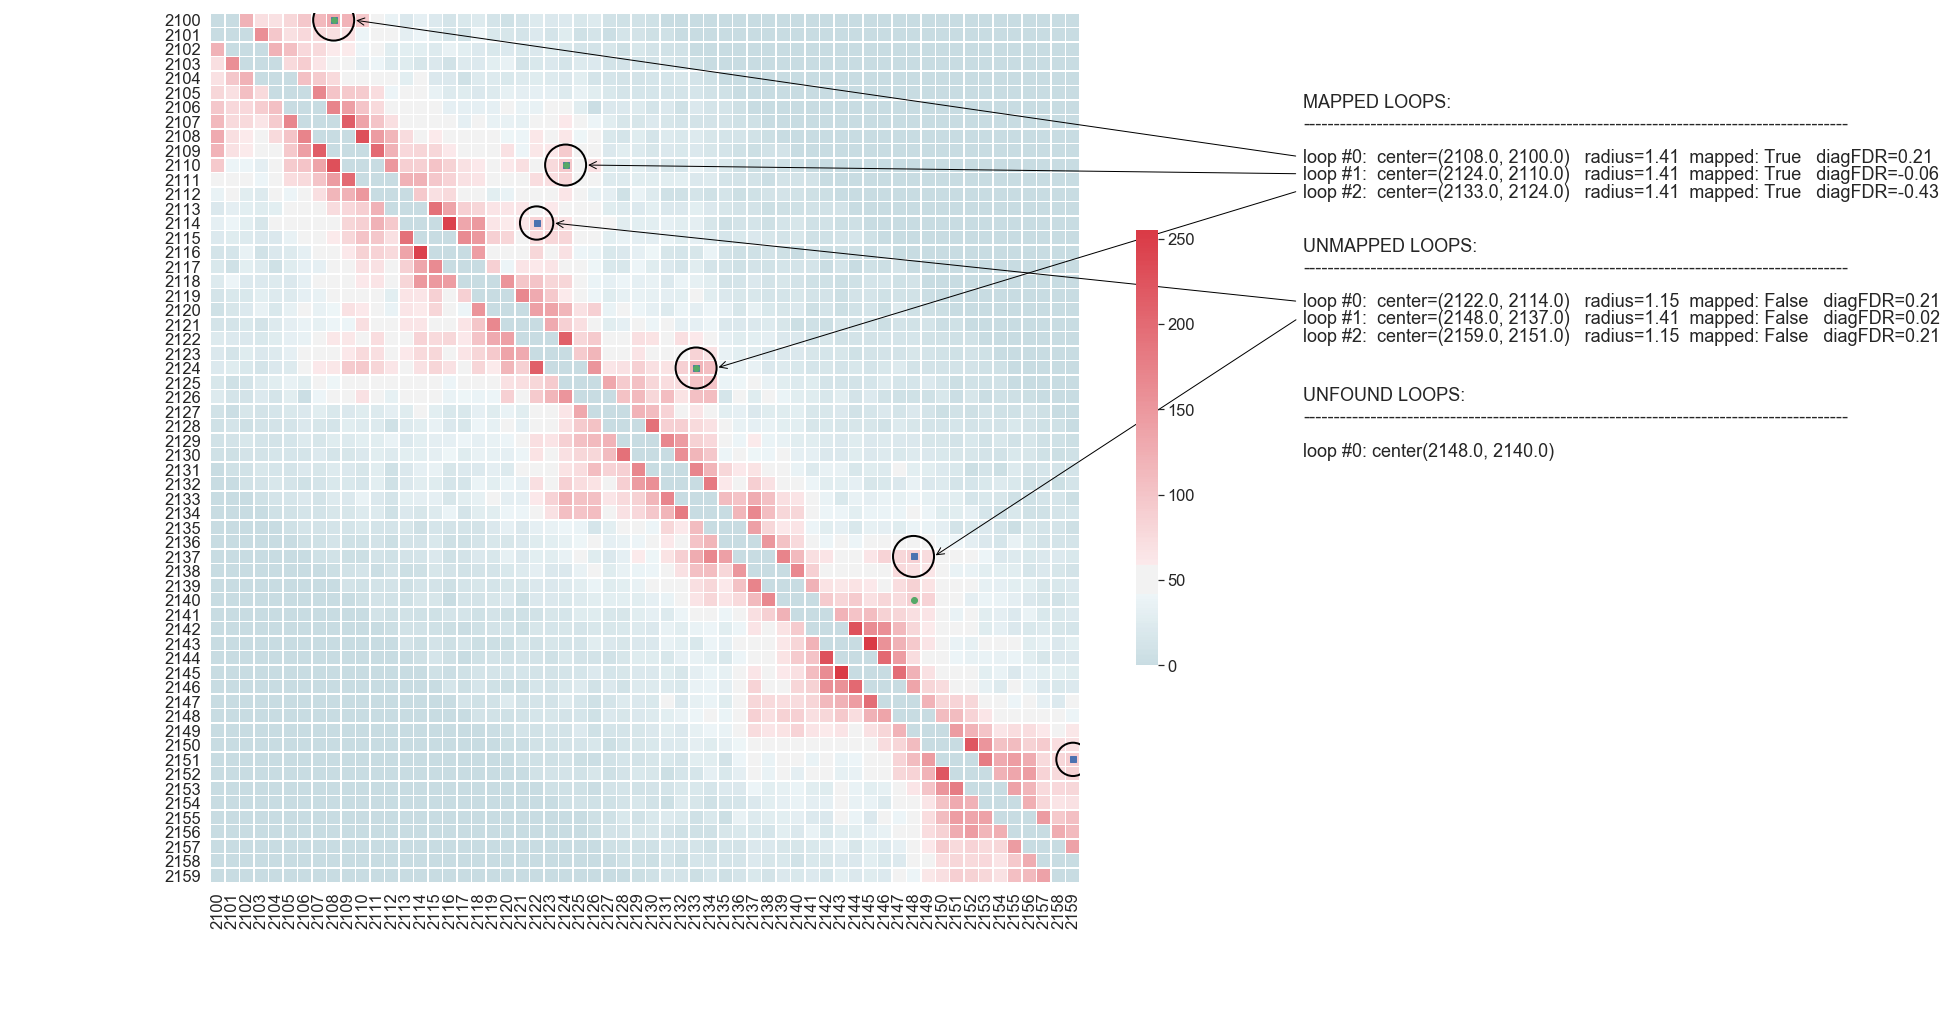

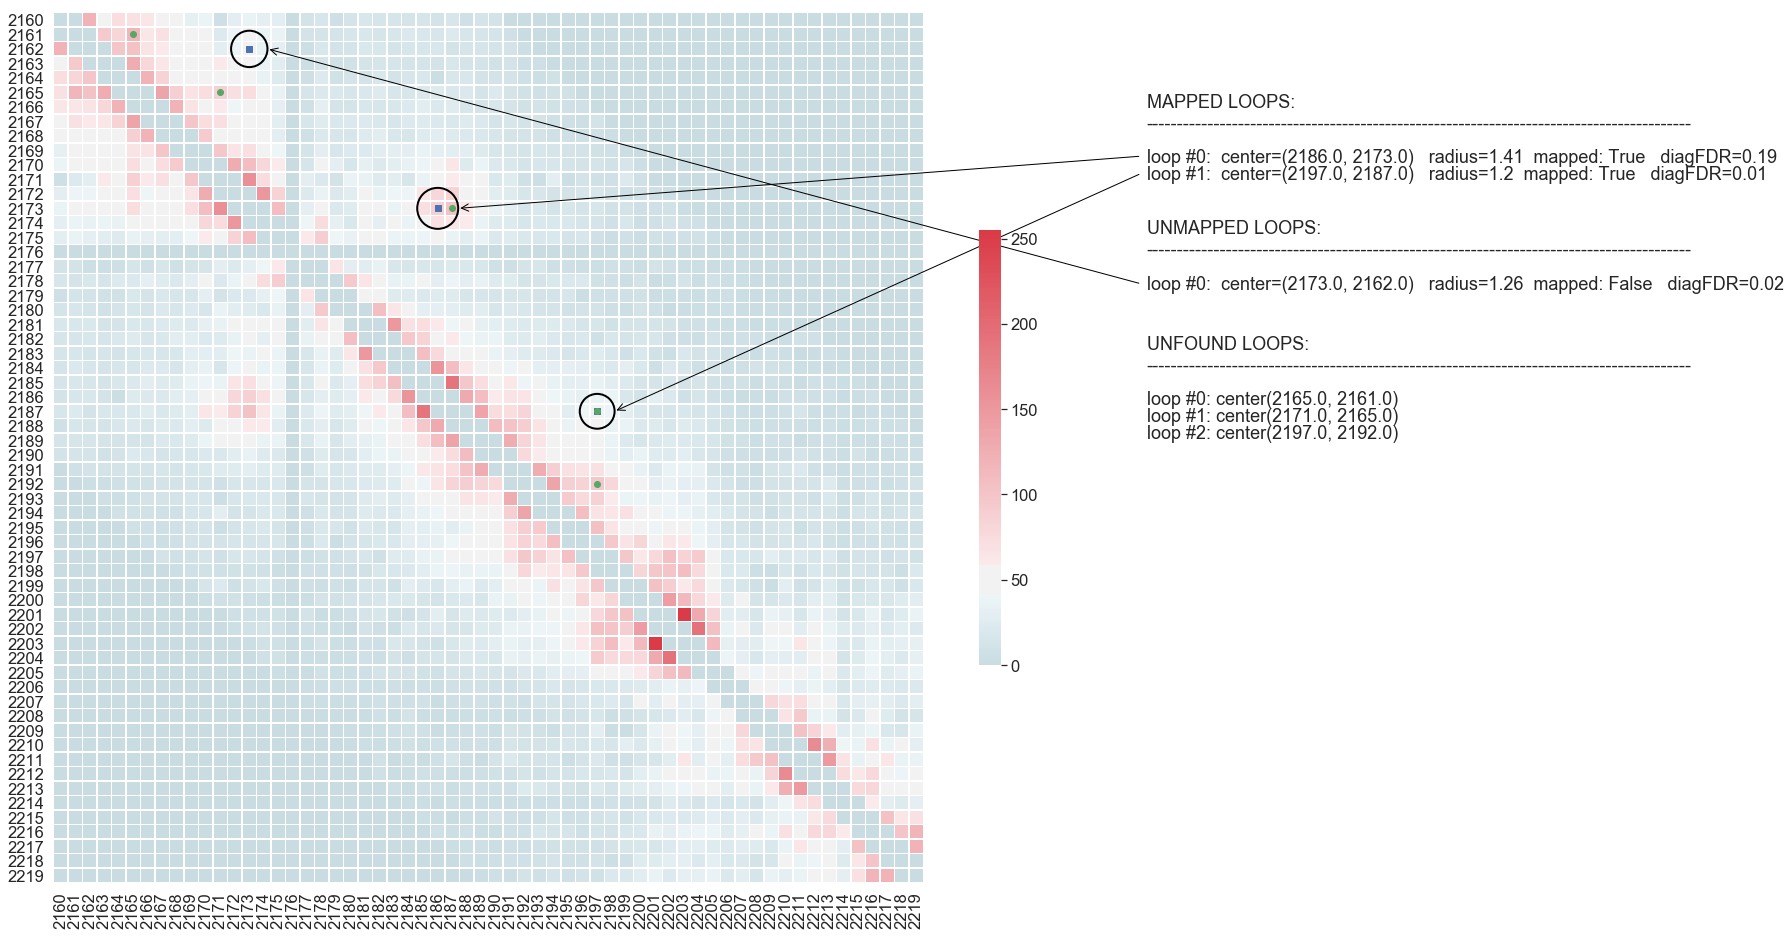

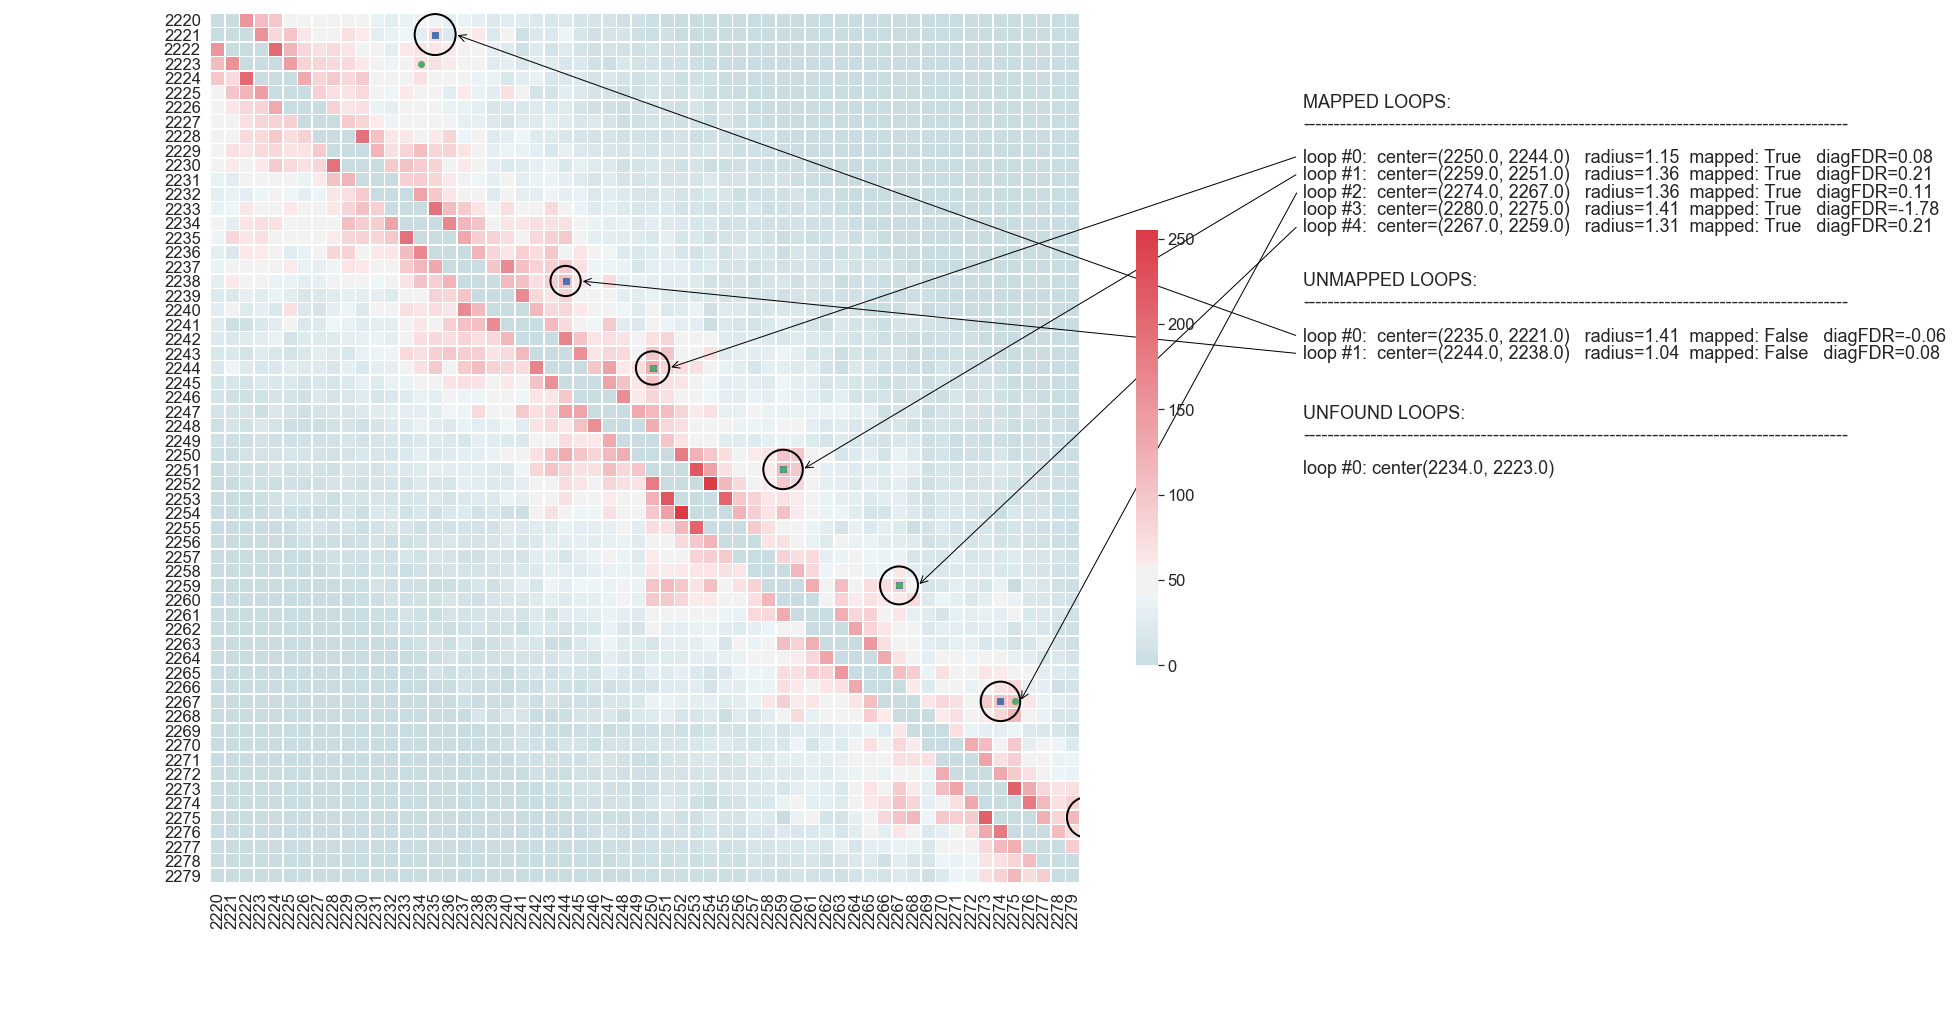

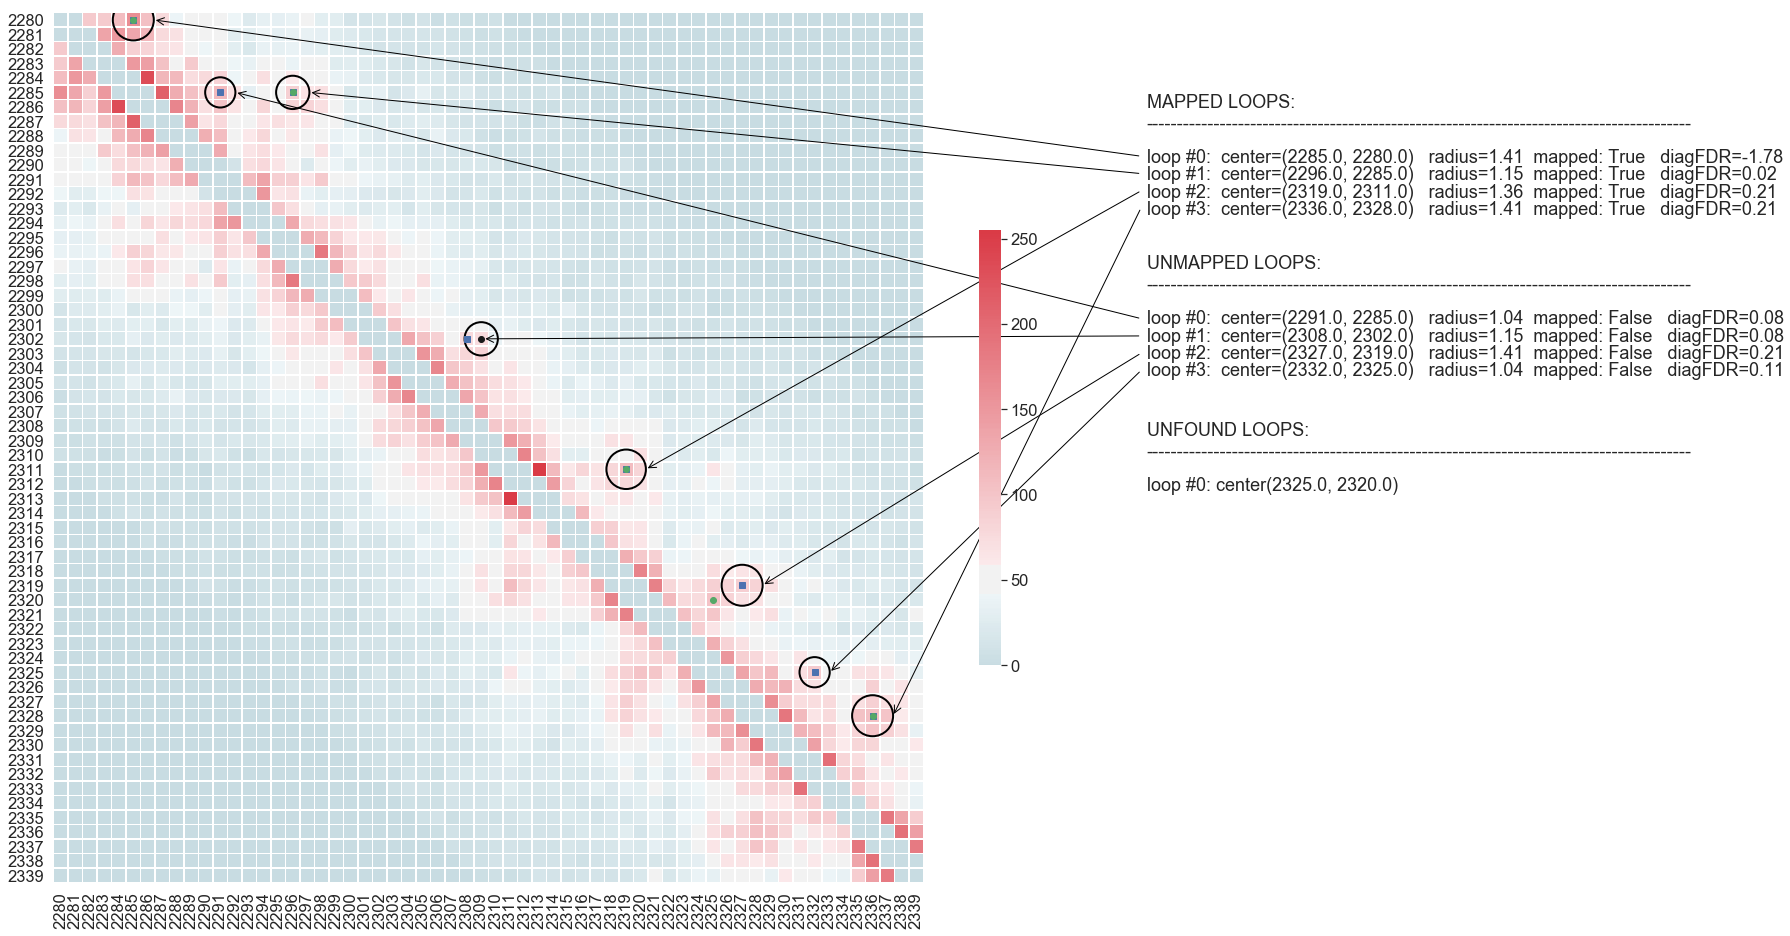

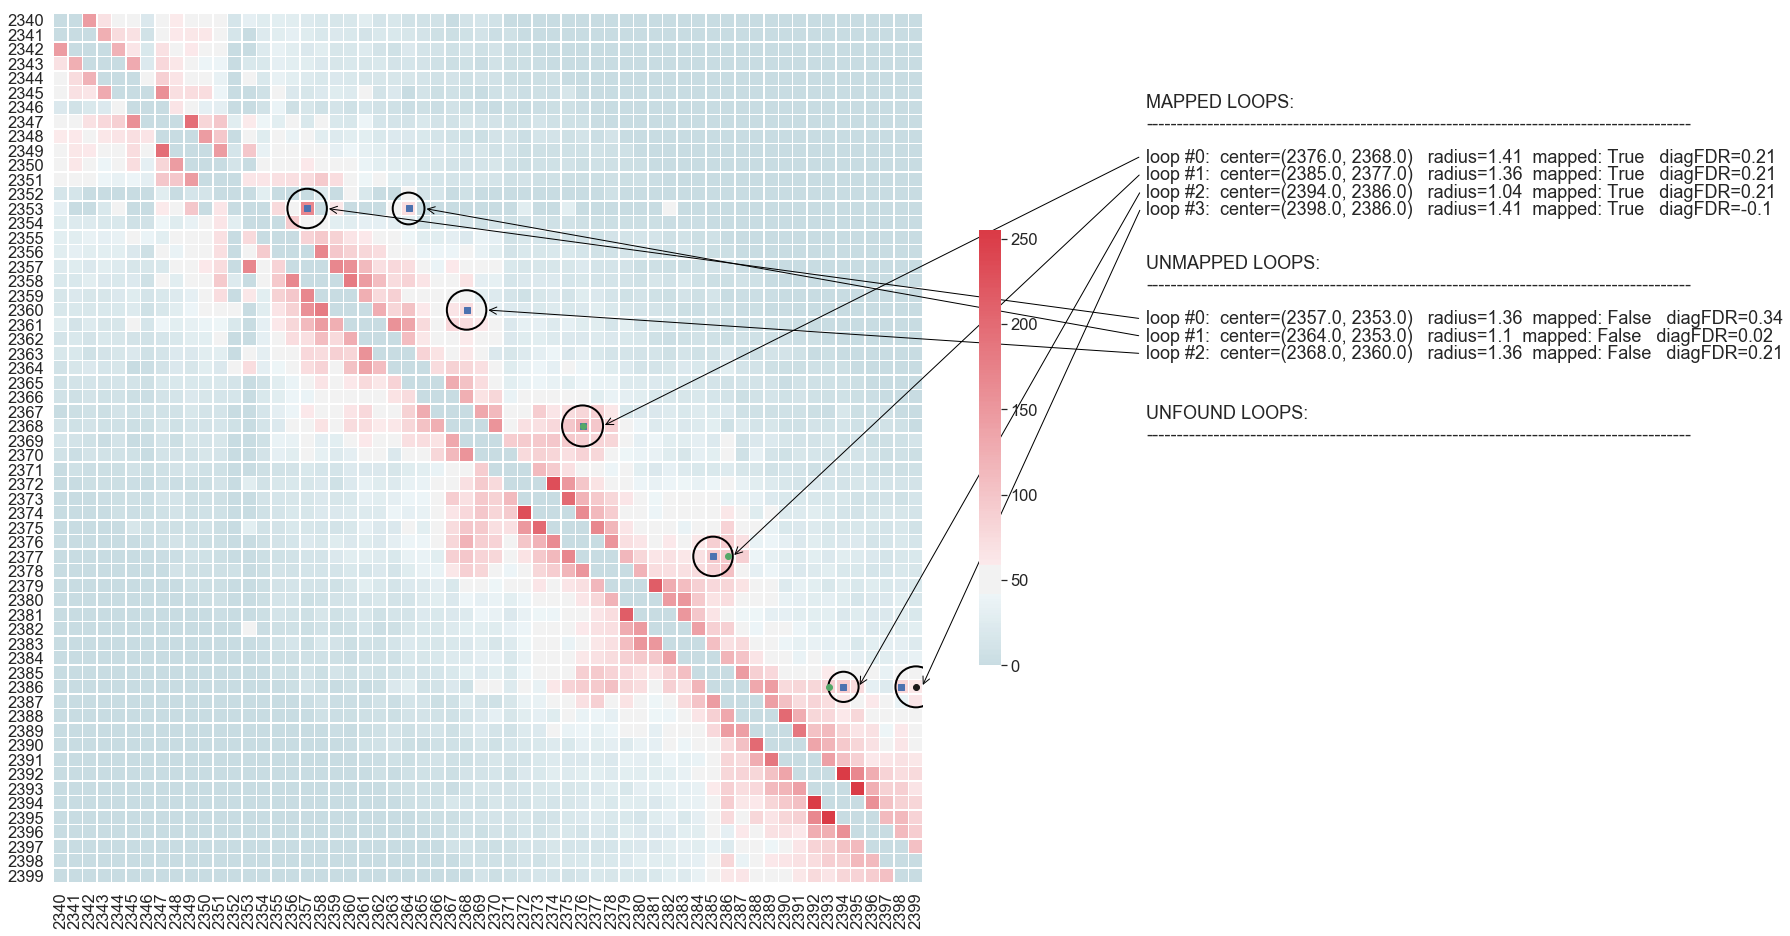

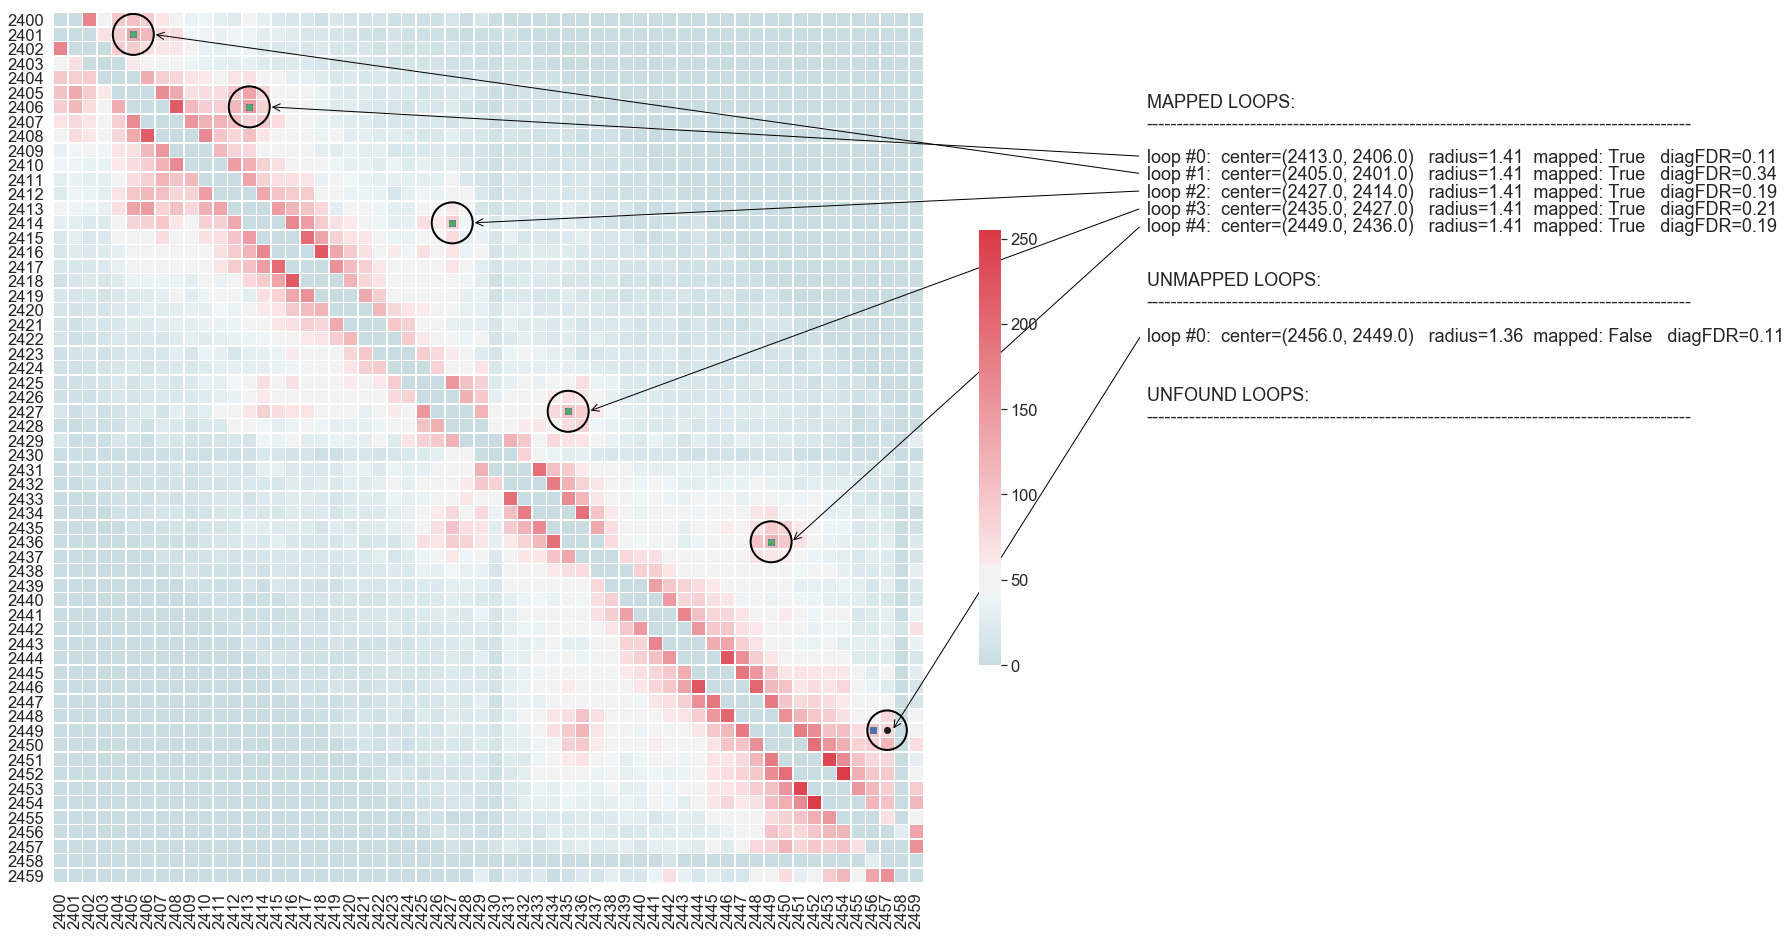

In [22]:
for i in range(0, 2461-60, 60):
    left=i
    right=i+60
    image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

    image=image/np.max(image)*255

    fig=plt.figure(figsize=(20,16))
    ax = fig.add_subplot(111)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.abs(i-j)>30:
                image[i, j]=0

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    #mask = np.zeros_like(image, dtype=np.bool)
    #mask[np.triu_indices_from(mask)] = True
    #mask=np.invert(mask)

    with sns.axes_style("white"):
        sns.heatmap(image, cmap=cmap, center=50,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=range(left, right), yticklabels=range(left, right))

    filtered_cut=mapped[mapped[:,0]>=left]
    filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
    filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
    filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

    plt.figtext(0.9, 0.75+0.03, 'MAPPED LOOPS:\n-----------------------------------------------------------------------------------------')
    for step in range(filtered_cut.shape[0]):
        x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
        c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
        ax.plot(x-left+0.5, y-left+0.5, 'ko')
        ax.add_patch(c)
        ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
        plt.figtext(0.9, 0.75-0.015*step, 'loop #'+str(step)+":  center=("+str(xc)+', '+str(yc)+')   radius='
                   +str(round(r,2))+'  mapped: True   diagFDR='+str(round(fdr_diag[int(xc-yc)], 2)))
        ax.annotate("", xy=(xc-left+r+0.5, yc-left+0.5), xytext=(75,9.9+1.2*step), arrowprops=dict(arrowstyle="->", color='black'))
        #ax.annotate("WHERE", xy=(10, 10), xytext=(0,0), arrowprops=dict(arrowstyle="->", color='black'))
        #print(xc, yc, thr1, thr2)

    step_old=filtered_cut.shape[0]

    filtered_cut=unmapped[unmapped[:,0]>=left]
    filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
    filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
    filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

    plt.figtext(0.9, 0.7-0.015*step_old, 'UNMAPPED LOOPS:\n-----------------------------------------------------------------------------------------')

    for step in range(filtered_cut.shape[0]):
        x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
        c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
        ax.plot(x-left+0.5, y-left+0.5, 'ko')
        ax.add_patch(c)
        ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
        plt.figtext(0.9, 0.67-0.015*step-0.015*step_old, 'loop #'+str(step)+":  center=("+str(xc)+', '+str(yc)+')   radius='
                   +str(round(r,2))+'  mapped: False   diagFDR='+str(round(fdr_diag[int(xc-yc)], 2)))
        ax.annotate("", xy=(xc-left+r+0.5, yc-left+0.5), xytext=(75,9.9+1.2*step_old+1.2*step+1.2*(0.8/0.15)), arrowprops=dict(arrowstyle="->", color='black'))
        #ax.annotate("WHERE", xy=(10, 10), xytext=(0,0), arrowprops=dict(arrowstyle="->", color='black'))
        #print(xc, yc, thr1, thr2)    


    plt.plot((known_chr1_seg['Genomic bin, Right base']-left-0.5), (known_chr1_seg['Genomic bin, Left base']-left-0.5), 'go')

    plt.figtext(0.9, 0.6-0.015*(step_old+step), 'UNFOUND LOOPS:\n-----------------------------------------------------------------------------------------')

    st=0
    for i in range(known_chr1_seg.shape[0]):
        if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][known_chr1_seg['Genomic bin, Right base'].index[i]]-1, 
                           known_chr1_seg['Genomic bin, Left base'][known_chr1_seg['Genomic bin, Left base'].index[i]]-1, filtered):
            continue
        else:
            plt.figtext(0.9, 0.57-0.015*(step_old+step+st), 'loop #' +str(st)+": center("+
                        str(known_chr1_seg['Genomic bin, Right base'][known_chr1_seg['Genomic bin, Right base'].index[i]]-1)+', '
                        +str(known_chr1_seg['Genomic bin, Left base'][known_chr1_seg['Genomic bin, Left base'].index[i]]-1)+')')
            st+=1

    plt.savefig('pics/chr1_'+str(left)+'_'+str(right)+'.tiff', bbox_inches='tight')
    

In [278]:
df_juice=pd.DataFrame({
    'chr1': 6*np.ones(df.shape[0]).astype(int),
    'x1': 2000*(filtered[:, 3]+1-filtered[:, 2]/2).astype(int),
    'x2': 2000*(filtered[:, 3]+1+filtered[:, 2]/2).astype(int),
    'chr2': 6*np.ones(df.shape[0]).astype(int),
    'y1': 2000*(filtered[:, 4]+1-filtered[:, 2]/2).astype(int),
    'y2': 2000*(filtered[:, 4]+1+filtered[:, 2]/2).astype(int),
    'color': np.array(['0,255,0']*df.shape[0]),
    'comment': np.nan
})

In [19]:
df_juice

chr1       x1       x2  chr2       y1       y2    color  comment
0       1    68000    70000     1    46000    48000  0,255,0      NaN
1       1    96000    98000     1    80000    82000  0,255,0      NaN
2       1   118000   120000     1   100000   102000  0,255,0      NaN
3       1   170000   172000     1   156000   158000  0,255,0      NaN
4       1   170000   172000     1   148000   150000  0,255,0      NaN
5       1   228000   230000     1   208000   210000  0,255,0      NaN
6       1   246000   248000     1   226000   228000  0,255,0      NaN
7       1   252000   254000     1   228000   230000  0,255,0      NaN
8       1   270000   272000     1   254000   256000  0,255,0      NaN
9       1   282000   284000     1   258000   260000  0,255,0      NaN
10      1   290000   292000     1   270000   272000  0,255,0      NaN
11      1   308000   310000     1   292000   294000  0,255,0      NaN
12      1   314000   316000     1   298000   300000  0,255,0      NaN
13      1   318000   320000     1   308000   310000  0,255,0      NaN
14      1   326000   328000     1   306000   308000  0,255,0      NaN
15      1   360000   362000     1   344000   346000  0,255,0      NaN
16      1   382000   384000     1   342000   344000  0,255,0      NaN
17      1   388000   390000     1   372000   374000  0,255,0      NaN
18      1   394000   396000     1   374000   376000  0,255,0      NaN
19      1   382000   384000     1   362000   364000  0,255,0      NaN
20      1   444000   446000     1   418000   420000  0,255,0      NaN
21      1   446000   448000     1   410000   412000  0,255,0      NaN
22      1   446000   448000     1   428000   430000  0,255,0      NaN
23      1   470000   472000     1   446000   448000  0,255,0      NaN
24      1   482000   484000     1   464000   466000  0,255,0      NaN
25      1   484000   486000     1   446000   448000  0,255,0      NaN
26      1   486000   488000     1   454000   456000  0,255,0      NaN
27      1   514000   516000     1   488000   490000  0,255,0      NaN
28      1   596000   598000     1   566000   568000  0,255,0      NaN
29      1   618000   620000     1   594000   596000  0,255,0      NaN
..    ...      ...      ...   ...      ...      ...      ...      ...
338     1  7904000  7906000     1  7880000  7882000  0,255,0      NaN
339     1  7946000  7948000     1  7932000  7934000  0,255,0      NaN
340     1  7962000  7964000     1  7954000  7956000  0,255,0      NaN
341     1  7964000  7966000     1  7936000  7938000  0,255,0      NaN
342     1  7976000  7978000     1  7952000  7954000  0,255,0      NaN
343     1  7992000  7994000     1  7976000  7978000  0,255,0      NaN
344     1  8022000  8024000     1  8010000  8012000  0,255,0      NaN
345     1  8034000  8036000     1  8010000  8012000  0,255,0      NaN
346     1  8052000  8054000     1  8034000  8036000  0,255,0      NaN
347     1  8066000  8068000     1  8052000  8054000  0,255,0      NaN
348     1  8104000  8106000     1  8092000  8094000  0,255,0      NaN
349     1  8138000  8140000     1  8126000  8128000  0,255,0      NaN
350     1  8184000  8186000     1  8162000  8164000  0,255,0      NaN
351     1  8220000  8222000     1  8202000  8204000  0,255,0      NaN
352     1  8220000  8222000     1  8196000  8198000  0,255,0      NaN
353     1  8222000  8224000     1  8184000  8186000  0,255,0      NaN
354     1  8260000  8262000     1  8232000  8234000  0,255,0      NaN
355     1  8286000  8288000     1  8274000  8276000  0,255,0      NaN
356     1  8308000  8310000     1  8292000  8294000  0,255,0      NaN
357     1  8308000  8310000     1  8286000  8288000  0,255,0      NaN
358     1  8342000  8344000     1  8328000  8330000  0,255,0      NaN
359     1  8350000  8352000     1  8328000  8330000  0,255,0      NaN
360     1  8354000  8356000     1  8338000  8340000  0,255,0      NaN
361     1  8364000  8366000     1  8348000  8350000  0,255,0      NaN
362     1  8372000  8374000     1  8328000  8330000  0,255,0      NaN
363     1  8372

In [279]:
df_juice.to_csv('chr6-track.brbq', index=None, sep='\t')